### Visualising the data

#### What files are in the input folder:

In [1]:
#install ipywidgets package and run special command before launching jupyter notebook to draw plots

#!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
# All imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc


In [3]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 4
['.~lock.train.csv#', 'sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [4]:
#Loading Train and Test Data

df_raw_train = pd.read_csv("./input/train.csv")
df_raw_test = pd.read_csv("./input/test.csv")

df_train = df_raw_train.copy()
df_test = df_raw_test.copy()

print("{} observations and {} features in train set.".format(df_train.shape[0], df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0], df_test.shape[1]))

200000 observations and 202 features in train set.
200000 observations and 201 features in test set.


### Feature Preparation
First of all let's check how many absent values do we have:

In [5]:
null_value_stats = df_train.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

Now let's separate features and label variable:

In [6]:
df_train_X = df_train.iloc[:,2:]
df_test_X = df_test.iloc[:,1:]
df_train_y= df_train['target']


In [7]:
print(df_train_X.dtypes)

categorical_features_indices = np.where(df_train_X.dtypes != np.float)[0]

var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
var_29     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

### Feature Engineering

In [8]:
import time

def feature_creation(df, idx, name_num = '_1'):
    #data metrics
    print('  * Loading new data metrics: ', name_num)
    df['sum'+name_num] = df[idx].sum(axis=1)  
    df['min'+name_num] = df[idx].min(axis=1)
    df['max'+name_num] = df[idx].max(axis=1)
    df['mean'+name_num] = df[idx].mean(axis=1)
    df['std'+name_num] = df[idx].std(axis=1)
    df['skew'+name_num] = df[idx].skew(axis=1)
    df['kurt'+name_num] = df[idx].kurtosis(axis=1)
    df['med'+name_num] = df[idx].median(axis=1)
    #moving average
    print('  * Loading moving average metric: ', name_num)
    df['ma'+name_num] =  df[idx].apply(lambda x: np.ma.average(x), axis=1)
    #percentiles
    print('  * Loading percentiles: ', name_num)
    #df['perc_1'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 1), axis=1)
    df['perc_5'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 5), axis=1)
    #df['perc_25'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 25), axis=1)
    df['perc_50'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 50), axis=1)
    #df['perc_75'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 75), axis=1)
    df['perc_95'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 95), axis=1)
    #df['perc_99'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 99), axis=1)
    

start_time = time.time()

print('Loading more features for train dataset')
print('Creating Metrics Part 1')
features_1 = df_train_X.columns
feature_creation(df_train_X, features_1, name_num='_1') #adding columns using the train features (#200)
print('Creating Metrics Part 2')
features_2 = df_train_X.columns #all features included the ones added
feature_creation(df_train_X, features_2, name_num='_2') #adding columns using the train features + the new features

print('-'*50)

print('Loading more features for test dataset')
print('Creating Metrics Part 1')
features_1 = df_test_X.columns
feature_creation(df_test_X, features_1, name_num='_1') #adding columns using the train features (#200)
print('Creating Metrics Part 2')
features_2 = df_test_X.columns #all features included the ones added
feature_creation(df_test_X, features_2, name_num='_2') #adding columns using the train features + the new features


print('Features loaded !')
print("Execution --- %s seconds ---" % (time.time() - start_time))
print('Train df: ', df_train_X.columns)
print('Test df: ', df_test_X.columns)
print('Number of Features: ', len(df_train_X.columns))
print('Number of Features: ', len(df_test_X.columns))


Loading more features for train dataset
Creating Metrics Part 1
  * Loading new data metrics:  _1
  * Loading moving average metric:  _1
  * Loading percentiles:  _1
Creating Metrics Part 2
  * Loading new data metrics:  _2
  * Loading moving average metric:  _2
  * Loading percentiles:  _2
--------------------------------------------------
Loading more features for test dataset
Creating Metrics Part 1
  * Loading new data metrics:  _1
  * Loading moving average metric:  _1
  * Loading percentiles:  _1
Creating Metrics Part 2
  * Loading new data metrics:  _2
  * Loading moving average metric:  _2
  * Loading percentiles:  _2
Features loaded !
Execution --- 890.0292255878448 seconds ---
Train df:  Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'max_2', 'mean_2', 'std_2', 'skew_2', 'kurt_2', 'med_2', 'ma_2',
       'perc_5_2', 'perc_50_2', 'perc_95_2'],
      dtype='object', length=224)
Test df:  Index(['var_0', 

In [9]:
df_train_X.drop(['min_2','max_2'],axis=1,inplace=True)
df_test_X.drop(['min_2','max_2'],axis=1,inplace=True)

print(df_train_X.shape)
print(df_test_X.shape)

(200000, 222)
(200000, 222)


In [10]:
categorical_features_indices = np.where(df_train_X.dtypes != np.float)[0]
print(len(categorical_features_indices))

0


### Data Splitting

Let's split the train data into training and validation sets.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_train_X, df_train_y, random_state = 13, test_size = 0.25)

X_test = df_test_X

### CatBoost Basics

In [36]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [37]:
model = CatBoostClassifier(custom_loss=['Accuracy'], 
                           random_seed=42, 
                           task_type = "GPU", 
                           devices='0')

In [38]:
model.fit(X_train, y_train, 
          cat_features=categorical_features_indices, 
          eval_set=(X_valid, y_valid),
          logging_level='Verbose',
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.132051
0:	learn: 0.5807082	test: 0.5810565	best: 0.5810565 (0)	total: 74.5ms	remaining: 1m 14s
1:	learn: 0.5006661	test: 0.5017497	best: 0.5017497 (1)	total: 94.7ms	remaining: 47.2s
2:	learn: 0.4448192	test: 0.4462962	best: 0.4462962 (2)	total: 119ms	remaining: 39.5s
3:	learn: 0.4044203	test: 0.4062155	best: 0.4062155 (3)	total: 140ms	remaining: 34.9s
4:	learn: 0.3761800	test: 0.3784337	best: 0.3784337 (4)	total: 160ms	remaining: 31.8s
5:	learn: 0.3552751	test: 0.3578102	best: 0.3578102 (5)	total: 180ms	remaining: 29.7s
6:	learn: 0.3402131	test: 0.3429180	best: 0.3429180 (6)	total: 199ms	remaining: 28.2s
7:	learn: 0.3286882	test: 0.3316027	best: 0.3316027 (7)	total: 218ms	remaining: 27.1s
8:	learn: 0.3202993	test: 0.3234605	best: 0.3234605 (8)	total: 238ms	remaining: 26.2s
9:	learn: 0.3137111	test: 0.3170705	best: 0.3170705 (9)	total: 257ms	remaining: 25.5s
10:	learn: 0.3083460	test: 0.3118114	best: 0.3118114 (10)	total: 281ms	remaining: 25.3s
11:	learn: 0.304227

96:	learn: 0.2347983	test: 0.2452272	best: 0.2452272 (96)	total: 2.16s	remaining: 20.1s
97:	learn: 0.2344002	test: 0.2448871	best: 0.2448871 (97)	total: 2.18s	remaining: 20.1s
98:	learn: 0.2340304	test: 0.2446276	best: 0.2446276 (98)	total: 2.21s	remaining: 20.1s
99:	learn: 0.2336708	test: 0.2443796	best: 0.2443796 (99)	total: 2.23s	remaining: 20.1s
100:	learn: 0.2332752	test: 0.2440386	best: 0.2440386 (100)	total: 2.25s	remaining: 20s
101:	learn: 0.2329146	test: 0.2437080	best: 0.2437080 (101)	total: 2.27s	remaining: 20s
102:	learn: 0.2325458	test: 0.2434271	best: 0.2434271 (102)	total: 2.29s	remaining: 19.9s
103:	learn: 0.2321491	test: 0.2431177	best: 0.2431177 (103)	total: 2.31s	remaining: 19.9s
104:	learn: 0.2317920	test: 0.2427932	best: 0.2427932 (104)	total: 2.33s	remaining: 19.9s
105:	learn: 0.2314780	test: 0.2425764	best: 0.2425764 (105)	total: 2.35s	remaining: 19.9s
106:	learn: 0.2311027	test: 0.2422989	best: 0.2422989 (106)	total: 2.38s	remaining: 19.9s
107:	learn: 0.2307474	

195:	learn: 0.2075308	test: 0.2259534	best: 0.2259534 (195)	total: 4.27s	remaining: 17.5s
196:	learn: 0.2073064	test: 0.2257946	best: 0.2257946 (196)	total: 4.29s	remaining: 17.5s
197:	learn: 0.2070948	test: 0.2256704	best: 0.2256704 (197)	total: 4.31s	remaining: 17.5s
198:	learn: 0.2069070	test: 0.2255745	best: 0.2255745 (198)	total: 4.33s	remaining: 17.4s
199:	learn: 0.2067223	test: 0.2254414	best: 0.2254414 (199)	total: 4.35s	remaining: 17.4s
200:	learn: 0.2065221	test: 0.2252980	best: 0.2252980 (200)	total: 4.37s	remaining: 17.4s
201:	learn: 0.2063173	test: 0.2251210	best: 0.2251210 (201)	total: 4.39s	remaining: 17.4s
202:	learn: 0.2061069	test: 0.2250202	best: 0.2250202 (202)	total: 4.42s	remaining: 17.3s
203:	learn: 0.2059043	test: 0.2249247	best: 0.2249247 (203)	total: 4.44s	remaining: 17.3s
204:	learn: 0.2056961	test: 0.2248138	best: 0.2248138 (204)	total: 4.46s	remaining: 17.3s
205:	learn: 0.2055076	test: 0.2247059	best: 0.2247059 (205)	total: 4.48s	remaining: 17.3s
206:	learn

292:	learn: 0.1914754	test: 0.2174699	best: 0.2174699 (292)	total: 6.35s	remaining: 15.3s
293:	learn: 0.1913326	test: 0.2174135	best: 0.2174135 (293)	total: 6.37s	remaining: 15.3s
294:	learn: 0.1912101	test: 0.2173341	best: 0.2173341 (294)	total: 6.39s	remaining: 15.3s
295:	learn: 0.1910892	test: 0.2172750	best: 0.2172750 (295)	total: 6.41s	remaining: 15.3s
296:	learn: 0.1909555	test: 0.2171952	best: 0.2171952 (296)	total: 6.43s	remaining: 15.2s
297:	learn: 0.1908323	test: 0.2171185	best: 0.2171185 (297)	total: 6.46s	remaining: 15.2s
298:	learn: 0.1907061	test: 0.2170529	best: 0.2170529 (298)	total: 6.48s	remaining: 15.2s
299:	learn: 0.1905901	test: 0.2170257	best: 0.2170257 (299)	total: 6.5s	remaining: 15.2s
300:	learn: 0.1904708	test: 0.2169638	best: 0.2169638 (300)	total: 6.52s	remaining: 15.1s
301:	learn: 0.1903213	test: 0.2168886	best: 0.2168886 (301)	total: 6.54s	remaining: 15.1s
302:	learn: 0.1902047	test: 0.2168345	best: 0.2168345 (302)	total: 6.56s	remaining: 15.1s
303:	learn:

390:	learn: 0.1796017	test: 0.2129831	best: 0.2129831 (390)	total: 8.39s	remaining: 13.1s
391:	learn: 0.1795254	test: 0.2129549	best: 0.2129549 (391)	total: 8.41s	remaining: 13.1s
392:	learn: 0.1794157	test: 0.2129044	best: 0.2129044 (392)	total: 8.44s	remaining: 13s
393:	learn: 0.1793209	test: 0.2128617	best: 0.2128617 (393)	total: 8.46s	remaining: 13s
394:	learn: 0.1792269	test: 0.2128413	best: 0.2128413 (394)	total: 8.47s	remaining: 13s
395:	learn: 0.1791372	test: 0.2128261	best: 0.2128261 (395)	total: 8.49s	remaining: 13s
396:	learn: 0.1790306	test: 0.2127940	best: 0.2127940 (396)	total: 8.52s	remaining: 12.9s
397:	learn: 0.1789072	test: 0.2127601	best: 0.2127601 (397)	total: 8.54s	remaining: 12.9s
398:	learn: 0.1788070	test: 0.2127375	best: 0.2127375 (398)	total: 8.56s	remaining: 12.9s
399:	learn: 0.1786844	test: 0.2127178	best: 0.2127178 (399)	total: 8.58s	remaining: 12.9s
400:	learn: 0.1785781	test: 0.2126789	best: 0.2126789 (400)	total: 8.6s	remaining: 12.8s
401:	learn: 0.17846

486:	learn: 0.1701782	test: 0.2105963	best: 0.2105963 (486)	total: 10.4s	remaining: 11s
487:	learn: 0.1700888	test: 0.2105492	best: 0.2105492 (487)	total: 10.4s	remaining: 10.9s
488:	learn: 0.1699913	test: 0.2105362	best: 0.2105362 (488)	total: 10.5s	remaining: 10.9s
489:	learn: 0.1698839	test: 0.2105270	best: 0.2105270 (489)	total: 10.5s	remaining: 10.9s
490:	learn: 0.1698040	test: 0.2105164	best: 0.2105164 (490)	total: 10.5s	remaining: 10.9s
491:	learn: 0.1696914	test: 0.2104570	best: 0.2104570 (491)	total: 10.5s	remaining: 10.9s
492:	learn: 0.1695918	test: 0.2104170	best: 0.2104170 (492)	total: 10.5s	remaining: 10.8s
493:	learn: 0.1694991	test: 0.2104061	best: 0.2104061 (493)	total: 10.6s	remaining: 10.8s
494:	learn: 0.1694130	test: 0.2103795	best: 0.2103795 (494)	total: 10.6s	remaining: 10.8s
495:	learn: 0.1693283	test: 0.2103338	best: 0.2103338 (495)	total: 10.6s	remaining: 10.8s
496:	learn: 0.1692329	test: 0.2103170	best: 0.2103170 (496)	total: 10.6s	remaining: 10.8s
497:	learn: 

587:	learn: 0.1616300	test: 0.2088816	best: 0.2088816 (587)	total: 12.5s	remaining: 8.78s
588:	learn: 0.1615500	test: 0.2088654	best: 0.2088654 (588)	total: 12.5s	remaining: 8.75s
589:	learn: 0.1614614	test: 0.2088768	best: 0.2088654 (588)	total: 12.6s	remaining: 8.73s
590:	learn: 0.1613937	test: 0.2088594	best: 0.2088594 (590)	total: 12.6s	remaining: 8.71s
591:	learn: 0.1613118	test: 0.2088656	best: 0.2088594 (590)	total: 12.6s	remaining: 8.69s
592:	learn: 0.1612296	test: 0.2088474	best: 0.2088474 (592)	total: 12.6s	remaining: 8.67s
593:	learn: 0.1611516	test: 0.2088342	best: 0.2088342 (593)	total: 12.6s	remaining: 8.64s
594:	learn: 0.1610830	test: 0.2088130	best: 0.2088130 (594)	total: 12.7s	remaining: 8.62s
595:	learn: 0.1610184	test: 0.2087960	best: 0.2087960 (595)	total: 12.7s	remaining: 8.6s
596:	learn: 0.1609134	test: 0.2088190	best: 0.2087960 (595)	total: 12.7s	remaining: 8.58s
597:	learn: 0.1608284	test: 0.2088396	best: 0.2087960 (595)	total: 12.7s	remaining: 8.56s
598:	learn:

682:	learn: 0.1544101	test: 0.2083239	best: 0.2083239 (682)	total: 14.5s	remaining: 6.74s
683:	learn: 0.1543493	test: 0.2083038	best: 0.2083038 (683)	total: 14.5s	remaining: 6.72s
684:	learn: 0.1542787	test: 0.2083009	best: 0.2083009 (684)	total: 14.6s	remaining: 6.7s
685:	learn: 0.1542109	test: 0.2082696	best: 0.2082696 (685)	total: 14.6s	remaining: 6.68s
686:	learn: 0.1541234	test: 0.2082733	best: 0.2082696 (685)	total: 14.6s	remaining: 6.65s
687:	learn: 0.1540630	test: 0.2082510	best: 0.2082510 (687)	total: 14.6s	remaining: 6.63s
688:	learn: 0.1539962	test: 0.2082459	best: 0.2082459 (688)	total: 14.6s	remaining: 6.61s
689:	learn: 0.1538902	test: 0.2082355	best: 0.2082355 (689)	total: 14.7s	remaining: 6.59s
690:	learn: 0.1538092	test: 0.2082029	best: 0.2082029 (690)	total: 14.7s	remaining: 6.57s
691:	learn: 0.1537274	test: 0.2081738	best: 0.2081738 (691)	total: 14.7s	remaining: 6.55s
692:	learn: 0.1536515	test: 0.2081483	best: 0.2081483 (692)	total: 14.7s	remaining: 6.53s
693:	learn:

777:	learn: 0.1479119	test: 0.2079160	best: 0.2078760 (767)	total: 16.5s	remaining: 4.71s
778:	learn: 0.1478603	test: 0.2079012	best: 0.2078760 (767)	total: 16.5s	remaining: 4.69s
779:	learn: 0.1477967	test: 0.2078612	best: 0.2078612 (779)	total: 16.5s	remaining: 4.67s
780:	learn: 0.1477136	test: 0.2078870	best: 0.2078612 (779)	total: 16.6s	remaining: 4.64s
781:	learn: 0.1476776	test: 0.2078661	best: 0.2078612 (779)	total: 16.6s	remaining: 4.62s
782:	learn: 0.1476257	test: 0.2078846	best: 0.2078612 (779)	total: 16.6s	remaining: 4.6s
783:	learn: 0.1475659	test: 0.2078841	best: 0.2078612 (779)	total: 16.6s	remaining: 4.58s
784:	learn: 0.1475145	test: 0.2078921	best: 0.2078612 (779)	total: 16.6s	remaining: 4.56s
785:	learn: 0.1474406	test: 0.2078861	best: 0.2078612 (779)	total: 16.7s	remaining: 4.54s
786:	learn: 0.1473755	test: 0.2078636	best: 0.2078612 (779)	total: 16.7s	remaining: 4.51s
787:	learn: 0.1473117	test: 0.2078676	best: 0.2078612 (779)	total: 16.7s	remaining: 4.49s
788:	learn:

873:	learn: 0.1418114	test: 0.2076980	best: 0.2076980 (873)	total: 18.5s	remaining: 2.67s
874:	learn: 0.1417203	test: 0.2077119	best: 0.2076980 (873)	total: 18.6s	remaining: 2.65s
875:	learn: 0.1416528	test: 0.2077297	best: 0.2076980 (873)	total: 18.6s	remaining: 2.63s
876:	learn: 0.1415900	test: 0.2077249	best: 0.2076980 (873)	total: 18.6s	remaining: 2.61s
877:	learn: 0.1415158	test: 0.2077447	best: 0.2076980 (873)	total: 18.6s	remaining: 2.59s
878:	learn: 0.1414493	test: 0.2077537	best: 0.2076980 (873)	total: 18.6s	remaining: 2.56s
879:	learn: 0.1413847	test: 0.2077601	best: 0.2076980 (873)	total: 18.7s	remaining: 2.54s
880:	learn: 0.1413415	test: 0.2077491	best: 0.2076980 (873)	total: 18.7s	remaining: 2.52s
881:	learn: 0.1412740	test: 0.2077512	best: 0.2076980 (873)	total: 18.7s	remaining: 2.5s
882:	learn: 0.1412072	test: 0.2077537	best: 0.2076980 (873)	total: 18.7s	remaining: 2.48s
883:	learn: 0.1411466	test: 0.2077603	best: 0.2076980 (873)	total: 18.7s	remaining: 2.46s
884:	learn:

971:	learn: 0.1358680	test: 0.2078677	best: 0.2076980 (873)	total: 20.6s	remaining: 593ms
972:	learn: 0.1357841	test: 0.2078610	best: 0.2076980 (873)	total: 20.6s	remaining: 572ms
973:	learn: 0.1357333	test: 0.2078629	best: 0.2076980 (873)	total: 20.6s	remaining: 550ms
974:	learn: 0.1356726	test: 0.2078699	best: 0.2076980 (873)	total: 20.6s	remaining: 529ms
975:	learn: 0.1356151	test: 0.2078824	best: 0.2076980 (873)	total: 20.7s	remaining: 508ms
976:	learn: 0.1355663	test: 0.2079020	best: 0.2076980 (873)	total: 20.7s	remaining: 487ms
977:	learn: 0.1354970	test: 0.2079088	best: 0.2076980 (873)	total: 20.7s	remaining: 466ms
978:	learn: 0.1354382	test: 0.2079221	best: 0.2076980 (873)	total: 20.7s	remaining: 445ms
979:	learn: 0.1353805	test: 0.2079313	best: 0.2076980 (873)	total: 20.7s	remaining: 423ms
980:	learn: 0.1353257	test: 0.2079230	best: 0.2076980 (873)	total: 20.8s	remaining: 402ms
981:	learn: 0.1352664	test: 0.2079339	best: 0.2076980 (873)	total: 20.8s	remaining: 381ms
982:	learn

In [39]:
y_pred = model.predict_proba(X_valid) # for classifier
print(y_pred[:5])

[[0.99533351 0.00466649]
 [0.76668741 0.23331259]
 [0.98892574 0.01107426]
 [0.90600411 0.09399589]
 [0.7122908  0.2877092 ]]


In [40]:
from sklearn.metrics import roc_auc_score

roc_test = roc_auc_score(y_valid, y_pred[:, 1:])
print(roc_test)
# 0.8260463378176381  --> train size (10000, 222),iter=2000
# 0.8451537748219334  --> train size (25000, 222),iter=2000
# 0.8730362116927627  --> train size (50000, 222), iter=2000
# 0.880024101333465  --> train size (75000, 222), iter=2000
# 0.8857279408692152  --> train size (100000, 222), iter=2000
# 0.8967894791438368  --> train size (200000, 222),iter=2000

0.8956166047389137


### CatBoost Features
Let's define some params and create Pool for more convenience. It stores all information about dataset (features, labeles, categorical features indices, weights and and much more).

In [41]:
params = {
    'iterations': 800,
    'learning_rate': 0.15,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False,
    'task_type': "GPU", 
    'devices': '0'
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
valid_pool = Pool(X_valid, y_valid, cat_features=categorical_features_indices)

### Parameters Tuning
It is possible to select optimal number of iterations (boosting steps) by cross-validation and learning curve plots, it is also important to play with some of model parameters, and we would like to pay some special attention to l2_leaf_reg and learning_rate.

In this section, we'll select these parameters using the Scikit-Optimize skopt package.

#### Optimise for accuracy

In [46]:
from sklearn.model_selection import cross_val_score

from skopt.space import Real, Integer
from skopt.utils import use_named_args

space  = [Integer(3, 8, name='depth'),
          Real(2, 7, name='l2_leaf_reg', prior='uniform'),
          Real(0.05, 0.5, "log-uniform", name='learning_rate')
         ]

model = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.3, gpu_cat_features_storage='CpuPinnedMemory', grow_policy='SymmetricTree',  border_count=255, random_strength=2)

@use_named_args(space)
def objective(**params):
    model.set_params(**params)
    return -np.mean(cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1, scoring="neg_mean_absolute_error"))


#### gbrt_minimize and objective: mean-abs-error

In [47]:
from skopt import gbrt_minimize 

res_gprt = gbrt_minimize(objective, space, n_calls=50, random_state=0)
#2310
"Best score=%.4f" % res_gprt.fun

'Best score=0.0765'

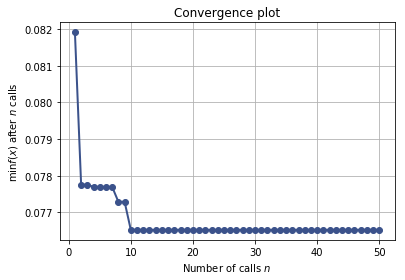

In [48]:
from skopt.plots import plot_convergence

plot_convergence(res_gprt)

In [49]:
print("""Best parameters: - depth=%d - l2_leaf_reg=%.6f - learning_rate=%.6f""" % (res_gprt.x[0], res_gprt.x[1], res_gprt.x[2]))

Best parameters: - depth=3 - l2_leaf_reg=4.910099 - learning_rate=0.172323


In [51]:
model = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.3, gpu_cat_features_storage='CpuPinnedMemory', grow_policy='SymmetricTree', iterations=6000, learning_rate=0.172323, l2_leaf_reg=4.910099, depth=3)
model.fit(train_pool, eval_set=valid_pool)
eval_metrics = model.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)

0:	learn: 0.5539616	test: 0.5544932	best: 0.5544932 (0)	total: 17.2ms	remaining: 1m 43s
1:	learn: 0.4666447	test: 0.4677419	best: 0.4677419 (1)	total: 33ms	remaining: 1m 38s
2:	learn: 0.4115450	test: 0.4131174	best: 0.4131174 (2)	total: 48.6ms	remaining: 1m 37s
3:	learn: 0.3765617	test: 0.3785665	best: 0.3785665 (3)	total: 64.5ms	remaining: 1m 36s
4:	learn: 0.3540033	test: 0.3562973	best: 0.3562973 (4)	total: 80.8ms	remaining: 1m 36s
5:	learn: 0.3387507	test: 0.3412047	best: 0.3412047 (5)	total: 97.2ms	remaining: 1m 37s
6:	learn: 0.3286069	test: 0.3311393	best: 0.3311393 (6)	total: 113ms	remaining: 1m 37s
7:	learn: 0.3216287	test: 0.3244885	best: 0.3244885 (7)	total: 129ms	remaining: 1m 36s
8:	learn: 0.3164107	test: 0.3192788	best: 0.3192788 (8)	total: 144ms	remaining: 1m 36s
9:	learn: 0.3127041	test: 0.3156304	best: 0.3156304 (9)	total: 159ms	remaining: 1m 35s
10:	learn: 0.3098134	test: 0.3127973	best: 0.3127973 (10)	total: 173ms	remaining: 1m 34s
11:	learn: 0.3073400	test: 0.3104148	

96:	learn: 0.2524529	test: 0.2575323	best: 0.2575323 (96)	total: 1.33s	remaining: 1m 20s
97:	learn: 0.2521047	test: 0.2572045	best: 0.2572045 (97)	total: 1.34s	remaining: 1m 20s
98:	learn: 0.2517330	test: 0.2568099	best: 0.2568099 (98)	total: 1.35s	remaining: 1m 20s
99:	learn: 0.2514204	test: 0.2565352	best: 0.2565352 (99)	total: 1.37s	remaining: 1m 20s
100:	learn: 0.2510831	test: 0.2562889	best: 0.2562889 (100)	total: 1.38s	remaining: 1m 20s
101:	learn: 0.2507640	test: 0.2560053	best: 0.2560053 (101)	total: 1.39s	remaining: 1m 20s
102:	learn: 0.2504090	test: 0.2556868	best: 0.2556868 (102)	total: 1.41s	remaining: 1m 20s
103:	learn: 0.2500405	test: 0.2552846	best: 0.2552846 (103)	total: 1.42s	remaining: 1m 20s
104:	learn: 0.2497138	test: 0.2549652	best: 0.2549652 (104)	total: 1.43s	remaining: 1m 20s
105:	learn: 0.2494116	test: 0.2547270	best: 0.2547270 (105)	total: 1.45s	remaining: 1m 20s
106:	learn: 0.2490882	test: 0.2544564	best: 0.2544564 (106)	total: 1.46s	remaining: 1m 20s
107:	le

192:	learn: 0.2285377	test: 0.2359202	best: 0.2359202 (192)	total: 2.62s	remaining: 1m 18s
193:	learn: 0.2283721	test: 0.2358112	best: 0.2358112 (193)	total: 2.63s	remaining: 1m 18s
194:	learn: 0.2282094	test: 0.2357165	best: 0.2357165 (194)	total: 2.65s	remaining: 1m 18s
195:	learn: 0.2280278	test: 0.2355744	best: 0.2355744 (195)	total: 2.66s	remaining: 1m 18s
196:	learn: 0.2278166	test: 0.2353582	best: 0.2353582 (196)	total: 2.68s	remaining: 1m 18s
197:	learn: 0.2276597	test: 0.2352663	best: 0.2352663 (197)	total: 2.69s	remaining: 1m 18s
198:	learn: 0.2274632	test: 0.2351163	best: 0.2351163 (198)	total: 2.71s	remaining: 1m 18s
199:	learn: 0.2273251	test: 0.2350082	best: 0.2350082 (199)	total: 2.72s	remaining: 1m 18s
200:	learn: 0.2271647	test: 0.2348921	best: 0.2348921 (200)	total: 2.73s	remaining: 1m 18s
201:	learn: 0.2270005	test: 0.2347242	best: 0.2347242 (201)	total: 2.75s	remaining: 1m 18s
202:	learn: 0.2268439	test: 0.2345788	best: 0.2345788 (202)	total: 2.76s	remaining: 1m 18s

283:	learn: 0.2158966	test: 0.2252446	best: 0.2252446 (283)	total: 3.89s	remaining: 1m 18s
284:	learn: 0.2158106	test: 0.2251470	best: 0.2251470 (284)	total: 3.9s	remaining: 1m 18s
285:	learn: 0.2156856	test: 0.2250628	best: 0.2250628 (285)	total: 3.92s	remaining: 1m 18s
286:	learn: 0.2155814	test: 0.2249955	best: 0.2249955 (286)	total: 3.93s	remaining: 1m 18s
287:	learn: 0.2154602	test: 0.2249074	best: 0.2249074 (287)	total: 3.94s	remaining: 1m 18s
288:	learn: 0.2153621	test: 0.2247828	best: 0.2247828 (288)	total: 3.96s	remaining: 1m 18s
289:	learn: 0.2152689	test: 0.2246872	best: 0.2246872 (289)	total: 3.97s	remaining: 1m 18s
290:	learn: 0.2151737	test: 0.2245987	best: 0.2245987 (290)	total: 3.98s	remaining: 1m 18s
291:	learn: 0.2150705	test: 0.2244796	best: 0.2244796 (291)	total: 4s	remaining: 1m 18s
292:	learn: 0.2149518	test: 0.2243840	best: 0.2243840 (292)	total: 4.01s	remaining: 1m 18s
293:	learn: 0.2148369	test: 0.2243132	best: 0.2243132 (293)	total: 4.03s	remaining: 1m 18s
294

375:	learn: 0.2072327	test: 0.2182973	best: 0.2182973 (375)	total: 5.17s	remaining: 1m 17s
376:	learn: 0.2071547	test: 0.2182642	best: 0.2182642 (376)	total: 5.19s	remaining: 1m 17s
377:	learn: 0.2070694	test: 0.2182138	best: 0.2182138 (377)	total: 5.2s	remaining: 1m 17s
378:	learn: 0.2069829	test: 0.2181423	best: 0.2181423 (378)	total: 5.21s	remaining: 1m 17s
379:	learn: 0.2069156	test: 0.2180939	best: 0.2180939 (379)	total: 5.23s	remaining: 1m 17s
380:	learn: 0.2068442	test: 0.2180213	best: 0.2180213 (380)	total: 5.24s	remaining: 1m 17s
381:	learn: 0.2067415	test: 0.2179392	best: 0.2179392 (381)	total: 5.26s	remaining: 1m 17s
382:	learn: 0.2066763	test: 0.2178787	best: 0.2178787 (382)	total: 5.27s	remaining: 1m 17s
383:	learn: 0.2065836	test: 0.2178210	best: 0.2178210 (383)	total: 5.28s	remaining: 1m 17s
384:	learn: 0.2065016	test: 0.2177582	best: 0.2177582 (384)	total: 5.3s	remaining: 1m 17s
385:	learn: 0.2064313	test: 0.2176920	best: 0.2176920 (385)	total: 5.31s	remaining: 1m 17s
3

470:	learn: 0.2007815	test: 0.2140002	best: 0.2140002 (470)	total: 6.49s	remaining: 1m 16s
471:	learn: 0.2007373	test: 0.2139814	best: 0.2139814 (471)	total: 6.5s	remaining: 1m 16s
472:	learn: 0.2006843	test: 0.2139475	best: 0.2139475 (472)	total: 6.52s	remaining: 1m 16s
473:	learn: 0.2006215	test: 0.2138932	best: 0.2138932 (473)	total: 6.53s	remaining: 1m 16s
474:	learn: 0.2005655	test: 0.2138387	best: 0.2138387 (474)	total: 6.54s	remaining: 1m 16s
475:	learn: 0.2005104	test: 0.2137832	best: 0.2137832 (475)	total: 6.56s	remaining: 1m 16s
476:	learn: 0.2004300	test: 0.2137296	best: 0.2137296 (476)	total: 6.58s	remaining: 1m 16s
477:	learn: 0.2003633	test: 0.2136913	best: 0.2136913 (477)	total: 6.59s	remaining: 1m 16s
478:	learn: 0.2002980	test: 0.2136465	best: 0.2136465 (478)	total: 6.61s	remaining: 1m 16s
479:	learn: 0.2002323	test: 0.2136192	best: 0.2136192 (479)	total: 6.62s	remaining: 1m 16s
480:	learn: 0.2001743	test: 0.2135962	best: 0.2135962 (480)	total: 6.63s	remaining: 1m 16s


564:	learn: 0.1957008	test: 0.2109719	best: 0.2109719 (564)	total: 7.78s	remaining: 1m 14s
565:	learn: 0.1956599	test: 0.2109634	best: 0.2109634 (565)	total: 7.79s	remaining: 1m 14s
566:	learn: 0.1956091	test: 0.2109259	best: 0.2109259 (566)	total: 7.8s	remaining: 1m 14s
567:	learn: 0.1955568	test: 0.2109039	best: 0.2109039 (567)	total: 7.82s	remaining: 1m 14s
568:	learn: 0.1955174	test: 0.2108807	best: 0.2108807 (568)	total: 7.83s	remaining: 1m 14s
569:	learn: 0.1954629	test: 0.2108481	best: 0.2108481 (569)	total: 7.84s	remaining: 1m 14s
570:	learn: 0.1954148	test: 0.2108174	best: 0.2108174 (570)	total: 7.86s	remaining: 1m 14s
571:	learn: 0.1953744	test: 0.2107998	best: 0.2107998 (571)	total: 7.87s	remaining: 1m 14s
572:	learn: 0.1953272	test: 0.2107723	best: 0.2107723 (572)	total: 7.88s	remaining: 1m 14s
573:	learn: 0.1952871	test: 0.2107697	best: 0.2107697 (573)	total: 7.89s	remaining: 1m 14s
574:	learn: 0.1952485	test: 0.2107169	best: 0.2107169 (574)	total: 7.91s	remaining: 1m 14s


659:	learn: 0.1914692	test: 0.2091874	best: 0.2091874 (659)	total: 9.06s	remaining: 1m 13s
660:	learn: 0.1914150	test: 0.2091670	best: 0.2091670 (660)	total: 9.08s	remaining: 1m 13s
661:	learn: 0.1913769	test: 0.2091591	best: 0.2091591 (661)	total: 9.09s	remaining: 1m 13s
662:	learn: 0.1913294	test: 0.2091287	best: 0.2091287 (662)	total: 9.11s	remaining: 1m 13s
663:	learn: 0.1912945	test: 0.2091048	best: 0.2091048 (663)	total: 9.12s	remaining: 1m 13s
664:	learn: 0.1912500	test: 0.2090881	best: 0.2090881 (664)	total: 9.14s	remaining: 1m 13s
665:	learn: 0.1912154	test: 0.2090726	best: 0.2090726 (665)	total: 9.15s	remaining: 1m 13s
666:	learn: 0.1911616	test: 0.2090254	best: 0.2090254 (666)	total: 9.16s	remaining: 1m 13s
667:	learn: 0.1911221	test: 0.2090166	best: 0.2090166 (667)	total: 9.18s	remaining: 1m 13s
668:	learn: 0.1910804	test: 0.2090146	best: 0.2090146 (668)	total: 9.19s	remaining: 1m 13s
669:	learn: 0.1910351	test: 0.2090188	best: 0.2090146 (668)	total: 9.2s	remaining: 1m 13s


753:	learn: 0.1880247	test: 0.2079179	best: 0.2079062 (751)	total: 10.3s	remaining: 1m 11s
754:	learn: 0.1879929	test: 0.2079081	best: 0.2079062 (751)	total: 10.3s	remaining: 1m 11s
755:	learn: 0.1879626	test: 0.2078759	best: 0.2078759 (755)	total: 10.4s	remaining: 1m 11s
756:	learn: 0.1879399	test: 0.2078712	best: 0.2078712 (756)	total: 10.4s	remaining: 1m 11s
757:	learn: 0.1878939	test: 0.2078445	best: 0.2078445 (757)	total: 10.4s	remaining: 1m 11s
758:	learn: 0.1878561	test: 0.2078428	best: 0.2078428 (758)	total: 10.4s	remaining: 1m 11s
759:	learn: 0.1878220	test: 0.2078372	best: 0.2078372 (759)	total: 10.4s	remaining: 1m 11s
760:	learn: 0.1877861	test: 0.2078474	best: 0.2078372 (759)	total: 10.4s	remaining: 1m 11s
761:	learn: 0.1877522	test: 0.2078364	best: 0.2078364 (761)	total: 10.4s	remaining: 1m 11s
762:	learn: 0.1877260	test: 0.2078184	best: 0.2078184 (762)	total: 10.4s	remaining: 1m 11s
763:	learn: 0.1876737	test: 0.2078224	best: 0.2078184 (762)	total: 10.5s	remaining: 1m 11s

850:	learn: 0.1846503	test: 0.2069672	best: 0.2069672 (850)	total: 11.6s	remaining: 1m 10s
851:	learn: 0.1846316	test: 0.2069851	best: 0.2069672 (850)	total: 11.6s	remaining: 1m 10s
852:	learn: 0.1845981	test: 0.2069690	best: 0.2069672 (850)	total: 11.7s	remaining: 1m 10s
853:	learn: 0.1845674	test: 0.2069638	best: 0.2069638 (853)	total: 11.7s	remaining: 1m 10s
854:	learn: 0.1845254	test: 0.2069746	best: 0.2069638 (853)	total: 11.7s	remaining: 1m 10s
855:	learn: 0.1845030	test: 0.2069650	best: 0.2069638 (853)	total: 11.7s	remaining: 1m 10s
856:	learn: 0.1844792	test: 0.2069555	best: 0.2069555 (856)	total: 11.7s	remaining: 1m 10s
857:	learn: 0.1844403	test: 0.2069621	best: 0.2069555 (856)	total: 11.7s	remaining: 1m 10s
858:	learn: 0.1844056	test: 0.2069648	best: 0.2069555 (856)	total: 11.7s	remaining: 1m 10s
859:	learn: 0.1843702	test: 0.2069644	best: 0.2069555 (856)	total: 11.7s	remaining: 1m 10s
860:	learn: 0.1843456	test: 0.2069487	best: 0.2069487 (860)	total: 11.8s	remaining: 1m 10s

944:	learn: 0.1817586	test: 0.2063980	best: 0.2063827 (937)	total: 12.9s	remaining: 1m 9s
945:	learn: 0.1817313	test: 0.2063744	best: 0.2063744 (945)	total: 12.9s	remaining: 1m 9s
946:	learn: 0.1817066	test: 0.2063827	best: 0.2063744 (945)	total: 12.9s	remaining: 1m 9s
947:	learn: 0.1816772	test: 0.2063696	best: 0.2063696 (947)	total: 13s	remaining: 1m 9s
948:	learn: 0.1816478	test: 0.2063708	best: 0.2063696 (947)	total: 13s	remaining: 1m 9s
949:	learn: 0.1816297	test: 0.2063703	best: 0.2063696 (947)	total: 13s	remaining: 1m 9s
950:	learn: 0.1815875	test: 0.2063526	best: 0.2063526 (950)	total: 13s	remaining: 1m 9s
951:	learn: 0.1815648	test: 0.2063355	best: 0.2063355 (951)	total: 13s	remaining: 1m 8s
952:	learn: 0.1815373	test: 0.2063221	best: 0.2063221 (952)	total: 13s	remaining: 1m 8s
953:	learn: 0.1815096	test: 0.2063198	best: 0.2063198 (953)	total: 13s	remaining: 1m 8s
954:	learn: 0.1814787	test: 0.2063023	best: 0.2063023 (954)	total: 13.1s	remaining: 1m 8s
955:	learn: 0.1814530	te

1039:	learn: 0.1790245	test: 0.2057384	best: 0.2057384 (1039)	total: 14.2s	remaining: 1m 7s
1040:	learn: 0.1789916	test: 0.2057343	best: 0.2057343 (1040)	total: 14.2s	remaining: 1m 7s
1041:	learn: 0.1789652	test: 0.2057314	best: 0.2057314 (1041)	total: 14.2s	remaining: 1m 7s
1042:	learn: 0.1789510	test: 0.2057313	best: 0.2057313 (1042)	total: 14.2s	remaining: 1m 7s
1043:	learn: 0.1789258	test: 0.2057269	best: 0.2057269 (1043)	total: 14.3s	remaining: 1m 7s
1044:	learn: 0.1788987	test: 0.2057274	best: 0.2057269 (1043)	total: 14.3s	remaining: 1m 7s
1045:	learn: 0.1788686	test: 0.2057303	best: 0.2057269 (1043)	total: 14.3s	remaining: 1m 7s
1046:	learn: 0.1788501	test: 0.2057218	best: 0.2057218 (1046)	total: 14.3s	remaining: 1m 7s
1047:	learn: 0.1788308	test: 0.2057268	best: 0.2057218 (1046)	total: 14.3s	remaining: 1m 7s
1048:	learn: 0.1788128	test: 0.2057342	best: 0.2057218 (1046)	total: 14.3s	remaining: 1m 7s
1049:	learn: 0.1787899	test: 0.2057333	best: 0.2057218 (1046)	total: 14.3s	remai

1129:	learn: 0.1766139	test: 0.2055576	best: 0.2055450 (1094)	total: 15.7s	remaining: 1m 7s
1130:	learn: 0.1765827	test: 0.2055771	best: 0.2055450 (1094)	total: 15.7s	remaining: 1m 7s
1131:	learn: 0.1765460	test: 0.2055863	best: 0.2055450 (1094)	total: 15.7s	remaining: 1m 7s
1132:	learn: 0.1765285	test: 0.2055767	best: 0.2055450 (1094)	total: 15.7s	remaining: 1m 7s
1133:	learn: 0.1765046	test: 0.2055653	best: 0.2055450 (1094)	total: 15.7s	remaining: 1m 7s
1134:	learn: 0.1764734	test: 0.2055779	best: 0.2055450 (1094)	total: 15.7s	remaining: 1m 7s
1135:	learn: 0.1764421	test: 0.2055600	best: 0.2055450 (1094)	total: 15.8s	remaining: 1m 7s
1136:	learn: 0.1764207	test: 0.2055516	best: 0.2055450 (1094)	total: 15.8s	remaining: 1m 7s
1137:	learn: 0.1763921	test: 0.2055595	best: 0.2055450 (1094)	total: 15.8s	remaining: 1m 7s
1138:	learn: 0.1763638	test: 0.2055591	best: 0.2055450 (1094)	total: 15.8s	remaining: 1m 7s
1139:	learn: 0.1763478	test: 0.2055513	best: 0.2055450 (1094)	total: 15.8s	remai

1231:	learn: 0.1739474	test: 0.2053694	best: 0.2053515 (1224)	total: 17.1s	remaining: 1m 6s
1232:	learn: 0.1739270	test: 0.2053785	best: 0.2053515 (1224)	total: 17.1s	remaining: 1m 6s
1233:	learn: 0.1739039	test: 0.2053729	best: 0.2053515 (1224)	total: 17.1s	remaining: 1m 6s
1234:	learn: 0.1738815	test: 0.2053580	best: 0.2053515 (1224)	total: 17.2s	remaining: 1m 6s
1235:	learn: 0.1738601	test: 0.2053332	best: 0.2053332 (1235)	total: 17.2s	remaining: 1m 6s
1236:	learn: 0.1738433	test: 0.2053438	best: 0.2053332 (1235)	total: 17.2s	remaining: 1m 6s
1237:	learn: 0.1738180	test: 0.2053432	best: 0.2053332 (1235)	total: 17.2s	remaining: 1m 6s
1238:	learn: 0.1737997	test: 0.2053457	best: 0.2053332 (1235)	total: 17.2s	remaining: 1m 6s
1239:	learn: 0.1737786	test: 0.2053438	best: 0.2053332 (1235)	total: 17.2s	remaining: 1m 6s
1240:	learn: 0.1737579	test: 0.2053429	best: 0.2053332 (1235)	total: 17.2s	remaining: 1m 6s
1241:	learn: 0.1737296	test: 0.2053519	best: 0.2053332 (1235)	total: 17.3s	remai

1324:	learn: 0.1716795	test: 0.2053541	best: 0.2052807 (1255)	total: 18.8s	remaining: 1m 6s
1325:	learn: 0.1716469	test: 0.2053714	best: 0.2052807 (1255)	total: 18.8s	remaining: 1m 6s
1326:	learn: 0.1716170	test: 0.2053864	best: 0.2052807 (1255)	total: 18.8s	remaining: 1m 6s
1327:	learn: 0.1715972	test: 0.2053682	best: 0.2052807 (1255)	total: 18.8s	remaining: 1m 6s
1328:	learn: 0.1715755	test: 0.2053728	best: 0.2052807 (1255)	total: 18.8s	remaining: 1m 6s
1329:	learn: 0.1715478	test: 0.2053764	best: 0.2052807 (1255)	total: 18.8s	remaining: 1m 6s
1330:	learn: 0.1715232	test: 0.2053658	best: 0.2052807 (1255)	total: 18.9s	remaining: 1m 6s
1331:	learn: 0.1715033	test: 0.2053703	best: 0.2052807 (1255)	total: 18.9s	remaining: 1m 6s
1332:	learn: 0.1714882	test: 0.2053827	best: 0.2052807 (1255)	total: 18.9s	remaining: 1m 6s
1333:	learn: 0.1714635	test: 0.2053712	best: 0.2052807 (1255)	total: 18.9s	remaining: 1m 6s
1334:	learn: 0.1714322	test: 0.2053821	best: 0.2052807 (1255)	total: 18.9s	remai

1416:	learn: 0.1694150	test: 0.2053471	best: 0.2052807 (1255)	total: 21.1s	remaining: 1m 8s
1417:	learn: 0.1693871	test: 0.2053547	best: 0.2052807 (1255)	total: 21.3s	remaining: 1m 8s
1418:	learn: 0.1693734	test: 0.2053561	best: 0.2052807 (1255)	total: 21.4s	remaining: 1m 9s
1419:	learn: 0.1693422	test: 0.2053695	best: 0.2052807 (1255)	total: 21.4s	remaining: 1m 9s
1420:	learn: 0.1693176	test: 0.2053693	best: 0.2052807 (1255)	total: 21.5s	remaining: 1m 9s
1421:	learn: 0.1692978	test: 0.2053684	best: 0.2052807 (1255)	total: 21.5s	remaining: 1m 9s
1422:	learn: 0.1692769	test: 0.2053659	best: 0.2052807 (1255)	total: 21.5s	remaining: 1m 9s
1423:	learn: 0.1692532	test: 0.2053554	best: 0.2052807 (1255)	total: 21.6s	remaining: 1m 9s
1424:	learn: 0.1692199	test: 0.2053335	best: 0.2052807 (1255)	total: 21.6s	remaining: 1m 9s
1425:	learn: 0.1692006	test: 0.2053471	best: 0.2052807 (1255)	total: 21.7s	remaining: 1m 9s
1426:	learn: 0.1691817	test: 0.2053401	best: 0.2052807 (1255)	total: 21.7s	remai

1509:	learn: 0.1673270	test: 0.2053346	best: 0.2052807 (1255)	total: 23.7s	remaining: 1m 10s
1510:	learn: 0.1673063	test: 0.2053376	best: 0.2052807 (1255)	total: 23.7s	remaining: 1m 10s
1511:	learn: 0.1672778	test: 0.2053457	best: 0.2052807 (1255)	total: 23.7s	remaining: 1m 10s
1512:	learn: 0.1672506	test: 0.2053483	best: 0.2052807 (1255)	total: 23.7s	remaining: 1m 10s
1513:	learn: 0.1672245	test: 0.2053425	best: 0.2052807 (1255)	total: 23.7s	remaining: 1m 10s
1514:	learn: 0.1672072	test: 0.2053513	best: 0.2052807 (1255)	total: 23.7s	remaining: 1m 10s
1515:	learn: 0.1671786	test: 0.2053483	best: 0.2052807 (1255)	total: 23.8s	remaining: 1m 10s
1516:	learn: 0.1671555	test: 0.2053586	best: 0.2052807 (1255)	total: 23.8s	remaining: 1m 10s
1517:	learn: 0.1671318	test: 0.2053564	best: 0.2052807 (1255)	total: 23.8s	remaining: 1m 10s
1518:	learn: 0.1671166	test: 0.2053619	best: 0.2052807 (1255)	total: 23.8s	remaining: 1m 10s
1519:	learn: 0.1671061	test: 0.2053726	best: 0.2052807 (1255)	total: 2

1603:	learn: 0.1651245	test: 0.2053384	best: 0.2052807 (1255)	total: 25.1s	remaining: 1m 8s
1604:	learn: 0.1650984	test: 0.2053505	best: 0.2052807 (1255)	total: 25.1s	remaining: 1m 8s
1605:	learn: 0.1650705	test: 0.2053618	best: 0.2052807 (1255)	total: 25.2s	remaining: 1m 8s
1606:	learn: 0.1650478	test: 0.2053622	best: 0.2052807 (1255)	total: 25.2s	remaining: 1m 8s
1607:	learn: 0.1650289	test: 0.2053611	best: 0.2052807 (1255)	total: 25.2s	remaining: 1m 8s
1608:	learn: 0.1650013	test: 0.2053544	best: 0.2052807 (1255)	total: 25.2s	remaining: 1m 8s
1609:	learn: 0.1649815	test: 0.2053721	best: 0.2052807 (1255)	total: 25.2s	remaining: 1m 8s
1610:	learn: 0.1649601	test: 0.2053562	best: 0.2052807 (1255)	total: 25.2s	remaining: 1m 8s
1611:	learn: 0.1649332	test: 0.2053554	best: 0.2052807 (1255)	total: 25.3s	remaining: 1m 8s
1612:	learn: 0.1649155	test: 0.2053577	best: 0.2052807 (1255)	total: 25.3s	remaining: 1m 8s
1613:	learn: 0.1648971	test: 0.2053648	best: 0.2052807 (1255)	total: 25.3s	remai

1696:	learn: 0.1631890	test: 0.2054742	best: 0.2052807 (1255)	total: 26.6s	remaining: 1m 7s
1697:	learn: 0.1631684	test: 0.2054762	best: 0.2052807 (1255)	total: 26.6s	remaining: 1m 7s
1698:	learn: 0.1631359	test: 0.2054938	best: 0.2052807 (1255)	total: 26.6s	remaining: 1m 7s
1699:	learn: 0.1631229	test: 0.2054991	best: 0.2052807 (1255)	total: 26.6s	remaining: 1m 7s
1700:	learn: 0.1630871	test: 0.2054869	best: 0.2052807 (1255)	total: 26.6s	remaining: 1m 7s
1701:	learn: 0.1630624	test: 0.2054843	best: 0.2052807 (1255)	total: 26.7s	remaining: 1m 7s
1702:	learn: 0.1630353	test: 0.2055051	best: 0.2052807 (1255)	total: 26.7s	remaining: 1m 7s
1703:	learn: 0.1630119	test: 0.2054951	best: 0.2052807 (1255)	total: 26.7s	remaining: 1m 7s
1704:	learn: 0.1629826	test: 0.2055022	best: 0.2052807 (1255)	total: 26.7s	remaining: 1m 7s
1705:	learn: 0.1629682	test: 0.2055095	best: 0.2052807 (1255)	total: 26.7s	remaining: 1m 7s
1706:	learn: 0.1629351	test: 0.2055052	best: 0.2052807 (1255)	total: 26.7s	remai

1793:	learn: 0.1611283	test: 0.2056553	best: 0.2052807 (1255)	total: 28s	remaining: 1m 5s
1794:	learn: 0.1610920	test: 0.2056812	best: 0.2052807 (1255)	total: 28.1s	remaining: 1m 5s
1795:	learn: 0.1610716	test: 0.2056864	best: 0.2052807 (1255)	total: 28.1s	remaining: 1m 5s
1796:	learn: 0.1610534	test: 0.2056971	best: 0.2052807 (1255)	total: 28.1s	remaining: 1m 5s
1797:	learn: 0.1610320	test: 0.2056822	best: 0.2052807 (1255)	total: 28.1s	remaining: 1m 5s
1798:	learn: 0.1610135	test: 0.2056913	best: 0.2052807 (1255)	total: 28.1s	remaining: 1m 5s
1799:	learn: 0.1609882	test: 0.2056954	best: 0.2052807 (1255)	total: 28.1s	remaining: 1m 5s
1800:	learn: 0.1609693	test: 0.2056954	best: 0.2052807 (1255)	total: 28.1s	remaining: 1m 5s
1801:	learn: 0.1609467	test: 0.2057167	best: 0.2052807 (1255)	total: 28.2s	remaining: 1m 5s
1802:	learn: 0.1609265	test: 0.2057238	best: 0.2052807 (1255)	total: 28.2s	remaining: 1m 5s
1803:	learn: 0.1609113	test: 0.2057263	best: 0.2052807 (1255)	total: 28.2s	remaini

1884:	learn: 0.1591911	test: 0.2057073	best: 0.2052807 (1255)	total: 29.5s	remaining: 1m 4s
1885:	learn: 0.1591740	test: 0.2057068	best: 0.2052807 (1255)	total: 29.5s	remaining: 1m 4s
1886:	learn: 0.1591536	test: 0.2057043	best: 0.2052807 (1255)	total: 29.5s	remaining: 1m 4s
1887:	learn: 0.1591302	test: 0.2056904	best: 0.2052807 (1255)	total: 29.6s	remaining: 1m 4s
1888:	learn: 0.1591074	test: 0.2056986	best: 0.2052807 (1255)	total: 29.6s	remaining: 1m 4s
1889:	learn: 0.1590808	test: 0.2057107	best: 0.2052807 (1255)	total: 29.6s	remaining: 1m 4s
1890:	learn: 0.1590604	test: 0.2057121	best: 0.2052807 (1255)	total: 29.6s	remaining: 1m 4s
1891:	learn: 0.1590397	test: 0.2057142	best: 0.2052807 (1255)	total: 29.6s	remaining: 1m 4s
1892:	learn: 0.1590220	test: 0.2057173	best: 0.2052807 (1255)	total: 29.6s	remaining: 1m 4s
1893:	learn: 0.1590056	test: 0.2057122	best: 0.2052807 (1255)	total: 29.7s	remaining: 1m 4s
1894:	learn: 0.1589817	test: 0.2057045	best: 0.2052807 (1255)	total: 29.7s	remai

1984:	learn: 0.1572084	test: 0.2059248	best: 0.2052807 (1255)	total: 31.2s	remaining: 1m 3s
1985:	learn: 0.1571839	test: 0.2059380	best: 0.2052807 (1255)	total: 31.2s	remaining: 1m 3s
1986:	learn: 0.1571643	test: 0.2059316	best: 0.2052807 (1255)	total: 31.2s	remaining: 1m 3s
1987:	learn: 0.1571366	test: 0.2059334	best: 0.2052807 (1255)	total: 31.2s	remaining: 1m 3s
1988:	learn: 0.1571154	test: 0.2059306	best: 0.2052807 (1255)	total: 31.2s	remaining: 1m 2s
1989:	learn: 0.1570941	test: 0.2059350	best: 0.2052807 (1255)	total: 31.3s	remaining: 1m 2s
1990:	learn: 0.1570778	test: 0.2059354	best: 0.2052807 (1255)	total: 31.3s	remaining: 1m 2s
1991:	learn: 0.1570640	test: 0.2059313	best: 0.2052807 (1255)	total: 31.3s	remaining: 1m 2s
1992:	learn: 0.1570461	test: 0.2059238	best: 0.2052807 (1255)	total: 31.3s	remaining: 1m 2s
1993:	learn: 0.1570236	test: 0.2059091	best: 0.2052807 (1255)	total: 31.3s	remaining: 1m 2s
1994:	learn: 0.1570034	test: 0.2059150	best: 0.2052807 (1255)	total: 31.3s	remai

2078:	learn: 0.1553482	test: 0.2059905	best: 0.2052807 (1255)	total: 32.6s	remaining: 1m 1s
2079:	learn: 0.1553321	test: 0.2059922	best: 0.2052807 (1255)	total: 32.6s	remaining: 1m 1s
2080:	learn: 0.1553037	test: 0.2059953	best: 0.2052807 (1255)	total: 32.7s	remaining: 1m 1s
2081:	learn: 0.1552857	test: 0.2060002	best: 0.2052807 (1255)	total: 32.7s	remaining: 1m 1s
2082:	learn: 0.1552640	test: 0.2059924	best: 0.2052807 (1255)	total: 32.7s	remaining: 1m 1s
2083:	learn: 0.1552446	test: 0.2059853	best: 0.2052807 (1255)	total: 32.7s	remaining: 1m 1s
2084:	learn: 0.1552303	test: 0.2059883	best: 0.2052807 (1255)	total: 32.7s	remaining: 1m 1s
2085:	learn: 0.1552036	test: 0.2059908	best: 0.2052807 (1255)	total: 32.7s	remaining: 1m 1s
2086:	learn: 0.1551843	test: 0.2059891	best: 0.2052807 (1255)	total: 32.8s	remaining: 1m 1s
2087:	learn: 0.1551687	test: 0.2059926	best: 0.2052807 (1255)	total: 32.8s	remaining: 1m 1s
2088:	learn: 0.1551483	test: 0.2059946	best: 0.2052807 (1255)	total: 32.8s	remai

2171:	learn: 0.1535257	test: 0.2062197	best: 0.2052807 (1255)	total: 34.1s	remaining: 1m
2172:	learn: 0.1535007	test: 0.2062142	best: 0.2052807 (1255)	total: 34.1s	remaining: 1m
2173:	learn: 0.1534869	test: 0.2062137	best: 0.2052807 (1255)	total: 34.1s	remaining: 1m
2174:	learn: 0.1534760	test: 0.2062188	best: 0.2052807 (1255)	total: 34.2s	remaining: 1m
2175:	learn: 0.1534560	test: 0.2062322	best: 0.2052807 (1255)	total: 34.2s	remaining: 1m
2176:	learn: 0.1534306	test: 0.2062496	best: 0.2052807 (1255)	total: 34.2s	remaining: 1m
2177:	learn: 0.1534137	test: 0.2062431	best: 0.2052807 (1255)	total: 34.2s	remaining: 1m
2178:	learn: 0.1533851	test: 0.2062605	best: 0.2052807 (1255)	total: 34.2s	remaining: 1m
2179:	learn: 0.1533523	test: 0.2062740	best: 0.2052807 (1255)	total: 34.2s	remaining: 60s
2180:	learn: 0.1533396	test: 0.2062719	best: 0.2052807 (1255)	total: 34.2s	remaining: 60s
2181:	learn: 0.1533134	test: 0.2062614	best: 0.2052807 (1255)	total: 34.3s	remaining: 59.9s
2182:	learn: 0.1

2269:	learn: 0.1516982	test: 0.2062155	best: 0.2052807 (1255)	total: 35.6s	remaining: 58.5s
2270:	learn: 0.1516865	test: 0.2062183	best: 0.2052807 (1255)	total: 35.6s	remaining: 58.5s
2271:	learn: 0.1516721	test: 0.2062173	best: 0.2052807 (1255)	total: 35.6s	remaining: 58.5s
2272:	learn: 0.1516478	test: 0.2062009	best: 0.2052807 (1255)	total: 35.6s	remaining: 58.5s
2273:	learn: 0.1516327	test: 0.2062023	best: 0.2052807 (1255)	total: 35.7s	remaining: 58.4s
2274:	learn: 0.1515969	test: 0.2062250	best: 0.2052807 (1255)	total: 35.7s	remaining: 58.4s
2275:	learn: 0.1515844	test: 0.2062331	best: 0.2052807 (1255)	total: 35.7s	remaining: 58.4s
2276:	learn: 0.1515669	test: 0.2062341	best: 0.2052807 (1255)	total: 35.7s	remaining: 58.4s
2277:	learn: 0.1515355	test: 0.2062547	best: 0.2052807 (1255)	total: 35.7s	remaining: 58.4s
2278:	learn: 0.1515150	test: 0.2062643	best: 0.2052807 (1255)	total: 35.7s	remaining: 58.4s
2279:	learn: 0.1514914	test: 0.2062622	best: 0.2052807 (1255)	total: 35.8s	remai

2361:	learn: 0.1500421	test: 0.2063745	best: 0.2052807 (1255)	total: 37.1s	remaining: 57.1s
2362:	learn: 0.1500213	test: 0.2063806	best: 0.2052807 (1255)	total: 37.1s	remaining: 57.1s
2363:	learn: 0.1500039	test: 0.2063871	best: 0.2052807 (1255)	total: 37.1s	remaining: 57s
2364:	learn: 0.1499943	test: 0.2063820	best: 0.2052807 (1255)	total: 37.1s	remaining: 57s
2365:	learn: 0.1499716	test: 0.2063907	best: 0.2052807 (1255)	total: 37.1s	remaining: 57s
2366:	learn: 0.1499485	test: 0.2063909	best: 0.2052807 (1255)	total: 37.1s	remaining: 57s
2367:	learn: 0.1499226	test: 0.2063978	best: 0.2052807 (1255)	total: 37.1s	remaining: 57s
2368:	learn: 0.1499101	test: 0.2064011	best: 0.2052807 (1255)	total: 37.2s	remaining: 57s
2369:	learn: 0.1498958	test: 0.2063987	best: 0.2052807 (1255)	total: 37.2s	remaining: 56.9s
2370:	learn: 0.1498829	test: 0.2064015	best: 0.2052807 (1255)	total: 37.2s	remaining: 56.9s
2371:	learn: 0.1498668	test: 0.2063923	best: 0.2052807 (1255)	total: 37.2s	remaining: 56.9s


2454:	learn: 0.1483076	test: 0.2065529	best: 0.2052807 (1255)	total: 38.5s	remaining: 55.6s
2455:	learn: 0.1482928	test: 0.2065588	best: 0.2052807 (1255)	total: 38.5s	remaining: 55.6s
2456:	learn: 0.1482774	test: 0.2065594	best: 0.2052807 (1255)	total: 38.5s	remaining: 55.6s
2457:	learn: 0.1482572	test: 0.2065533	best: 0.2052807 (1255)	total: 38.6s	remaining: 55.6s
2458:	learn: 0.1482441	test: 0.2065653	best: 0.2052807 (1255)	total: 38.6s	remaining: 55.6s
2459:	learn: 0.1482263	test: 0.2065739	best: 0.2052807 (1255)	total: 38.6s	remaining: 55.5s
2460:	learn: 0.1482088	test: 0.2065749	best: 0.2052807 (1255)	total: 38.6s	remaining: 55.5s
2461:	learn: 0.1481830	test: 0.2065746	best: 0.2052807 (1255)	total: 38.6s	remaining: 55.5s
2462:	learn: 0.1481723	test: 0.2065767	best: 0.2052807 (1255)	total: 38.6s	remaining: 55.5s
2463:	learn: 0.1481467	test: 0.2065716	best: 0.2052807 (1255)	total: 38.7s	remaining: 55.5s
2464:	learn: 0.1481209	test: 0.2065853	best: 0.2052807 (1255)	total: 38.7s	remai

2548:	learn: 0.1466197	test: 0.2066719	best: 0.2052807 (1255)	total: 40s	remaining: 54.1s
2549:	learn: 0.1466029	test: 0.2066636	best: 0.2052807 (1255)	total: 40s	remaining: 54.1s
2550:	learn: 0.1465858	test: 0.2066737	best: 0.2052807 (1255)	total: 40s	remaining: 54.1s
2551:	learn: 0.1465631	test: 0.2066695	best: 0.2052807 (1255)	total: 40s	remaining: 54.1s
2552:	learn: 0.1465396	test: 0.2066904	best: 0.2052807 (1255)	total: 40s	remaining: 54.1s
2553:	learn: 0.1465225	test: 0.2067097	best: 0.2052807 (1255)	total: 40.1s	remaining: 54s
2554:	learn: 0.1465007	test: 0.2067093	best: 0.2052807 (1255)	total: 40.1s	remaining: 54s
2555:	learn: 0.1464769	test: 0.2067053	best: 0.2052807 (1255)	total: 40.1s	remaining: 54s
2556:	learn: 0.1464563	test: 0.2067061	best: 0.2052807 (1255)	total: 40.1s	remaining: 54s
2557:	learn: 0.1464396	test: 0.2067030	best: 0.2052807 (1255)	total: 40.1s	remaining: 54s
2558:	learn: 0.1464285	test: 0.2067007	best: 0.2052807 (1255)	total: 40.1s	remaining: 54s
2559:	lear

2641:	learn: 0.1449438	test: 0.2068105	best: 0.2052807 (1255)	total: 41.4s	remaining: 52.7s
2642:	learn: 0.1449202	test: 0.2068205	best: 0.2052807 (1255)	total: 41.4s	remaining: 52.6s
2643:	learn: 0.1448994	test: 0.2068182	best: 0.2052807 (1255)	total: 41.5s	remaining: 52.6s
2644:	learn: 0.1448796	test: 0.2068214	best: 0.2052807 (1255)	total: 41.5s	remaining: 52.6s
2645:	learn: 0.1448695	test: 0.2068237	best: 0.2052807 (1255)	total: 41.5s	remaining: 52.6s
2646:	learn: 0.1448503	test: 0.2068331	best: 0.2052807 (1255)	total: 41.5s	remaining: 52.6s
2647:	learn: 0.1448360	test: 0.2068365	best: 0.2052807 (1255)	total: 41.5s	remaining: 52.6s
2648:	learn: 0.1448188	test: 0.2068307	best: 0.2052807 (1255)	total: 41.5s	remaining: 52.6s
2649:	learn: 0.1448068	test: 0.2068264	best: 0.2052807 (1255)	total: 41.6s	remaining: 52.5s
2650:	learn: 0.1447846	test: 0.2068146	best: 0.2052807 (1255)	total: 41.6s	remaining: 52.5s
2651:	learn: 0.1447597	test: 0.2068297	best: 0.2052807 (1255)	total: 41.6s	remai

2739:	learn: 0.1431998	test: 0.2070964	best: 0.2052807 (1255)	total: 42.9s	remaining: 51.1s
2740:	learn: 0.1431703	test: 0.2071084	best: 0.2052807 (1255)	total: 42.9s	remaining: 51s
2741:	learn: 0.1431510	test: 0.2070943	best: 0.2052807 (1255)	total: 42.9s	remaining: 51s
2742:	learn: 0.1431349	test: 0.2070908	best: 0.2052807 (1255)	total: 43s	remaining: 51s
2743:	learn: 0.1431134	test: 0.2070913	best: 0.2052807 (1255)	total: 43s	remaining: 51s
2744:	learn: 0.1430901	test: 0.2070895	best: 0.2052807 (1255)	total: 43s	remaining: 51s
2745:	learn: 0.1430780	test: 0.2071031	best: 0.2052807 (1255)	total: 43s	remaining: 51s
2746:	learn: 0.1430682	test: 0.2071180	best: 0.2052807 (1255)	total: 43s	remaining: 50.9s
2747:	learn: 0.1430516	test: 0.2071250	best: 0.2052807 (1255)	total: 43s	remaining: 50.9s
2748:	learn: 0.1430221	test: 0.2071194	best: 0.2052807 (1255)	total: 43s	remaining: 50.9s
2749:	learn: 0.1430103	test: 0.2071207	best: 0.2052807 (1255)	total: 43.1s	remaining: 50.9s
2750:	learn: 0

2835:	learn: 0.1414727	test: 0.2072820	best: 0.2052807 (1255)	total: 44.4s	remaining: 49.5s
2836:	learn: 0.1414541	test: 0.2072979	best: 0.2052807 (1255)	total: 44.4s	remaining: 49.5s
2837:	learn: 0.1414349	test: 0.2072946	best: 0.2052807 (1255)	total: 44.4s	remaining: 49.5s
2838:	learn: 0.1414169	test: 0.2072911	best: 0.2052807 (1255)	total: 44.4s	remaining: 49.5s
2839:	learn: 0.1414067	test: 0.2072859	best: 0.2052807 (1255)	total: 44.4s	remaining: 49.4s
2840:	learn: 0.1413945	test: 0.2073022	best: 0.2052807 (1255)	total: 44.5s	remaining: 49.4s
2841:	learn: 0.1413733	test: 0.2073092	best: 0.2052807 (1255)	total: 44.5s	remaining: 49.4s
2842:	learn: 0.1413536	test: 0.2073003	best: 0.2052807 (1255)	total: 44.5s	remaining: 49.4s
2843:	learn: 0.1413382	test: 0.2073019	best: 0.2052807 (1255)	total: 44.5s	remaining: 49.4s
2844:	learn: 0.1413170	test: 0.2073050	best: 0.2052807 (1255)	total: 44.5s	remaining: 49.4s
2845:	learn: 0.1413069	test: 0.2073035	best: 0.2052807 (1255)	total: 44.5s	remai

2928:	learn: 0.1398933	test: 0.2074104	best: 0.2052807 (1255)	total: 45.8s	remaining: 48s
2929:	learn: 0.1398785	test: 0.2074182	best: 0.2052807 (1255)	total: 45.8s	remaining: 48s
2930:	learn: 0.1398626	test: 0.2074240	best: 0.2052807 (1255)	total: 45.9s	remaining: 48s
2931:	learn: 0.1398382	test: 0.2074176	best: 0.2052807 (1255)	total: 45.9s	remaining: 48s
2932:	learn: 0.1398224	test: 0.2074161	best: 0.2052807 (1255)	total: 45.9s	remaining: 48s
2933:	learn: 0.1397954	test: 0.2074340	best: 0.2052807 (1255)	total: 45.9s	remaining: 48s
2934:	learn: 0.1397833	test: 0.2074360	best: 0.2052807 (1255)	total: 45.9s	remaining: 48s
2935:	learn: 0.1397739	test: 0.2074333	best: 0.2052807 (1255)	total: 45.9s	remaining: 47.9s
2936:	learn: 0.1397494	test: 0.2074284	best: 0.2052807 (1255)	total: 46s	remaining: 47.9s
2937:	learn: 0.1397359	test: 0.2074306	best: 0.2052807 (1255)	total: 46s	remaining: 47.9s
2938:	learn: 0.1397183	test: 0.2074295	best: 0.2052807 (1255)	total: 46s	remaining: 47.9s
2939:	le

3022:	learn: 0.1383668	test: 0.2076477	best: 0.2052807 (1255)	total: 47.3s	remaining: 46.6s
3023:	learn: 0.1383546	test: 0.2076582	best: 0.2052807 (1255)	total: 47.3s	remaining: 46.6s
3024:	learn: 0.1383433	test: 0.2076554	best: 0.2052807 (1255)	total: 47.3s	remaining: 46.6s
3025:	learn: 0.1383343	test: 0.2076558	best: 0.2052807 (1255)	total: 47.4s	remaining: 46.5s
3026:	learn: 0.1383155	test: 0.2076597	best: 0.2052807 (1255)	total: 47.4s	remaining: 46.5s
3027:	learn: 0.1383063	test: 0.2076682	best: 0.2052807 (1255)	total: 47.4s	remaining: 46.5s
3028:	learn: 0.1382935	test: 0.2076755	best: 0.2052807 (1255)	total: 47.4s	remaining: 46.5s
3029:	learn: 0.1382785	test: 0.2076851	best: 0.2052807 (1255)	total: 47.4s	remaining: 46.5s
3030:	learn: 0.1382580	test: 0.2076802	best: 0.2052807 (1255)	total: 47.4s	remaining: 46.5s
3031:	learn: 0.1382401	test: 0.2076800	best: 0.2052807 (1255)	total: 47.5s	remaining: 46.5s
3032:	learn: 0.1382260	test: 0.2076817	best: 0.2052807 (1255)	total: 47.5s	remai

3120:	learn: 0.1366818	test: 0.2078613	best: 0.2052807 (1255)	total: 48.8s	remaining: 45s
3121:	learn: 0.1366680	test: 0.2078608	best: 0.2052807 (1255)	total: 48.8s	remaining: 45s
3122:	learn: 0.1366530	test: 0.2078630	best: 0.2052807 (1255)	total: 48.8s	remaining: 45s
3123:	learn: 0.1366379	test: 0.2078618	best: 0.2052807 (1255)	total: 48.8s	remaining: 44.9s
3124:	learn: 0.1366246	test: 0.2078649	best: 0.2052807 (1255)	total: 48.8s	remaining: 44.9s
3125:	learn: 0.1366157	test: 0.2078693	best: 0.2052807 (1255)	total: 48.8s	remaining: 44.9s
3126:	learn: 0.1365956	test: 0.2078710	best: 0.2052807 (1255)	total: 48.9s	remaining: 44.9s
3127:	learn: 0.1365903	test: 0.2078615	best: 0.2052807 (1255)	total: 48.9s	remaining: 44.9s
3128:	learn: 0.1365750	test: 0.2078738	best: 0.2052807 (1255)	total: 48.9s	remaining: 44.9s
3129:	learn: 0.1365670	test: 0.2078800	best: 0.2052807 (1255)	total: 48.9s	remaining: 44.8s
3130:	learn: 0.1365590	test: 0.2078812	best: 0.2052807 (1255)	total: 48.9s	remaining: 

3220:	learn: 0.1351122	test: 0.2080269	best: 0.2052807 (1255)	total: 50.2s	remaining: 43.3s
3221:	learn: 0.1350923	test: 0.2080239	best: 0.2052807 (1255)	total: 50.3s	remaining: 43.3s
3222:	learn: 0.1350783	test: 0.2080177	best: 0.2052807 (1255)	total: 50.3s	remaining: 43.3s
3223:	learn: 0.1350695	test: 0.2080190	best: 0.2052807 (1255)	total: 50.3s	remaining: 43.3s
3224:	learn: 0.1350515	test: 0.2080042	best: 0.2052807 (1255)	total: 50.3s	remaining: 43.3s
3225:	learn: 0.1350378	test: 0.2079900	best: 0.2052807 (1255)	total: 50.3s	remaining: 43.3s
3226:	learn: 0.1350276	test: 0.2079885	best: 0.2052807 (1255)	total: 50.3s	remaining: 43.3s
3227:	learn: 0.1350161	test: 0.2079893	best: 0.2052807 (1255)	total: 50.3s	remaining: 43.2s
3228:	learn: 0.1350068	test: 0.2079872	best: 0.2052807 (1255)	total: 50.4s	remaining: 43.2s
3229:	learn: 0.1349918	test: 0.2079874	best: 0.2052807 (1255)	total: 50.4s	remaining: 43.2s
3230:	learn: 0.1349720	test: 0.2080038	best: 0.2052807 (1255)	total: 50.4s	remai

3316:	learn: 0.1334987	test: 0.2081179	best: 0.2052807 (1255)	total: 51.7s	remaining: 41.8s
3317:	learn: 0.1334870	test: 0.2081189	best: 0.2052807 (1255)	total: 51.7s	remaining: 41.8s
3318:	learn: 0.1334702	test: 0.2081238	best: 0.2052807 (1255)	total: 51.7s	remaining: 41.8s
3319:	learn: 0.1334619	test: 0.2081207	best: 0.2052807 (1255)	total: 51.7s	remaining: 41.8s
3320:	learn: 0.1334452	test: 0.2081231	best: 0.2052807 (1255)	total: 51.8s	remaining: 41.8s
3321:	learn: 0.1334363	test: 0.2081233	best: 0.2052807 (1255)	total: 51.8s	remaining: 41.7s
3322:	learn: 0.1334139	test: 0.2081235	best: 0.2052807 (1255)	total: 51.8s	remaining: 41.7s
3323:	learn: 0.1333918	test: 0.2081091	best: 0.2052807 (1255)	total: 51.8s	remaining: 41.7s
3324:	learn: 0.1333788	test: 0.2081060	best: 0.2052807 (1255)	total: 51.8s	remaining: 41.7s
3325:	learn: 0.1333595	test: 0.2081030	best: 0.2052807 (1255)	total: 51.8s	remaining: 41.7s
3326:	learn: 0.1333472	test: 0.2081008	best: 0.2052807 (1255)	total: 51.9s	remai

3414:	learn: 0.1318441	test: 0.2081465	best: 0.2052807 (1255)	total: 53.2s	remaining: 40.2s
3415:	learn: 0.1318331	test: 0.2081528	best: 0.2052807 (1255)	total: 53.2s	remaining: 40.2s
3416:	learn: 0.1318090	test: 0.2081695	best: 0.2052807 (1255)	total: 53.2s	remaining: 40.2s
3417:	learn: 0.1317904	test: 0.2081558	best: 0.2052807 (1255)	total: 53.2s	remaining: 40.2s
3418:	learn: 0.1317811	test: 0.2081601	best: 0.2052807 (1255)	total: 53.2s	remaining: 40.2s
3419:	learn: 0.1317699	test: 0.2081609	best: 0.2052807 (1255)	total: 53.2s	remaining: 40.2s
3420:	learn: 0.1317567	test: 0.2081678	best: 0.2052807 (1255)	total: 53.3s	remaining: 40.1s
3421:	learn: 0.1317372	test: 0.2081650	best: 0.2052807 (1255)	total: 53.3s	remaining: 40.1s
3422:	learn: 0.1317203	test: 0.2081567	best: 0.2052807 (1255)	total: 53.3s	remaining: 40.1s
3423:	learn: 0.1317089	test: 0.2081534	best: 0.2052807 (1255)	total: 53.3s	remaining: 40.1s
3424:	learn: 0.1316917	test: 0.2081754	best: 0.2052807 (1255)	total: 53.3s	remai

3513:	learn: 0.1302426	test: 0.2083000	best: 0.2052807 (1255)	total: 54.8s	remaining: 38.8s
3514:	learn: 0.1302263	test: 0.2082948	best: 0.2052807 (1255)	total: 54.8s	remaining: 38.7s
3515:	learn: 0.1302124	test: 0.2082933	best: 0.2052807 (1255)	total: 54.8s	remaining: 38.7s
3516:	learn: 0.1301855	test: 0.2083056	best: 0.2052807 (1255)	total: 54.8s	remaining: 38.7s
3517:	learn: 0.1301702	test: 0.2083013	best: 0.2052807 (1255)	total: 54.9s	remaining: 38.7s
3518:	learn: 0.1301488	test: 0.2083230	best: 0.2052807 (1255)	total: 54.9s	remaining: 38.7s
3519:	learn: 0.1301368	test: 0.2083318	best: 0.2052807 (1255)	total: 54.9s	remaining: 38.7s
3520:	learn: 0.1301226	test: 0.2083318	best: 0.2052807 (1255)	total: 54.9s	remaining: 38.7s
3521:	learn: 0.1301073	test: 0.2083433	best: 0.2052807 (1255)	total: 54.9s	remaining: 38.6s
3522:	learn: 0.1300910	test: 0.2083529	best: 0.2052807 (1255)	total: 54.9s	remaining: 38.6s
3523:	learn: 0.1300793	test: 0.2083563	best: 0.2052807 (1255)	total: 55s	remaini

3603:	learn: 0.1288636	test: 0.2084393	best: 0.2052807 (1255)	total: 56.3s	remaining: 37.4s
3604:	learn: 0.1288494	test: 0.2084485	best: 0.2052807 (1255)	total: 56.3s	remaining: 37.4s
3605:	learn: 0.1288304	test: 0.2084470	best: 0.2052807 (1255)	total: 56.3s	remaining: 37.4s
3606:	learn: 0.1288155	test: 0.2084393	best: 0.2052807 (1255)	total: 56.3s	remaining: 37.4s
3607:	learn: 0.1287974	test: 0.2084513	best: 0.2052807 (1255)	total: 56.4s	remaining: 37.4s
3608:	learn: 0.1287808	test: 0.2084501	best: 0.2052807 (1255)	total: 56.4s	remaining: 37.3s
3609:	learn: 0.1287685	test: 0.2084457	best: 0.2052807 (1255)	total: 56.4s	remaining: 37.3s
3610:	learn: 0.1287492	test: 0.2084577	best: 0.2052807 (1255)	total: 56.4s	remaining: 37.3s
3611:	learn: 0.1287388	test: 0.2084607	best: 0.2052807 (1255)	total: 56.4s	remaining: 37.3s
3612:	learn: 0.1287180	test: 0.2084648	best: 0.2052807 (1255)	total: 56.4s	remaining: 37.3s
3613:	learn: 0.1287082	test: 0.2084657	best: 0.2052807 (1255)	total: 56.4s	remai

3699:	learn: 0.1273450	test: 0.2086706	best: 0.2052807 (1255)	total: 57.8s	remaining: 35.9s
3700:	learn: 0.1273291	test: 0.2086696	best: 0.2052807 (1255)	total: 57.8s	remaining: 35.9s
3701:	learn: 0.1273112	test: 0.2086638	best: 0.2052807 (1255)	total: 57.8s	remaining: 35.9s
3702:	learn: 0.1272901	test: 0.2086700	best: 0.2052807 (1255)	total: 57.8s	remaining: 35.9s
3703:	learn: 0.1272730	test: 0.2086705	best: 0.2052807 (1255)	total: 57.9s	remaining: 35.9s
3704:	learn: 0.1272555	test: 0.2086975	best: 0.2052807 (1255)	total: 57.9s	remaining: 35.9s
3705:	learn: 0.1272374	test: 0.2086970	best: 0.2052807 (1255)	total: 57.9s	remaining: 35.8s
3706:	learn: 0.1272177	test: 0.2087000	best: 0.2052807 (1255)	total: 57.9s	remaining: 35.8s
3707:	learn: 0.1272097	test: 0.2087001	best: 0.2052807 (1255)	total: 57.9s	remaining: 35.8s
3708:	learn: 0.1271906	test: 0.2086996	best: 0.2052807 (1255)	total: 57.9s	remaining: 35.8s
3709:	learn: 0.1271687	test: 0.2086920	best: 0.2052807 (1255)	total: 58s	remaini

3794:	learn: 0.1258358	test: 0.2087987	best: 0.2052807 (1255)	total: 59.2s	remaining: 34.4s
3795:	learn: 0.1258171	test: 0.2087984	best: 0.2052807 (1255)	total: 59.3s	remaining: 34.4s
3796:	learn: 0.1258087	test: 0.2087962	best: 0.2052807 (1255)	total: 59.3s	remaining: 34.4s
3797:	learn: 0.1257896	test: 0.2088021	best: 0.2052807 (1255)	total: 59.3s	remaining: 34.4s
3798:	learn: 0.1257799	test: 0.2087948	best: 0.2052807 (1255)	total: 59.3s	remaining: 34.4s
3799:	learn: 0.1257641	test: 0.2088034	best: 0.2052807 (1255)	total: 59.3s	remaining: 34.3s
3800:	learn: 0.1257557	test: 0.2088099	best: 0.2052807 (1255)	total: 59.3s	remaining: 34.3s
3801:	learn: 0.1257385	test: 0.2088163	best: 0.2052807 (1255)	total: 59.3s	remaining: 34.3s
3802:	learn: 0.1257285	test: 0.2088197	best: 0.2052807 (1255)	total: 59.4s	remaining: 34.3s
3803:	learn: 0.1257135	test: 0.2088232	best: 0.2052807 (1255)	total: 59.4s	remaining: 34.3s
3804:	learn: 0.1257084	test: 0.2088250	best: 0.2052807 (1255)	total: 59.4s	remai

3892:	learn: 0.1244226	test: 0.2090323	best: 0.2052807 (1255)	total: 1m	remaining: 32.9s
3893:	learn: 0.1244097	test: 0.2090340	best: 0.2052807 (1255)	total: 1m	remaining: 32.8s
3894:	learn: 0.1243874	test: 0.2090369	best: 0.2052807 (1255)	total: 1m	remaining: 32.8s
3895:	learn: 0.1243753	test: 0.2090416	best: 0.2052807 (1255)	total: 1m	remaining: 32.8s
3896:	learn: 0.1243554	test: 0.2090420	best: 0.2052807 (1255)	total: 1m	remaining: 32.8s
3897:	learn: 0.1243477	test: 0.2090467	best: 0.2052807 (1255)	total: 1m	remaining: 32.8s
3898:	learn: 0.1243400	test: 0.2090444	best: 0.2052807 (1255)	total: 1m	remaining: 32.8s
3899:	learn: 0.1243232	test: 0.2090519	best: 0.2052807 (1255)	total: 1m	remaining: 32.7s
3900:	learn: 0.1243114	test: 0.2090496	best: 0.2052807 (1255)	total: 1m	remaining: 32.7s
3901:	learn: 0.1243070	test: 0.2090574	best: 0.2052807 (1255)	total: 1m	remaining: 32.7s
3902:	learn: 0.1242886	test: 0.2090591	best: 0.2052807 (1255)	total: 1m	remaining: 32.7s
3903:	learn: 0.124263

3988:	learn: 0.1229658	test: 0.2092451	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.3s
3989:	learn: 0.1229532	test: 0.2092462	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.3s
3990:	learn: 0.1229370	test: 0.2092497	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.3s
3991:	learn: 0.1229193	test: 0.2092661	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.3s
3992:	learn: 0.1229089	test: 0.2092685	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.3s
3993:	learn: 0.1228964	test: 0.2092731	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.3s
3994:	learn: 0.1228821	test: 0.2092666	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.2s
3995:	learn: 0.1228595	test: 0.2092809	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.2s
3996:	learn: 0.1228387	test: 0.2092984	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.2s
3997:	learn: 0.1228312	test: 0.2093055	best: 0.2052807 (1255)	total: 1m 2s	remaining: 31.2s
3998:	learn: 0.1228113	test: 0.2093107	best: 0.2052807 (1255)	total: 1m 2s	remai

4086:	learn: 0.1214902	test: 0.2094712	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.8s
4087:	learn: 0.1214713	test: 0.2094799	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.8s
4088:	learn: 0.1214607	test: 0.2094825	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.7s
4089:	learn: 0.1214470	test: 0.2094862	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.7s
4090:	learn: 0.1214292	test: 0.2094825	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.7s
4091:	learn: 0.1214174	test: 0.2094902	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.7s
4092:	learn: 0.1213992	test: 0.2094835	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.7s
4093:	learn: 0.1213765	test: 0.2095124	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.7s
4094:	learn: 0.1213578	test: 0.2095082	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.6s
4095:	learn: 0.1213473	test: 0.2095135	best: 0.2052807 (1255)	total: 1m 3s	remaining: 29.6s
4096:	learn: 0.1213420	test: 0.2095117	best: 0.2052807 (1255)	total: 1m 3s	remai

4184:	learn: 0.1200393	test: 0.2095782	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.2s
4185:	learn: 0.1200310	test: 0.2095795	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.2s
4186:	learn: 0.1200118	test: 0.2095842	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.2s
4187:	learn: 0.1200002	test: 0.2095979	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.2s
4188:	learn: 0.1199869	test: 0.2096014	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.2s
4189:	learn: 0.1199785	test: 0.2096074	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.1s
4190:	learn: 0.1199641	test: 0.2096058	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.1s
4191:	learn: 0.1199520	test: 0.2096213	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.1s
4192:	learn: 0.1199390	test: 0.2096304	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.1s
4193:	learn: 0.1199291	test: 0.2096340	best: 0.2052807 (1255)	total: 1m 5s	remaining: 28.1s
4194:	learn: 0.1199206	test: 0.2096357	best: 0.2052807 (1255)	total: 1m 5s	remai

4286:	learn: 0.1186113	test: 0.2099417	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.6s
4287:	learn: 0.1186003	test: 0.2099457	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.6s
4288:	learn: 0.1185863	test: 0.2099585	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.6s
4289:	learn: 0.1185787	test: 0.2099620	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.5s
4290:	learn: 0.1185704	test: 0.2099597	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.5s
4291:	learn: 0.1185513	test: 0.2099664	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.5s
4292:	learn: 0.1185357	test: 0.2099656	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.5s
4293:	learn: 0.1185190	test: 0.2099706	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.5s
4294:	learn: 0.1185016	test: 0.2099656	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.5s
4295:	learn: 0.1184854	test: 0.2099775	best: 0.2052807 (1255)	total: 1m 6s	remaining: 26.4s
4296:	learn: 0.1184738	test: 0.2099727	best: 0.2052807 (1255)	total: 1m 6s	remai

4387:	learn: 0.1172559	test: 0.2102167	best: 0.2052807 (1255)	total: 1m 7s	remaining: 25s
4388:	learn: 0.1172405	test: 0.2102284	best: 0.2052807 (1255)	total: 1m 8s	remaining: 25s
4389:	learn: 0.1172234	test: 0.2102240	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.9s
4390:	learn: 0.1172107	test: 0.2102156	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.9s
4391:	learn: 0.1172045	test: 0.2102100	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.9s
4392:	learn: 0.1171828	test: 0.2102233	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.9s
4393:	learn: 0.1171713	test: 0.2102252	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.9s
4394:	learn: 0.1171661	test: 0.2102254	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.9s
4395:	learn: 0.1171536	test: 0.2102353	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.9s
4396:	learn: 0.1171364	test: 0.2102412	best: 0.2052807 (1255)	total: 1m 8s	remaining: 24.8s
4397:	learn: 0.1171258	test: 0.2102460	best: 0.2052807 (1255)	total: 1m 8s	remaining

4488:	learn: 0.1158748	test: 0.2103421	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.4s
4489:	learn: 0.1158616	test: 0.2103483	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.4s
4490:	learn: 0.1158467	test: 0.2103565	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.3s
4491:	learn: 0.1158296	test: 0.2103624	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.3s
4492:	learn: 0.1158222	test: 0.2103664	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.3s
4493:	learn: 0.1158056	test: 0.2103642	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.3s
4494:	learn: 0.1157900	test: 0.2103529	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.3s
4495:	learn: 0.1157758	test: 0.2103586	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.3s
4496:	learn: 0.1157639	test: 0.2103616	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.3s
4497:	learn: 0.1157576	test: 0.2103601	best: 0.2052807 (1255)	total: 1m 9s	remaining: 23.2s
4498:	learn: 0.1157471	test: 0.2103609	best: 0.2052807 (1255)	total: 1m 9s	remai

4580:	learn: 0.1146155	test: 0.2105157	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.9s
4581:	learn: 0.1145987	test: 0.2104979	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.9s
4582:	learn: 0.1145759	test: 0.2104962	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.9s
4583:	learn: 0.1145619	test: 0.2104833	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.9s
4584:	learn: 0.1145475	test: 0.2104979	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.9s
4585:	learn: 0.1145372	test: 0.2104951	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.8s
4586:	learn: 0.1145166	test: 0.2104911	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.8s
4587:	learn: 0.1145099	test: 0.2104924	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.8s
4588:	learn: 0.1144994	test: 0.2104885	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.8s
4589:	learn: 0.1144850	test: 0.2104668	best: 0.2052807 (1255)	total: 1m 10s	remaining: 21.8s
4590:	learn: 0.1144630	test: 0.2104869	best: 0.2052807 (1255)	total: 1

4671:	learn: 0.1133957	test: 0.2107135	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.5s
4672:	learn: 0.1133870	test: 0.2107152	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.5s
4673:	learn: 0.1133732	test: 0.2107209	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.4s
4674:	learn: 0.1133546	test: 0.2107285	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.4s
4675:	learn: 0.1133444	test: 0.2107313	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.4s
4676:	learn: 0.1133269	test: 0.2107249	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.4s
4677:	learn: 0.1133127	test: 0.2107360	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.4s
4678:	learn: 0.1133060	test: 0.2107383	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.4s
4679:	learn: 0.1132882	test: 0.2107504	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.3s
4680:	learn: 0.1132792	test: 0.2107641	best: 0.2052807 (1255)	total: 1m 12s	remaining: 20.3s
4681:	learn: 0.1132624	test: 0.2107679	best: 0.2052807 (1255)	total: 1

4764:	learn: 0.1121588	test: 0.2108519	best: 0.2052807 (1255)	total: 1m 13s	remaining: 19s
4765:	learn: 0.1121501	test: 0.2108466	best: 0.2052807 (1255)	total: 1m 13s	remaining: 19s
4766:	learn: 0.1121418	test: 0.2108515	best: 0.2052807 (1255)	total: 1m 13s	remaining: 19s
4767:	learn: 0.1121324	test: 0.2108583	best: 0.2052807 (1255)	total: 1m 13s	remaining: 19s
4768:	learn: 0.1121216	test: 0.2108721	best: 0.2052807 (1255)	total: 1m 13s	remaining: 18.9s
4769:	learn: 0.1121167	test: 0.2108670	best: 0.2052807 (1255)	total: 1m 13s	remaining: 18.9s
4770:	learn: 0.1121040	test: 0.2108694	best: 0.2052807 (1255)	total: 1m 13s	remaining: 18.9s
4771:	learn: 0.1120888	test: 0.2108644	best: 0.2052807 (1255)	total: 1m 13s	remaining: 18.9s
4772:	learn: 0.1120813	test: 0.2108582	best: 0.2052807 (1255)	total: 1m 13s	remaining: 18.9s
4773:	learn: 0.1120635	test: 0.2108603	best: 0.2052807 (1255)	total: 1m 13s	remaining: 18.9s
4774:	learn: 0.1120427	test: 0.2108708	best: 0.2052807 (1255)	total: 1m 13s	re

4856:	learn: 0.1109827	test: 0.2110191	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.6s
4857:	learn: 0.1109643	test: 0.2110349	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.5s
4858:	learn: 0.1109435	test: 0.2110455	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.5s
4859:	learn: 0.1109270	test: 0.2110404	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.5s
4860:	learn: 0.1109187	test: 0.2110463	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.5s
4861:	learn: 0.1109050	test: 0.2110510	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.5s
4862:	learn: 0.1108977	test: 0.2110518	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.5s
4863:	learn: 0.1108840	test: 0.2110493	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.4s
4864:	learn: 0.1108663	test: 0.2110634	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.4s
4865:	learn: 0.1108465	test: 0.2110667	best: 0.2052807 (1255)	total: 1m 14s	remaining: 17.4s
4866:	learn: 0.1108344	test: 0.2110578	best: 0.2052807 (1255)	total: 1

4946:	learn: 0.1098112	test: 0.2111983	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16.1s
4947:	learn: 0.1097955	test: 0.2111931	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16.1s
4948:	learn: 0.1097850	test: 0.2111970	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16.1s
4949:	learn: 0.1097709	test: 0.2111876	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16.1s
4950:	learn: 0.1097637	test: 0.2111877	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16.1s
4951:	learn: 0.1097561	test: 0.2111659	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16.1s
4952:	learn: 0.1097486	test: 0.2111747	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16.1s
4953:	learn: 0.1097416	test: 0.2111719	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16s
4954:	learn: 0.1097346	test: 0.2111719	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16s
4955:	learn: 0.1097122	test: 0.2111768	best: 0.2052807 (1255)	total: 1m 15s	remaining: 16s
4956:	learn: 0.1097030	test: 0.2111736	best: 0.2052807 (1255)	total: 1m 16s	

5035:	learn: 0.1087112	test: 0.2113018	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.8s
5036:	learn: 0.1086931	test: 0.2113089	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.8s
5037:	learn: 0.1086809	test: 0.2113033	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.7s
5038:	learn: 0.1086666	test: 0.2113060	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.7s
5039:	learn: 0.1086563	test: 0.2112927	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.7s
5040:	learn: 0.1086429	test: 0.2112910	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.7s
5041:	learn: 0.1086315	test: 0.2113017	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.7s
5042:	learn: 0.1086246	test: 0.2112998	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.7s
5043:	learn: 0.1086142	test: 0.2113005	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.6s
5044:	learn: 0.1085988	test: 0.2112996	best: 0.2052807 (1255)	total: 1m 17s	remaining: 14.6s
5045:	learn: 0.1085827	test: 0.2113209	best: 0.2052807 (1255)	total: 1

5125:	learn: 0.1075908	test: 0.2114581	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.4s
5126:	learn: 0.1075758	test: 0.2114593	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.4s
5127:	learn: 0.1075608	test: 0.2114526	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.3s
5128:	learn: 0.1075521	test: 0.2114548	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.3s
5129:	learn: 0.1075402	test: 0.2114500	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.3s
5130:	learn: 0.1075251	test: 0.2114423	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.3s
5131:	learn: 0.1075106	test: 0.2114367	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.3s
5132:	learn: 0.1074924	test: 0.2114319	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.3s
5133:	learn: 0.1074760	test: 0.2114280	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.2s
5134:	learn: 0.1074598	test: 0.2114556	best: 0.2052807 (1255)	total: 1m 18s	remaining: 13.2s
5135:	learn: 0.1074486	test: 0.2114549	best: 0.2052807 (1255)	total: 1

5217:	learn: 0.1064267	test: 0.2115321	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.9s
5218:	learn: 0.1064146	test: 0.2115366	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.9s
5219:	learn: 0.1064032	test: 0.2115379	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.9s
5220:	learn: 0.1063872	test: 0.2115458	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.9s
5221:	learn: 0.1063743	test: 0.2115638	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.9s
5222:	learn: 0.1063660	test: 0.2115697	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.9s
5223:	learn: 0.1063505	test: 0.2115722	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.9s
5224:	learn: 0.1063431	test: 0.2115684	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.8s
5225:	learn: 0.1063331	test: 0.2115713	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.8s
5226:	learn: 0.1063217	test: 0.2115743	best: 0.2052807 (1255)	total: 1m 19s	remaining: 11.8s
5227:	learn: 0.1063125	test: 0.2115791	best: 0.2052807 (1255)	total: 1

5307:	learn: 0.1053527	test: 0.2116565	best: 0.2052807 (1255)	total: 1m 20s	remaining: 10.6s
5308:	learn: 0.1053363	test: 0.2116666	best: 0.2052807 (1255)	total: 1m 20s	remaining: 10.5s
5309:	learn: 0.1053228	test: 0.2116723	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.5s
5310:	learn: 0.1053154	test: 0.2116748	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.5s
5311:	learn: 0.1053081	test: 0.2116695	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.5s
5312:	learn: 0.1052997	test: 0.2116807	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.5s
5313:	learn: 0.1052924	test: 0.2116856	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.5s
5314:	learn: 0.1052762	test: 0.2116955	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.4s
5315:	learn: 0.1052602	test: 0.2116943	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.4s
5316:	learn: 0.1052485	test: 0.2116896	best: 0.2052807 (1255)	total: 1m 21s	remaining: 10.4s
5317:	learn: 0.1052352	test: 0.2116929	best: 0.2052807 (1255)	total: 1

5398:	learn: 0.1042802	test: 0.2119415	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.16s
5399:	learn: 0.1042675	test: 0.2119448	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.14s
5400:	learn: 0.1042554	test: 0.2119567	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.13s
5401:	learn: 0.1042496	test: 0.2119555	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.11s
5402:	learn: 0.1042415	test: 0.2119587	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.1s
5403:	learn: 0.1042264	test: 0.2119599	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.08s
5404:	learn: 0.1042149	test: 0.2119606	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.06s
5405:	learn: 0.1042065	test: 0.2119665	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.05s
5406:	learn: 0.1041966	test: 0.2119746	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.03s
5407:	learn: 0.1041856	test: 0.2119891	best: 0.2052807 (1255)	total: 1m 22s	remaining: 9.02s
5408:	learn: 0.1041714	test: 0.2119946	best: 0.2052807 (1255)	total: 1m

5490:	learn: 0.1031738	test: 0.2119981	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.76s
5491:	learn: 0.1031592	test: 0.2120105	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.75s
5492:	learn: 0.1031540	test: 0.2120076	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.73s
5493:	learn: 0.1031479	test: 0.2120132	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.71s
5494:	learn: 0.1031370	test: 0.2120159	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.7s
5495:	learn: 0.1031163	test: 0.2120163	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.69s
5496:	learn: 0.1031022	test: 0.2120275	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.67s
5497:	learn: 0.1030876	test: 0.2120289	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.66s
5498:	learn: 0.1030757	test: 0.2120195	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.64s
5499:	learn: 0.1030669	test: 0.2120314	best: 0.2052807 (1255)	total: 1m 23s	remaining: 7.63s
5500:	learn: 0.1030533	test: 0.2120316	best: 0.2052807 (1255)	total: 1m

5581:	learn: 0.1021451	test: 0.2122844	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.38s
5582:	learn: 0.1021369	test: 0.2122832	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.36s
5583:	learn: 0.1021242	test: 0.2122890	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.35s
5584:	learn: 0.1021144	test: 0.2122814	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.33s
5585:	learn: 0.1020983	test: 0.2122786	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.32s
5586:	learn: 0.1020843	test: 0.2122754	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.3s
5587:	learn: 0.1020721	test: 0.2122777	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.29s
5588:	learn: 0.1020633	test: 0.2122810	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.27s
5589:	learn: 0.1020474	test: 0.2122938	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.26s
5590:	learn: 0.1020280	test: 0.2122871	best: 0.2052807 (1255)	total: 1m 25s	remaining: 6.24s
5591:	learn: 0.1020142	test: 0.2122898	best: 0.2052807 (1255)	total: 1m

5682:	learn: 0.1010146	test: 0.2125000	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.83s
5683:	learn: 0.1010082	test: 0.2125023	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.82s
5684:	learn: 0.1009972	test: 0.2125057	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.8s
5685:	learn: 0.1009890	test: 0.2125103	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.79s
5686:	learn: 0.1009780	test: 0.2125151	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.77s
5687:	learn: 0.1009648	test: 0.2125142	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.76s
5688:	learn: 0.1009586	test: 0.2125169	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.74s
5689:	learn: 0.1009478	test: 0.2125194	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.73s
5690:	learn: 0.1009322	test: 0.2125269	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.71s
5691:	learn: 0.1009259	test: 0.2125206	best: 0.2052807 (1255)	total: 1m 26s	remaining: 4.7s
5692:	learn: 0.1009113	test: 0.2125362	best: 0.2052807 (1255)	total: 1m 

5773:	learn: 0.0999284	test: 0.2126706	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.45s
5774:	learn: 0.0999188	test: 0.2126734	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.44s
5775:	learn: 0.0999041	test: 0.2126674	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.42s
5776:	learn: 0.0998950	test: 0.2126689	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.4s
5777:	learn: 0.0998821	test: 0.2126695	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.39s
5778:	learn: 0.0998693	test: 0.2126710	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.37s
5779:	learn: 0.0998552	test: 0.2126800	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.36s
5780:	learn: 0.0998437	test: 0.2126728	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.34s
5781:	learn: 0.0998263	test: 0.2126660	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.33s
5782:	learn: 0.0998160	test: 0.2126888	best: 0.2052807 (1255)	total: 1m 28s	remaining: 3.31s
5783:	learn: 0.0998057	test: 0.2126898	best: 0.2052807 (1255)	total: 1m

5873:	learn: 0.0988011	test: 0.2128487	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.92s
5874:	learn: 0.0987924	test: 0.2128515	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.91s
5875:	learn: 0.0987828	test: 0.2128556	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.89s
5876:	learn: 0.0987699	test: 0.2128624	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.88s
5877:	learn: 0.0987560	test: 0.2128597	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.86s
5878:	learn: 0.0987461	test: 0.2128628	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.84s
5879:	learn: 0.0987319	test: 0.2128616	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.83s
5880:	learn: 0.0987180	test: 0.2128519	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.81s
5881:	learn: 0.0987079	test: 0.2128449	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.8s
5882:	learn: 0.0986973	test: 0.2128413	best: 0.2052807 (1255)	total: 1m 29s	remaining: 1.78s
5883:	learn: 0.0986922	test: 0.2128392	best: 0.2052807 (1255)	total: 1m

5974:	learn: 0.0976945	test: 0.2129949	best: 0.2052807 (1255)	total: 1m 31s	remaining: 381ms
5975:	learn: 0.0976795	test: 0.2129907	best: 0.2052807 (1255)	total: 1m 31s	remaining: 366ms
5976:	learn: 0.0976644	test: 0.2129970	best: 0.2052807 (1255)	total: 1m 31s	remaining: 351ms
5977:	learn: 0.0976587	test: 0.2130012	best: 0.2052807 (1255)	total: 1m 31s	remaining: 335ms
5978:	learn: 0.0976525	test: 0.2130047	best: 0.2052807 (1255)	total: 1m 31s	remaining: 320ms
5979:	learn: 0.0976403	test: 0.2130126	best: 0.2052807 (1255)	total: 1m 31s	remaining: 305ms
5980:	learn: 0.0976249	test: 0.2130057	best: 0.2052807 (1255)	total: 1m 31s	remaining: 290ms
5981:	learn: 0.0976153	test: 0.2130076	best: 0.2052807 (1255)	total: 1m 31s	remaining: 274ms
5982:	learn: 0.0976027	test: 0.2130154	best: 0.2052807 (1255)	total: 1m 31s	remaining: 259ms
5983:	learn: 0.0975870	test: 0.2130179	best: 0.2052807 (1255)	total: 1m 31s	remaining: 244ms
5984:	learn: 0.0975671	test: 0.2130297	best: 0.2052807 (1255)	total: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259CD0718D0>,
      dtype=object)

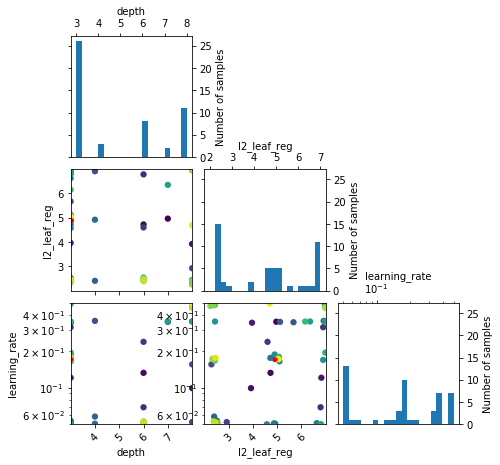

In [52]:
from skopt.plots import plot_evaluations

plot_evaluations(res_gprt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259F2C33160>,
      dtype=object)

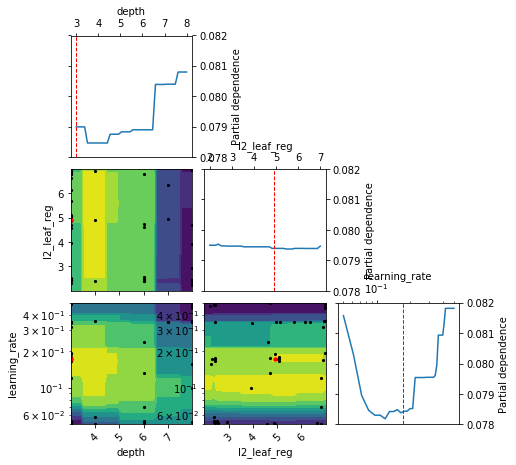

In [53]:
from skopt.plots import plot_objective 

plot_objective (res_gprt)

#### gb_minimize and objective: mean-abs-error

In [55]:
from skopt import gp_minimize 

res_gp_hedge_mean = gp_minimize(objective, space, n_calls=50, acq_func='gp_hedge', random_state=0)

"Best score=%.4f" % res_gp_hedge_mean.fun
# 10 calls, acq_func='gp_hedge' 'Best score=0.0771'
# 50 calls, acq_func='LCB' 'Best score=0.0767'

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The object

'Best score=0.0760'

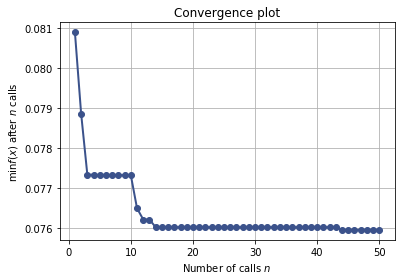

In [57]:
from skopt.plots import plot_convergence

plot_convergence(res_gp_hedge_mean)

In [56]:
print("""Best parameters: - depth=%d - l2_leaf_reg=%.6f - learning_rate=%.6f""" % (res_gp_hedge_mean.x[0], res_gp_hedge_mean.x[1], res_gp_hedge_mean.x[2]))
# 10 calls, acq_func='gp_hedge' Best parameters: - depth=5 - l2_leaf_reg=6.060844 - learning_rate=0.150990
# 50 calls, acq_func='LCB' Best parameters: - depth=3 - l2_leaf_reg=2.000000 - learning_rate=0.153405
# 50 calls, acq_func='gp_hedge' Best parameters: - depth=3 - l2_leaf_reg=2.012860 - learning_rate=0.176186

Best parameters: - depth=3 - l2_leaf_reg=2.097953 - learning_rate=0.053279


In [64]:
model = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.3, gpu_cat_features_storage='CpuPinnedMemory', grow_policy='SymmetricTree',iterations=10000, eval_metric='AUC', border_count=255, use_best_model=True, random_strength=2, learning_rate=0.053279, l2_leaf_reg=2.097953, depth=3)
model.fit(train_pool, eval_set=valid_pool)
eval_metrics = model.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)
# 10 calls AUC = 0.896598381, acq_func='gp_hedge'
# 50 calls AUC = 0.896908257, acq_func='LCB'
# 50 calls AUC = 0.8973696188, acq_func='gp_hedge'

0:	learn: 0.5897631	test: 0.5920482	best: 0.5920482 (0)	total: 23.8ms	remaining: 3m 58s
1:	learn: 0.6124899	test: 0.6111978	best: 0.6111978 (1)	total: 46.4ms	remaining: 3m 51s
2:	learn: 0.6507615	test: 0.6495632	best: 0.6495632 (2)	total: 68.9ms	remaining: 3m 49s
3:	learn: 0.6704430	test: 0.6696719	best: 0.6696719 (3)	total: 91.4ms	remaining: 3m 48s
4:	learn: 0.6719678	test: 0.6693255	best: 0.6696719 (3)	total: 114ms	remaining: 3m 47s
5:	learn: 0.6940494	test: 0.6909797	best: 0.6909797 (5)	total: 136ms	remaining: 3m 46s
6:	learn: 0.6958483	test: 0.6946759	best: 0.6946759 (6)	total: 158ms	remaining: 3m 45s
7:	learn: 0.6973915	test: 0.6947770	best: 0.6947770 (7)	total: 180ms	remaining: 3m 45s
8:	learn: 0.7002691	test: 0.6978805	best: 0.6978805 (8)	total: 202ms	remaining: 3m 44s
9:	learn: 0.6992680	test: 0.6969684	best: 0.6978805 (8)	total: 225ms	remaining: 3m 44s
10:	learn: 0.7038126	test: 0.7029814	best: 0.7029814 (10)	total: 248ms	remaining: 3m 45s
11:	learn: 0.7090271	test: 0.7074863	

99:	learn: 0.8012324	test: 0.7994968	best: 0.7994968 (99)	total: 2.33s	remaining: 3m 50s
100:	learn: 0.8015604	test: 0.7998137	best: 0.7998137 (100)	total: 2.38s	remaining: 3m 53s
101:	learn: 0.8024447	test: 0.8005120	best: 0.8005120 (101)	total: 2.41s	remaining: 3m 54s
102:	learn: 0.8032399	test: 0.8012814	best: 0.8012814 (102)	total: 2.44s	remaining: 3m 54s
103:	learn: 0.8040722	test: 0.8020608	best: 0.8020608 (103)	total: 2.47s	remaining: 3m 54s
104:	learn: 0.8042510	test: 0.8023132	best: 0.8023132 (104)	total: 2.49s	remaining: 3m 55s
105:	learn: 0.8052852	test: 0.8033036	best: 0.8033036 (105)	total: 2.52s	remaining: 3m 54s
106:	learn: 0.8055137	test: 0.8034263	best: 0.8034263 (106)	total: 2.54s	remaining: 3m 54s
107:	learn: 0.8060389	test: 0.8039052	best: 0.8039052 (107)	total: 2.56s	remaining: 3m 54s
108:	learn: 0.8063264	test: 0.8041904	best: 0.8041904 (108)	total: 2.59s	remaining: 3m 55s
109:	learn: 0.8075034	test: 0.8052494	best: 0.8052494 (109)	total: 2.62s	remaining: 3m 55s
1

191:	learn: 0.8358928	test: 0.8323659	best: 0.8323659 (191)	total: 4.58s	remaining: 3m 54s
192:	learn: 0.8360860	test: 0.8326666	best: 0.8326666 (192)	total: 4.61s	remaining: 3m 54s
193:	learn: 0.8361320	test: 0.8327407	best: 0.8327407 (193)	total: 4.63s	remaining: 3m 53s
194:	learn: 0.8364806	test: 0.8330279	best: 0.8330279 (194)	total: 4.65s	remaining: 3m 53s
195:	learn: 0.8367604	test: 0.8333558	best: 0.8333558 (195)	total: 4.67s	remaining: 3m 53s
196:	learn: 0.8370938	test: 0.8335575	best: 0.8335575 (196)	total: 4.7s	remaining: 3m 53s
197:	learn: 0.8373260	test: 0.8337621	best: 0.8337621 (197)	total: 4.72s	remaining: 3m 53s
198:	learn: 0.8376256	test: 0.8338609	best: 0.8338609 (198)	total: 4.74s	remaining: 3m 53s
199:	learn: 0.8376658	test: 0.8338521	best: 0.8338609 (198)	total: 4.76s	remaining: 3m 53s
200:	learn: 0.8377350	test: 0.8339962	best: 0.8339962 (200)	total: 4.79s	remaining: 3m 53s
201:	learn: 0.8380280	test: 0.8341559	best: 0.8341559 (201)	total: 4.81s	remaining: 3m 53s


282:	learn: 0.8527774	test: 0.8474869	best: 0.8474869 (282)	total: 6.69s	remaining: 3m 49s
283:	learn: 0.8529712	test: 0.8475817	best: 0.8475817 (283)	total: 6.71s	remaining: 3m 49s
284:	learn: 0.8532645	test: 0.8478184	best: 0.8478184 (284)	total: 6.74s	remaining: 3m 49s
285:	learn: 0.8534760	test: 0.8479637	best: 0.8479637 (285)	total: 6.76s	remaining: 3m 49s
286:	learn: 0.8536691	test: 0.8481969	best: 0.8481969 (286)	total: 6.79s	remaining: 3m 49s
287:	learn: 0.8538917	test: 0.8484021	best: 0.8484021 (287)	total: 6.82s	remaining: 3m 49s
288:	learn: 0.8539979	test: 0.8484839	best: 0.8484839 (288)	total: 6.84s	remaining: 3m 49s
289:	learn: 0.8541671	test: 0.8486913	best: 0.8486913 (289)	total: 6.87s	remaining: 3m 49s
290:	learn: 0.8542440	test: 0.8488136	best: 0.8488136 (290)	total: 6.89s	remaining: 3m 50s
291:	learn: 0.8543375	test: 0.8488998	best: 0.8488998 (291)	total: 6.92s	remaining: 3m 50s
292:	learn: 0.8545176	test: 0.8490389	best: 0.8490389 (292)	total: 6.94s	remaining: 3m 49s

378:	learn: 0.8658285	test: 0.8588704	best: 0.8588704 (378)	total: 8.98s	remaining: 3m 48s
379:	learn: 0.8658613	test: 0.8589236	best: 0.8589236 (379)	total: 9.01s	remaining: 3m 47s
380:	learn: 0.8659967	test: 0.8590169	best: 0.8590169 (380)	total: 9.03s	remaining: 3m 47s
381:	learn: 0.8661337	test: 0.8591540	best: 0.8591540 (381)	total: 9.05s	remaining: 3m 47s
382:	learn: 0.8662486	test: 0.8592276	best: 0.8592276 (382)	total: 9.07s	remaining: 3m 47s
383:	learn: 0.8663286	test: 0.8593492	best: 0.8593492 (383)	total: 9.1s	remaining: 3m 47s
384:	learn: 0.8663594	test: 0.8593912	best: 0.8593912 (384)	total: 9.12s	remaining: 3m 47s
385:	learn: 0.8664062	test: 0.8594174	best: 0.8594174 (385)	total: 9.14s	remaining: 3m 47s
386:	learn: 0.8665462	test: 0.8595369	best: 0.8595369 (386)	total: 9.16s	remaining: 3m 47s
387:	learn: 0.8665497	test: 0.8595420	best: 0.8595420 (387)	total: 9.19s	remaining: 3m 47s
388:	learn: 0.8666826	test: 0.8596904	best: 0.8596904 (388)	total: 9.21s	remaining: 3m 47s


476:	learn: 0.8755891	test: 0.8672478	best: 0.8672478 (476)	total: 11.3s	remaining: 3m 44s
477:	learn: 0.8757086	test: 0.8673081	best: 0.8673081 (477)	total: 11.3s	remaining: 3m 44s
478:	learn: 0.8757244	test: 0.8673366	best: 0.8673366 (478)	total: 11.3s	remaining: 3m 44s
479:	learn: 0.8757717	test: 0.8673840	best: 0.8673840 (479)	total: 11.3s	remaining: 3m 44s
480:	learn: 0.8758668	test: 0.8674973	best: 0.8674973 (480)	total: 11.4s	remaining: 3m 44s
481:	learn: 0.8759337	test: 0.8675695	best: 0.8675695 (481)	total: 11.4s	remaining: 3m 44s
482:	learn: 0.8759958	test: 0.8676113	best: 0.8676113 (482)	total: 11.4s	remaining: 3m 44s
483:	learn: 0.8760378	test: 0.8676780	best: 0.8676780 (483)	total: 11.4s	remaining: 3m 44s
484:	learn: 0.8760151	test: 0.8676404	best: 0.8676780 (483)	total: 11.4s	remaining: 3m 44s
485:	learn: 0.8761278	test: 0.8677499	best: 0.8677499 (485)	total: 11.5s	remaining: 3m 44s
486:	learn: 0.8762052	test: 0.8678301	best: 0.8678301 (486)	total: 11.5s	remaining: 3m 44s

573:	learn: 0.8819544	test: 0.8724544	best: 0.8724544 (573)	total: 13.5s	remaining: 3m 42s
574:	learn: 0.8819819	test: 0.8724824	best: 0.8724824 (574)	total: 13.6s	remaining: 3m 42s
575:	learn: 0.8820752	test: 0.8725749	best: 0.8725749 (575)	total: 13.6s	remaining: 3m 42s
576:	learn: 0.8821551	test: 0.8726410	best: 0.8726410 (576)	total: 13.6s	remaining: 3m 42s
577:	learn: 0.8822270	test: 0.8726651	best: 0.8726651 (577)	total: 13.6s	remaining: 3m 42s
578:	learn: 0.8823214	test: 0.8727252	best: 0.8727252 (578)	total: 13.7s	remaining: 3m 42s
579:	learn: 0.8823630	test: 0.8727435	best: 0.8727435 (579)	total: 13.7s	remaining: 3m 42s
580:	learn: 0.8824426	test: 0.8727955	best: 0.8727955 (580)	total: 13.7s	remaining: 3m 42s
581:	learn: 0.8824607	test: 0.8728220	best: 0.8728220 (581)	total: 13.7s	remaining: 3m 42s
582:	learn: 0.8825629	test: 0.8728866	best: 0.8728866 (582)	total: 13.7s	remaining: 3m 41s
583:	learn: 0.8825453	test: 0.8728714	best: 0.8728866 (582)	total: 13.8s	remaining: 3m 41s

670:	learn: 0.8875350	test: 0.8769412	best: 0.8769412 (670)	total: 15.8s	remaining: 3m 39s
671:	learn: 0.8876042	test: 0.8769995	best: 0.8769995 (671)	total: 15.8s	remaining: 3m 39s
672:	learn: 0.8876484	test: 0.8770295	best: 0.8770295 (672)	total: 15.9s	remaining: 3m 39s
673:	learn: 0.8877124	test: 0.8770860	best: 0.8770860 (673)	total: 15.9s	remaining: 3m 39s
674:	learn: 0.8877528	test: 0.8770785	best: 0.8770860 (673)	total: 15.9s	remaining: 3m 39s
675:	learn: 0.8878102	test: 0.8771228	best: 0.8771228 (675)	total: 15.9s	remaining: 3m 39s
676:	learn: 0.8878213	test: 0.8771314	best: 0.8771314 (676)	total: 16s	remaining: 3m 39s
677:	learn: 0.8878431	test: 0.8771778	best: 0.8771778 (677)	total: 16s	remaining: 3m 39s
678:	learn: 0.8878735	test: 0.8771996	best: 0.8771996 (678)	total: 16s	remaining: 3m 39s
679:	learn: 0.8879035	test: 0.8772124	best: 0.8772124 (679)	total: 16s	remaining: 3m 39s
680:	learn: 0.8879635	test: 0.8772302	best: 0.8772302 (680)	total: 16.1s	remaining: 3m 39s
681:	le

768:	learn: 0.8919927	test: 0.8803352	best: 0.8803352 (768)	total: 18.1s	remaining: 3m 37s
769:	learn: 0.8920354	test: 0.8803525	best: 0.8803525 (769)	total: 18.1s	remaining: 3m 37s
770:	learn: 0.8920393	test: 0.8803434	best: 0.8803525 (769)	total: 18.2s	remaining: 3m 37s
771:	learn: 0.8920508	test: 0.8803707	best: 0.8803707 (771)	total: 18.2s	remaining: 3m 37s
772:	learn: 0.8920745	test: 0.8803920	best: 0.8803920 (772)	total: 18.2s	remaining: 3m 37s
773:	learn: 0.8921141	test: 0.8804293	best: 0.8804293 (773)	total: 18.2s	remaining: 3m 37s
774:	learn: 0.8921409	test: 0.8804894	best: 0.8804894 (774)	total: 18.3s	remaining: 3m 37s
775:	learn: 0.8921858	test: 0.8805153	best: 0.8805153 (775)	total: 18.3s	remaining: 3m 37s
776:	learn: 0.8921928	test: 0.8805057	best: 0.8805153 (775)	total: 18.3s	remaining: 3m 37s
777:	learn: 0.8922851	test: 0.8805819	best: 0.8805819 (777)	total: 18.3s	remaining: 3m 37s
778:	learn: 0.8923200	test: 0.8806171	best: 0.8806171 (778)	total: 18.3s	remaining: 3m 37s

866:	learn: 0.8953359	test: 0.8828694	best: 0.8828694 (866)	total: 20.4s	remaining: 3m 35s
867:	learn: 0.8953637	test: 0.8828882	best: 0.8828882 (867)	total: 20.5s	remaining: 3m 35s
868:	learn: 0.8954157	test: 0.8829472	best: 0.8829472 (868)	total: 20.5s	remaining: 3m 35s
869:	learn: 0.8954571	test: 0.8829586	best: 0.8829586 (869)	total: 20.5s	remaining: 3m 35s
870:	learn: 0.8954847	test: 0.8829745	best: 0.8829745 (870)	total: 20.5s	remaining: 3m 35s
871:	learn: 0.8955382	test: 0.8829932	best: 0.8829932 (871)	total: 20.5s	remaining: 3m 35s
872:	learn: 0.8955617	test: 0.8830066	best: 0.8830066 (872)	total: 20.6s	remaining: 3m 35s
873:	learn: 0.8955913	test: 0.8830460	best: 0.8830460 (873)	total: 20.6s	remaining: 3m 34s
874:	learn: 0.8956271	test: 0.8831071	best: 0.8831071 (874)	total: 20.6s	remaining: 3m 34s
875:	learn: 0.8956849	test: 0.8831500	best: 0.8831500 (875)	total: 20.6s	remaining: 3m 34s
876:	learn: 0.8957083	test: 0.8831701	best: 0.8831701 (876)	total: 20.7s	remaining: 3m 34s

958:	learn: 0.8982940	test: 0.8850040	best: 0.8850043 (957)	total: 22.5s	remaining: 3m 32s
959:	learn: 0.8982923	test: 0.8849994	best: 0.8850043 (957)	total: 22.6s	remaining: 3m 32s
960:	learn: 0.8983231	test: 0.8850279	best: 0.8850279 (960)	total: 22.6s	remaining: 3m 32s
961:	learn: 0.8983434	test: 0.8850381	best: 0.8850381 (961)	total: 22.6s	remaining: 3m 32s
962:	learn: 0.8983731	test: 0.8850585	best: 0.8850585 (962)	total: 22.6s	remaining: 3m 32s
963:	learn: 0.8984209	test: 0.8850985	best: 0.8850985 (963)	total: 22.7s	remaining: 3m 32s
964:	learn: 0.8984296	test: 0.8850857	best: 0.8850985 (963)	total: 22.7s	remaining: 3m 32s
965:	learn: 0.8984497	test: 0.8850918	best: 0.8850985 (963)	total: 22.7s	remaining: 3m 32s
966:	learn: 0.8984941	test: 0.8851235	best: 0.8851235 (966)	total: 22.7s	remaining: 3m 32s
967:	learn: 0.8985472	test: 0.8851606	best: 0.8851606 (967)	total: 22.8s	remaining: 3m 32s
968:	learn: 0.8985559	test: 0.8851535	best: 0.8851606 (967)	total: 22.8s	remaining: 3m 32s

1053:	learn: 0.9008465	test: 0.8868390	best: 0.8868566 (1051)	total: 24.8s	remaining: 3m 30s
1054:	learn: 0.9008594	test: 0.8868725	best: 0.8868725 (1054)	total: 24.8s	remaining: 3m 30s
1055:	learn: 0.9008832	test: 0.8868846	best: 0.8868846 (1055)	total: 24.9s	remaining: 3m 30s
1056:	learn: 0.9008868	test: 0.8868749	best: 0.8868846 (1055)	total: 24.9s	remaining: 3m 30s
1057:	learn: 0.9009078	test: 0.8868907	best: 0.8868907 (1057)	total: 24.9s	remaining: 3m 30s
1058:	learn: 0.9009470	test: 0.8869088	best: 0.8869088 (1058)	total: 24.9s	remaining: 3m 30s
1059:	learn: 0.9009770	test: 0.8869348	best: 0.8869348 (1059)	total: 24.9s	remaining: 3m 30s
1060:	learn: 0.9009959	test: 0.8869531	best: 0.8869531 (1060)	total: 25s	remaining: 3m 30s
1061:	learn: 0.9010233	test: 0.8869706	best: 0.8869706 (1061)	total: 25s	remaining: 3m 30s
1062:	learn: 0.9010564	test: 0.8870032	best: 0.8870032 (1062)	total: 25s	remaining: 3m 30s
1063:	learn: 0.9010828	test: 0.8870203	best: 0.8870203 (1063)	total: 25s	rem

1149:	learn: 0.9030840	test: 0.8884405	best: 0.8884405 (1149)	total: 27.1s	remaining: 3m 28s
1150:	learn: 0.9030964	test: 0.8884590	best: 0.8884590 (1150)	total: 27.1s	remaining: 3m 28s
1151:	learn: 0.9031416	test: 0.8884901	best: 0.8884901 (1151)	total: 27.1s	remaining: 3m 28s
1152:	learn: 0.9031368	test: 0.8884937	best: 0.8884937 (1152)	total: 27.2s	remaining: 3m 28s
1153:	learn: 0.9031508	test: 0.8885038	best: 0.8885038 (1153)	total: 27.2s	remaining: 3m 28s
1154:	learn: 0.9031708	test: 0.8885214	best: 0.8885214 (1154)	total: 27.2s	remaining: 3m 28s
1155:	learn: 0.9031897	test: 0.8885526	best: 0.8885526 (1155)	total: 27.2s	remaining: 3m 28s
1156:	learn: 0.9032074	test: 0.8885947	best: 0.8885947 (1156)	total: 27.3s	remaining: 3m 28s
1157:	learn: 0.9032345	test: 0.8886104	best: 0.8886104 (1157)	total: 27.3s	remaining: 3m 28s
1158:	learn: 0.9032515	test: 0.8886344	best: 0.8886344 (1158)	total: 27.3s	remaining: 3m 28s
1159:	learn: 0.9032926	test: 0.8886543	best: 0.8886543 (1159)	total: 2

1239:	learn: 0.9052359	test: 0.8898239	best: 0.8898239 (1239)	total: 29.2s	remaining: 3m 26s
1240:	learn: 0.9052566	test: 0.8898203	best: 0.8898239 (1239)	total: 29.2s	remaining: 3m 26s
1241:	learn: 0.9052794	test: 0.8897954	best: 0.8898239 (1239)	total: 29.2s	remaining: 3m 25s
1242:	learn: 0.9052847	test: 0.8898052	best: 0.8898239 (1239)	total: 29.2s	remaining: 3m 25s
1243:	learn: 0.9053043	test: 0.8898357	best: 0.8898357 (1243)	total: 29.3s	remaining: 3m 25s
1244:	learn: 0.9053112	test: 0.8898370	best: 0.8898370 (1244)	total: 29.3s	remaining: 3m 25s
1245:	learn: 0.9053213	test: 0.8898431	best: 0.8898431 (1245)	total: 29.3s	remaining: 3m 25s
1246:	learn: 0.9053483	test: 0.8898521	best: 0.8898521 (1246)	total: 29.3s	remaining: 3m 25s
1247:	learn: 0.9053772	test: 0.8898500	best: 0.8898521 (1246)	total: 29.4s	remaining: 3m 25s
1248:	learn: 0.9053979	test: 0.8898567	best: 0.8898567 (1248)	total: 29.4s	remaining: 3m 25s
1249:	learn: 0.9054312	test: 0.8898758	best: 0.8898758 (1249)	total: 2

1335:	learn: 0.9071111	test: 0.8909500	best: 0.8909500 (1335)	total: 31.5s	remaining: 3m 24s
1336:	learn: 0.9071402	test: 0.8909577	best: 0.8909577 (1336)	total: 31.5s	remaining: 3m 24s
1337:	learn: 0.9071561	test: 0.8909730	best: 0.8909730 (1337)	total: 31.5s	remaining: 3m 23s
1338:	learn: 0.9071654	test: 0.8909762	best: 0.8909762 (1338)	total: 31.5s	remaining: 3m 23s
1339:	learn: 0.9071945	test: 0.8909823	best: 0.8909823 (1339)	total: 31.6s	remaining: 3m 23s
1340:	learn: 0.9072126	test: 0.8909971	best: 0.8909971 (1340)	total: 31.6s	remaining: 3m 23s
1341:	learn: 0.9072258	test: 0.8910275	best: 0.8910275 (1341)	total: 31.6s	remaining: 3m 23s
1342:	learn: 0.9072380	test: 0.8910240	best: 0.8910275 (1341)	total: 31.6s	remaining: 3m 23s
1343:	learn: 0.9072616	test: 0.8910380	best: 0.8910380 (1343)	total: 31.6s	remaining: 3m 23s
1344:	learn: 0.9072782	test: 0.8910350	best: 0.8910380 (1343)	total: 31.7s	remaining: 3m 23s
1345:	learn: 0.9073075	test: 0.8910412	best: 0.8910412 (1345)	total: 3

1424:	learn: 0.9086936	test: 0.8918114	best: 0.8918114 (1424)	total: 33.6s	remaining: 3m 21s
1425:	learn: 0.9087221	test: 0.8918475	best: 0.8918475 (1425)	total: 33.6s	remaining: 3m 21s
1426:	learn: 0.9087441	test: 0.8918709	best: 0.8918709 (1426)	total: 33.6s	remaining: 3m 21s
1427:	learn: 0.9087591	test: 0.8918921	best: 0.8918921 (1427)	total: 33.6s	remaining: 3m 21s
1428:	learn: 0.9087722	test: 0.8918945	best: 0.8918945 (1428)	total: 33.7s	remaining: 3m 21s
1429:	learn: 0.9087897	test: 0.8919041	best: 0.8919041 (1429)	total: 33.7s	remaining: 3m 21s
1430:	learn: 0.9088123	test: 0.8919313	best: 0.8919313 (1430)	total: 33.7s	remaining: 3m 21s
1431:	learn: 0.9088262	test: 0.8919300	best: 0.8919313 (1430)	total: 33.7s	remaining: 3m 21s
1432:	learn: 0.9088402	test: 0.8919314	best: 0.8919314 (1432)	total: 33.7s	remaining: 3m 21s
1433:	learn: 0.9088543	test: 0.8919333	best: 0.8919333 (1433)	total: 33.8s	remaining: 3m 21s
1434:	learn: 0.9088744	test: 0.8919445	best: 0.8919445 (1434)	total: 3

1520:	learn: 0.9103041	test: 0.8927469	best: 0.8927469 (1520)	total: 35.8s	remaining: 3m 19s
1521:	learn: 0.9103352	test: 0.8927500	best: 0.8927500 (1521)	total: 35.8s	remaining: 3m 19s
1522:	learn: 0.9103572	test: 0.8927532	best: 0.8927532 (1522)	total: 35.9s	remaining: 3m 19s
1523:	learn: 0.9103749	test: 0.8927630	best: 0.8927630 (1523)	total: 35.9s	remaining: 3m 19s
1524:	learn: 0.9103834	test: 0.8927619	best: 0.8927630 (1523)	total: 35.9s	remaining: 3m 19s
1525:	learn: 0.9103947	test: 0.8927718	best: 0.8927718 (1525)	total: 35.9s	remaining: 3m 19s
1526:	learn: 0.9104123	test: 0.8927806	best: 0.8927806 (1526)	total: 36s	remaining: 3m 19s
1527:	learn: 0.9104174	test: 0.8927756	best: 0.8927806 (1526)	total: 36s	remaining: 3m 19s
1528:	learn: 0.9104239	test: 0.8927690	best: 0.8927806 (1526)	total: 36s	remaining: 3m 19s
1529:	learn: 0.9104415	test: 0.8927734	best: 0.8927806 (1526)	total: 36s	remaining: 3m 19s
1530:	learn: 0.9104490	test: 0.8927881	best: 0.8927881 (1530)	total: 36s	remai

1616:	learn: 0.9117870	test: 0.8933617	best: 0.8933617 (1616)	total: 38.1s	remaining: 3m 17s
1617:	learn: 0.9118117	test: 0.8933891	best: 0.8933891 (1617)	total: 38.1s	remaining: 3m 17s
1618:	learn: 0.9118220	test: 0.8934100	best: 0.8934100 (1618)	total: 38.2s	remaining: 3m 17s
1619:	learn: 0.9118313	test: 0.8934155	best: 0.8934155 (1619)	total: 38.2s	remaining: 3m 17s
1620:	learn: 0.9118582	test: 0.8934348	best: 0.8934348 (1620)	total: 38.2s	remaining: 3m 17s
1621:	learn: 0.9118711	test: 0.8934344	best: 0.8934348 (1620)	total: 38.2s	remaining: 3m 17s
1622:	learn: 0.9118884	test: 0.8934349	best: 0.8934349 (1622)	total: 38.3s	remaining: 3m 17s
1623:	learn: 0.9119080	test: 0.8934438	best: 0.8934438 (1623)	total: 38.3s	remaining: 3m 17s
1624:	learn: 0.9119221	test: 0.8934591	best: 0.8934591 (1624)	total: 38.3s	remaining: 3m 17s
1625:	learn: 0.9119357	test: 0.8934866	best: 0.8934866 (1625)	total: 38.3s	remaining: 3m 17s
1626:	learn: 0.9119593	test: 0.8934885	best: 0.8934885 (1626)	total: 3

1712:	learn: 0.9131058	test: 0.8940410	best: 0.8940410 (1712)	total: 40.4s	remaining: 3m 15s
1713:	learn: 0.9131294	test: 0.8940401	best: 0.8940410 (1712)	total: 40.4s	remaining: 3m 15s
1714:	learn: 0.9131417	test: 0.8940331	best: 0.8940410 (1712)	total: 40.4s	remaining: 3m 15s
1715:	learn: 0.9131639	test: 0.8940620	best: 0.8940620 (1715)	total: 40.5s	remaining: 3m 15s
1716:	learn: 0.9131707	test: 0.8940688	best: 0.8940688 (1716)	total: 40.5s	remaining: 3m 15s
1717:	learn: 0.9131781	test: 0.8940653	best: 0.8940688 (1716)	total: 40.5s	remaining: 3m 15s
1718:	learn: 0.9131892	test: 0.8940722	best: 0.8940722 (1718)	total: 40.5s	remaining: 3m 15s
1719:	learn: 0.9131961	test: 0.8940809	best: 0.8940809 (1719)	total: 40.5s	remaining: 3m 15s
1720:	learn: 0.9132018	test: 0.8940724	best: 0.8940809 (1719)	total: 40.6s	remaining: 3m 15s
1721:	learn: 0.9132181	test: 0.8940945	best: 0.8940945 (1721)	total: 40.6s	remaining: 3m 15s
1722:	learn: 0.9132434	test: 0.8940969	best: 0.8940969 (1722)	total: 4

1804:	learn: 0.9144326	test: 0.8947272	best: 0.8947272 (1804)	total: 42.5s	remaining: 3m 12s
1805:	learn: 0.9144463	test: 0.8947420	best: 0.8947420 (1805)	total: 42.5s	remaining: 3m 12s
1806:	learn: 0.9144651	test: 0.8947481	best: 0.8947481 (1806)	total: 42.5s	remaining: 3m 12s
1807:	learn: 0.9144849	test: 0.8947596	best: 0.8947596 (1807)	total: 42.5s	remaining: 3m 12s
1808:	learn: 0.9144925	test: 0.8947563	best: 0.8947596 (1807)	total: 42.6s	remaining: 3m 12s
1809:	learn: 0.9145074	test: 0.8947571	best: 0.8947596 (1807)	total: 42.6s	remaining: 3m 12s
1810:	learn: 0.9145270	test: 0.8947768	best: 0.8947768 (1810)	total: 42.6s	remaining: 3m 12s
1811:	learn: 0.9145389	test: 0.8947796	best: 0.8947796 (1811)	total: 42.6s	remaining: 3m 12s
1812:	learn: 0.9145548	test: 0.8948109	best: 0.8948109 (1812)	total: 42.7s	remaining: 3m 12s
1813:	learn: 0.9145766	test: 0.8948138	best: 0.8948138 (1813)	total: 42.7s	remaining: 3m 12s
1814:	learn: 0.9145931	test: 0.8948190	best: 0.8948190 (1814)	total: 4

1894:	learn: 0.9157752	test: 0.8954304	best: 0.8954304 (1894)	total: 44.6s	remaining: 3m 10s
1895:	learn: 0.9157933	test: 0.8954391	best: 0.8954391 (1895)	total: 44.6s	remaining: 3m 10s
1896:	learn: 0.9158035	test: 0.8954468	best: 0.8954468 (1896)	total: 44.6s	remaining: 3m 10s
1897:	learn: 0.9158136	test: 0.8954523	best: 0.8954523 (1897)	total: 44.6s	remaining: 3m 10s
1898:	learn: 0.9158236	test: 0.8954543	best: 0.8954543 (1898)	total: 44.6s	remaining: 3m 10s
1899:	learn: 0.9158406	test: 0.8954637	best: 0.8954637 (1899)	total: 44.7s	remaining: 3m 10s
1900:	learn: 0.9158517	test: 0.8954818	best: 0.8954818 (1900)	total: 44.7s	remaining: 3m 10s
1901:	learn: 0.9158638	test: 0.8954962	best: 0.8954962 (1901)	total: 44.7s	remaining: 3m 10s
1902:	learn: 0.9158772	test: 0.8955099	best: 0.8955099 (1902)	total: 44.7s	remaining: 3m 10s
1903:	learn: 0.9158797	test: 0.8955108	best: 0.8955108 (1903)	total: 44.8s	remaining: 3m 10s
1904:	learn: 0.9158808	test: 0.8955061	best: 0.8955108 (1903)	total: 4

1989:	learn: 0.9169204	test: 0.8958697	best: 0.8958837 (1987)	total: 46.8s	remaining: 3m 8s
1990:	learn: 0.9169285	test: 0.8958918	best: 0.8958918 (1990)	total: 46.8s	remaining: 3m 8s
1991:	learn: 0.9169430	test: 0.8958983	best: 0.8958983 (1991)	total: 46.9s	remaining: 3m 8s
1992:	learn: 0.9169565	test: 0.8959090	best: 0.8959090 (1992)	total: 46.9s	remaining: 3m 8s
1993:	learn: 0.9169629	test: 0.8959085	best: 0.8959090 (1992)	total: 46.9s	remaining: 3m 8s
1994:	learn: 0.9169766	test: 0.8959103	best: 0.8959103 (1994)	total: 46.9s	remaining: 3m 8s
1995:	learn: 0.9169832	test: 0.8959123	best: 0.8959123 (1995)	total: 47s	remaining: 3m 8s
1996:	learn: 0.9169914	test: 0.8959132	best: 0.8959132 (1996)	total: 47s	remaining: 3m 8s
1997:	learn: 0.9170015	test: 0.8959225	best: 0.8959225 (1997)	total: 47s	remaining: 3m 8s
1998:	learn: 0.9170081	test: 0.8959186	best: 0.8959225 (1997)	total: 47s	remaining: 3m 8s
1999:	learn: 0.9170250	test: 0.8959289	best: 0.8959289 (1999)	total: 47.1s	remaining: 3m

2085:	learn: 0.9179961	test: 0.8962171	best: 0.8962171 (2085)	total: 49.1s	remaining: 3m 6s
2086:	learn: 0.9180099	test: 0.8962166	best: 0.8962171 (2085)	total: 49.1s	remaining: 3m 6s
2087:	learn: 0.9180256	test: 0.8962282	best: 0.8962282 (2087)	total: 49.1s	remaining: 3m 6s
2088:	learn: 0.9180338	test: 0.8962336	best: 0.8962336 (2088)	total: 49.1s	remaining: 3m 6s
2089:	learn: 0.9180433	test: 0.8962364	best: 0.8962364 (2089)	total: 49.1s	remaining: 3m 6s
2090:	learn: 0.9180517	test: 0.8962400	best: 0.8962400 (2090)	total: 49.2s	remaining: 3m 5s
2091:	learn: 0.9180651	test: 0.8962376	best: 0.8962400 (2090)	total: 49.2s	remaining: 3m 5s
2092:	learn: 0.9180750	test: 0.8962370	best: 0.8962400 (2090)	total: 49.2s	remaining: 3m 5s
2093:	learn: 0.9180942	test: 0.8962570	best: 0.8962570 (2093)	total: 49.2s	remaining: 3m 5s
2094:	learn: 0.9181153	test: 0.8962659	best: 0.8962659 (2094)	total: 49.3s	remaining: 3m 5s
2095:	learn: 0.9181283	test: 0.8962709	best: 0.8962709 (2095)	total: 49.3s	remai

2176:	learn: 0.9189853	test: 0.8964648	best: 0.8964747 (2173)	total: 51.2s	remaining: 3m 3s
2177:	learn: 0.9190022	test: 0.8964700	best: 0.8964747 (2173)	total: 51.2s	remaining: 3m 3s
2178:	learn: 0.9190134	test: 0.8964664	best: 0.8964747 (2173)	total: 51.2s	remaining: 3m 3s
2179:	learn: 0.9190256	test: 0.8964721	best: 0.8964747 (2173)	total: 51.2s	remaining: 3m 3s
2180:	learn: 0.9190332	test: 0.8964786	best: 0.8964786 (2180)	total: 51.2s	remaining: 3m 3s
2181:	learn: 0.9190324	test: 0.8964788	best: 0.8964788 (2181)	total: 51.3s	remaining: 3m 3s
2182:	learn: 0.9190442	test: 0.8964770	best: 0.8964788 (2181)	total: 51.3s	remaining: 3m 3s
2183:	learn: 0.9190519	test: 0.8964811	best: 0.8964811 (2183)	total: 51.3s	remaining: 3m 3s
2184:	learn: 0.9190585	test: 0.8964794	best: 0.8964811 (2183)	total: 51.3s	remaining: 3m 3s
2185:	learn: 0.9190787	test: 0.8964875	best: 0.8964875 (2185)	total: 51.4s	remaining: 3m 3s
2186:	learn: 0.9190951	test: 0.8965067	best: 0.8965067 (2186)	total: 51.4s	remai

2266:	learn: 0.9199376	test: 0.8967898	best: 0.8967910 (2265)	total: 53.2s	remaining: 3m 1s
2267:	learn: 0.9199517	test: 0.8967976	best: 0.8967976 (2267)	total: 53.3s	remaining: 3m 1s
2268:	learn: 0.9199699	test: 0.8968052	best: 0.8968052 (2268)	total: 53.3s	remaining: 3m 1s
2269:	learn: 0.9199752	test: 0.8968016	best: 0.8968052 (2268)	total: 53.3s	remaining: 3m 1s
2270:	learn: 0.9199911	test: 0.8968176	best: 0.8968176 (2270)	total: 53.3s	remaining: 3m 1s
2271:	learn: 0.9199993	test: 0.8968109	best: 0.8968176 (2270)	total: 53.3s	remaining: 3m 1s
2272:	learn: 0.9200119	test: 0.8968224	best: 0.8968224 (2272)	total: 53.4s	remaining: 3m 1s
2273:	learn: 0.9200189	test: 0.8968170	best: 0.8968224 (2272)	total: 53.4s	remaining: 3m 1s
2274:	learn: 0.9200259	test: 0.8968195	best: 0.8968224 (2272)	total: 53.4s	remaining: 3m 1s
2275:	learn: 0.9200415	test: 0.8968232	best: 0.8968232 (2275)	total: 53.4s	remaining: 3m 1s
2276:	learn: 0.9200426	test: 0.8968161	best: 0.8968232 (2275)	total: 53.5s	remai

2362:	learn: 0.9208952	test: 0.8970446	best: 0.8970446 (2362)	total: 55.5s	remaining: 2m 59s
2363:	learn: 0.9209064	test: 0.8970465	best: 0.8970465 (2363)	total: 55.5s	remaining: 2m 59s
2364:	learn: 0.9209222	test: 0.8970429	best: 0.8970465 (2363)	total: 55.6s	remaining: 2m 59s
2365:	learn: 0.9209341	test: 0.8970369	best: 0.8970465 (2363)	total: 55.6s	remaining: 2m 59s
2366:	learn: 0.9209432	test: 0.8970518	best: 0.8970518 (2366)	total: 55.6s	remaining: 2m 59s
2367:	learn: 0.9209477	test: 0.8970586	best: 0.8970586 (2367)	total: 55.6s	remaining: 2m 59s
2368:	learn: 0.9209527	test: 0.8970720	best: 0.8970720 (2368)	total: 55.7s	remaining: 2m 59s
2369:	learn: 0.9209599	test: 0.8970747	best: 0.8970747 (2369)	total: 55.7s	remaining: 2m 59s
2370:	learn: 0.9209710	test: 0.8970820	best: 0.8970820 (2370)	total: 55.7s	remaining: 2m 59s
2371:	learn: 0.9209830	test: 0.8970760	best: 0.8970820 (2370)	total: 55.7s	remaining: 2m 59s
2372:	learn: 0.9209912	test: 0.8970764	best: 0.8970820 (2370)	total: 5

2454:	learn: 0.9218270	test: 0.8972576	best: 0.8972576 (2454)	total: 57.7s	remaining: 2m 57s
2455:	learn: 0.9218384	test: 0.8972537	best: 0.8972576 (2454)	total: 57.7s	remaining: 2m 57s
2456:	learn: 0.9218496	test: 0.8972532	best: 0.8972576 (2454)	total: 57.7s	remaining: 2m 57s
2457:	learn: 0.9218567	test: 0.8972539	best: 0.8972576 (2454)	total: 57.7s	remaining: 2m 57s
2458:	learn: 0.9218610	test: 0.8972563	best: 0.8972576 (2454)	total: 57.7s	remaining: 2m 57s
2459:	learn: 0.9218731	test: 0.8972728	best: 0.8972728 (2459)	total: 57.8s	remaining: 2m 57s
2460:	learn: 0.9218826	test: 0.8972684	best: 0.8972728 (2459)	total: 57.8s	remaining: 2m 57s
2461:	learn: 0.9218866	test: 0.8972766	best: 0.8972766 (2461)	total: 57.8s	remaining: 2m 57s
2462:	learn: 0.9218960	test: 0.8972706	best: 0.8972766 (2461)	total: 57.8s	remaining: 2m 56s
2463:	learn: 0.9219083	test: 0.8972758	best: 0.8972766 (2461)	total: 57.9s	remaining: 2m 56s
2464:	learn: 0.9219126	test: 0.8972805	best: 0.8972805 (2464)	total: 5

2550:	learn: 0.9227138	test: 0.8974226	best: 0.8974226 (2550)	total: 59.9s	remaining: 2m 54s
2551:	learn: 0.9227216	test: 0.8974252	best: 0.8974252 (2551)	total: 59.9s	remaining: 2m 54s
2552:	learn: 0.9227411	test: 0.8974246	best: 0.8974252 (2551)	total: 60s	remaining: 2m 54s
2553:	learn: 0.9227530	test: 0.8974261	best: 0.8974261 (2553)	total: 60s	remaining: 2m 54s
2554:	learn: 0.9227626	test: 0.8974288	best: 0.8974288 (2554)	total: 1m	remaining: 2m 54s
2555:	learn: 0.9227726	test: 0.8974349	best: 0.8974349 (2555)	total: 1m	remaining: 2m 54s
2556:	learn: 0.9227845	test: 0.8974373	best: 0.8974373 (2556)	total: 1m	remaining: 2m 54s
2557:	learn: 0.9227919	test: 0.8974274	best: 0.8974373 (2556)	total: 1m	remaining: 2m 54s
2558:	learn: 0.9227988	test: 0.8974354	best: 0.8974373 (2556)	total: 1m	remaining: 2m 54s
2559:	learn: 0.9228137	test: 0.8974440	best: 0.8974440 (2559)	total: 1m	remaining: 2m 54s
2560:	learn: 0.9228231	test: 0.8974427	best: 0.8974440 (2559)	total: 1m	remaining: 2m 54s
25

2646:	learn: 0.9236292	test: 0.8976470	best: 0.8976656 (2636)	total: 1m 2s	remaining: 2m 52s
2647:	learn: 0.9236406	test: 0.8976533	best: 0.8976656 (2636)	total: 1m 2s	remaining: 2m 52s
2648:	learn: 0.9236490	test: 0.8976580	best: 0.8976656 (2636)	total: 1m 2s	remaining: 2m 52s
2649:	learn: 0.9236575	test: 0.8976662	best: 0.8976662 (2649)	total: 1m 2s	remaining: 2m 52s
2650:	learn: 0.9236655	test: 0.8976674	best: 0.8976674 (2650)	total: 1m 2s	remaining: 2m 52s
2651:	learn: 0.9236720	test: 0.8976656	best: 0.8976674 (2650)	total: 1m 2s	remaining: 2m 52s
2652:	learn: 0.9236770	test: 0.8976658	best: 0.8976674 (2650)	total: 1m 2s	remaining: 2m 52s
2653:	learn: 0.9236904	test: 0.8976702	best: 0.8976702 (2653)	total: 1m 2s	remaining: 2m 52s
2654:	learn: 0.9236963	test: 0.8976747	best: 0.8976747 (2654)	total: 1m 2s	remaining: 2m 52s
2655:	learn: 0.9237067	test: 0.8976785	best: 0.8976785 (2655)	total: 1m 2s	remaining: 2m 52s
2656:	learn: 0.9237173	test: 0.8976873	best: 0.8976873 (2656)	total: 1

2739:	learn: 0.9244634	test: 0.8979200	best: 0.8979200 (2739)	total: 1m 4s	remaining: 2m 50s
2740:	learn: 0.9244688	test: 0.8979235	best: 0.8979235 (2740)	total: 1m 4s	remaining: 2m 50s
2741:	learn: 0.9244747	test: 0.8979270	best: 0.8979270 (2741)	total: 1m 4s	remaining: 2m 50s
2742:	learn: 0.9244868	test: 0.8979284	best: 0.8979284 (2742)	total: 1m 4s	remaining: 2m 50s
2743:	learn: 0.9244994	test: 0.8979272	best: 0.8979284 (2742)	total: 1m 4s	remaining: 2m 50s
2744:	learn: 0.9245060	test: 0.8979201	best: 0.8979284 (2742)	total: 1m 4s	remaining: 2m 50s
2745:	learn: 0.9245104	test: 0.8979284	best: 0.8979284 (2742)	total: 1m 4s	remaining: 2m 50s
2746:	learn: 0.9245211	test: 0.8979402	best: 0.8979402 (2746)	total: 1m 4s	remaining: 2m 50s
2747:	learn: 0.9245381	test: 0.8979547	best: 0.8979547 (2747)	total: 1m 4s	remaining: 2m 50s
2748:	learn: 0.9245454	test: 0.8979552	best: 0.8979552 (2748)	total: 1m 4s	remaining: 2m 50s
2749:	learn: 0.9245570	test: 0.8979599	best: 0.8979599 (2749)	total: 1

2829:	learn: 0.9252922	test: 0.8980842	best: 0.8980985 (2827)	total: 1m 6s	remaining: 2m 48s
2830:	learn: 0.9252984	test: 0.8980925	best: 0.8980985 (2827)	total: 1m 6s	remaining: 2m 48s
2831:	learn: 0.9253099	test: 0.8980828	best: 0.8980985 (2827)	total: 1m 6s	remaining: 2m 48s
2832:	learn: 0.9253196	test: 0.8980933	best: 0.8980985 (2827)	total: 1m 6s	remaining: 2m 48s
2833:	learn: 0.9253354	test: 0.8980880	best: 0.8980985 (2827)	total: 1m 6s	remaining: 2m 48s
2834:	learn: 0.9253496	test: 0.8980957	best: 0.8980985 (2827)	total: 1m 6s	remaining: 2m 48s
2835:	learn: 0.9253541	test: 0.8980964	best: 0.8980985 (2827)	total: 1m 6s	remaining: 2m 48s
2836:	learn: 0.9253584	test: 0.8980992	best: 0.8980992 (2836)	total: 1m 6s	remaining: 2m 48s
2837:	learn: 0.9253708	test: 0.8981057	best: 0.8981057 (2837)	total: 1m 6s	remaining: 2m 48s
2838:	learn: 0.9253775	test: 0.8981031	best: 0.8981057 (2837)	total: 1m 6s	remaining: 2m 48s
2839:	learn: 0.9253849	test: 0.8981110	best: 0.8981110 (2839)	total: 1

2919:	learn: 0.9260856	test: 0.8982262	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2920:	learn: 0.9260948	test: 0.8982325	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2921:	learn: 0.9260987	test: 0.8982345	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2922:	learn: 0.9261067	test: 0.8982281	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2923:	learn: 0.9261170	test: 0.8982185	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2924:	learn: 0.9261263	test: 0.8982207	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2925:	learn: 0.9261354	test: 0.8982173	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2926:	learn: 0.9261475	test: 0.8982206	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2927:	learn: 0.9261577	test: 0.8982189	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2928:	learn: 0.9261669	test: 0.8982193	best: 0.8982441 (2907)	total: 1m 8s	remaining: 2m 46s
2929:	learn: 0.9261710	test: 0.8982163	best: 0.8982441 (2907)	total: 1

3009:	learn: 0.9268459	test: 0.8983227	best: 0.8983227 (3009)	total: 1m 10s	remaining: 2m 44s
3010:	learn: 0.9268569	test: 0.8983194	best: 0.8983227 (3009)	total: 1m 10s	remaining: 2m 44s
3011:	learn: 0.9268669	test: 0.8983245	best: 0.8983245 (3011)	total: 1m 10s	remaining: 2m 44s
3012:	learn: 0.9268778	test: 0.8983281	best: 0.8983281 (3012)	total: 1m 10s	remaining: 2m 44s
3013:	learn: 0.9268947	test: 0.8983404	best: 0.8983404 (3013)	total: 1m 10s	remaining: 2m 44s
3014:	learn: 0.9269046	test: 0.8983431	best: 0.8983431 (3014)	total: 1m 10s	remaining: 2m 44s
3015:	learn: 0.9269158	test: 0.8983412	best: 0.8983431 (3014)	total: 1m 10s	remaining: 2m 44s
3016:	learn: 0.9269187	test: 0.8983392	best: 0.8983431 (3014)	total: 1m 10s	remaining: 2m 44s
3017:	learn: 0.9269252	test: 0.8983463	best: 0.8983463 (3017)	total: 1m 10s	remaining: 2m 44s
3018:	learn: 0.9269322	test: 0.8983424	best: 0.8983463 (3017)	total: 1m 10s	remaining: 2m 44s
3019:	learn: 0.9269385	test: 0.8983397	best: 0.8983463 (3017

3100:	learn: 0.9276463	test: 0.8984060	best: 0.8984283 (3077)	total: 1m 12s	remaining: 2m 42s
3101:	learn: 0.9276580	test: 0.8984022	best: 0.8984283 (3077)	total: 1m 12s	remaining: 2m 42s
3102:	learn: 0.9276705	test: 0.8984011	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3103:	learn: 0.9276828	test: 0.8984055	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3104:	learn: 0.9276872	test: 0.8984001	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3105:	learn: 0.9276904	test: 0.8983979	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3106:	learn: 0.9277049	test: 0.8984009	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3107:	learn: 0.9277105	test: 0.8984022	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3108:	learn: 0.9277213	test: 0.8984070	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3109:	learn: 0.9277291	test: 0.8984135	best: 0.8984283 (3077)	total: 1m 13s	remaining: 2m 42s
3110:	learn: 0.9277421	test: 0.8984129	best: 0.8984283 (3077

3190:	learn: 0.9283690	test: 0.8984965	best: 0.8985002 (3188)	total: 1m 15s	remaining: 2m 40s
3191:	learn: 0.9283781	test: 0.8985092	best: 0.8985092 (3191)	total: 1m 15s	remaining: 2m 40s
3192:	learn: 0.9283859	test: 0.8985121	best: 0.8985121 (3192)	total: 1m 15s	remaining: 2m 40s
3193:	learn: 0.9283909	test: 0.8985125	best: 0.8985125 (3193)	total: 1m 15s	remaining: 2m 40s
3194:	learn: 0.9284002	test: 0.8985153	best: 0.8985153 (3194)	total: 1m 15s	remaining: 2m 40s
3195:	learn: 0.9284100	test: 0.8985150	best: 0.8985153 (3194)	total: 1m 15s	remaining: 2m 40s
3196:	learn: 0.9284255	test: 0.8985121	best: 0.8985153 (3194)	total: 1m 15s	remaining: 2m 40s
3197:	learn: 0.9284318	test: 0.8985178	best: 0.8985178 (3197)	total: 1m 15s	remaining: 2m 40s
3198:	learn: 0.9284382	test: 0.8985062	best: 0.8985178 (3197)	total: 1m 15s	remaining: 2m 40s
3199:	learn: 0.9284449	test: 0.8985067	best: 0.8985178 (3197)	total: 1m 15s	remaining: 2m 39s
3200:	learn: 0.9284524	test: 0.8985087	best: 0.8985178 (3197

3281:	learn: 0.9291344	test: 0.8985168	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 38s
3282:	learn: 0.9291387	test: 0.8985144	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3283:	learn: 0.9291447	test: 0.8985187	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3284:	learn: 0.9291523	test: 0.8985156	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3285:	learn: 0.9291638	test: 0.8985134	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3286:	learn: 0.9291763	test: 0.8985164	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3287:	learn: 0.9291868	test: 0.8985233	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3288:	learn: 0.9291954	test: 0.8985228	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3289:	learn: 0.9292026	test: 0.8985184	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3290:	learn: 0.9292119	test: 0.8985174	best: 0.8985369 (3247)	total: 1m 17s	remaining: 2m 37s
3291:	learn: 0.9292200	test: 0.8985218	best: 0.8985369 (3247

3369:	learn: 0.9298461	test: 0.8986588	best: 0.8986588 (3369)	total: 1m 19s	remaining: 2m 35s
3370:	learn: 0.9298611	test: 0.8986592	best: 0.8986592 (3370)	total: 1m 19s	remaining: 2m 35s
3371:	learn: 0.9298664	test: 0.8986585	best: 0.8986592 (3370)	total: 1m 19s	remaining: 2m 35s
3372:	learn: 0.9298769	test: 0.8986573	best: 0.8986592 (3370)	total: 1m 19s	remaining: 2m 35s
3373:	learn: 0.9298860	test: 0.8986641	best: 0.8986641 (3373)	total: 1m 19s	remaining: 2m 35s
3374:	learn: 0.9298934	test: 0.8986639	best: 0.8986641 (3373)	total: 1m 19s	remaining: 2m 35s
3375:	learn: 0.9299009	test: 0.8986668	best: 0.8986668 (3375)	total: 1m 19s	remaining: 2m 35s
3376:	learn: 0.9299090	test: 0.8986591	best: 0.8986668 (3375)	total: 1m 19s	remaining: 2m 35s
3377:	learn: 0.9299109	test: 0.8986635	best: 0.8986668 (3375)	total: 1m 19s	remaining: 2m 35s
3378:	learn: 0.9299184	test: 0.8986627	best: 0.8986668 (3375)	total: 1m 19s	remaining: 2m 35s
3379:	learn: 0.9299284	test: 0.8986601	best: 0.8986668 (3375

3460:	learn: 0.9305297	test: 0.8986942	best: 0.8986963 (3459)	total: 1m 21s	remaining: 2m 33s
3461:	learn: 0.9305352	test: 0.8986912	best: 0.8986963 (3459)	total: 1m 21s	remaining: 2m 33s
3462:	learn: 0.9305446	test: 0.8986875	best: 0.8986963 (3459)	total: 1m 21s	remaining: 2m 33s
3463:	learn: 0.9305509	test: 0.8986961	best: 0.8986963 (3459)	total: 1m 21s	remaining: 2m 33s
3464:	learn: 0.9305546	test: 0.8986965	best: 0.8986965 (3464)	total: 1m 21s	remaining: 2m 33s
3465:	learn: 0.9305677	test: 0.8986924	best: 0.8986965 (3464)	total: 1m 21s	remaining: 2m 33s
3466:	learn: 0.9305779	test: 0.8986927	best: 0.8986965 (3464)	total: 1m 21s	remaining: 2m 33s
3467:	learn: 0.9305808	test: 0.8986916	best: 0.8986965 (3464)	total: 1m 21s	remaining: 2m 33s
3468:	learn: 0.9305919	test: 0.8987031	best: 0.8987031 (3468)	total: 1m 21s	remaining: 2m 33s
3469:	learn: 0.9306023	test: 0.8987094	best: 0.8987094 (3469)	total: 1m 21s	remaining: 2m 33s
3470:	learn: 0.9306074	test: 0.8987174	best: 0.8987174 (3470

3548:	learn: 0.9312194	test: 0.8987271	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3549:	learn: 0.9312321	test: 0.8987308	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3550:	learn: 0.9312411	test: 0.8987279	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3551:	learn: 0.9312443	test: 0.8987272	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3552:	learn: 0.9312505	test: 0.8987289	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3553:	learn: 0.9312554	test: 0.8987262	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3554:	learn: 0.9312637	test: 0.8987256	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3555:	learn: 0.9312723	test: 0.8987222	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3556:	learn: 0.9312770	test: 0.8987259	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3557:	learn: 0.9312803	test: 0.8987291	best: 0.8987575 (3537)	total: 1m 23s	remaining: 2m 31s
3558:	learn: 0.9312881	test: 0.8987284	best: 0.8987575 (3537

3639:	learn: 0.9319242	test: 0.8987295	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3640:	learn: 0.9319280	test: 0.8987223	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3641:	learn: 0.9319366	test: 0.8987199	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3642:	learn: 0.9319427	test: 0.8987203	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3643:	learn: 0.9319506	test: 0.8987200	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3644:	learn: 0.9319556	test: 0.8987244	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3645:	learn: 0.9319603	test: 0.8987248	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3646:	learn: 0.9319710	test: 0.8987210	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3647:	learn: 0.9319859	test: 0.8987216	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3648:	learn: 0.9319956	test: 0.8987222	best: 0.8987696 (3599)	total: 1m 25s	remaining: 2m 29s
3649:	learn: 0.9320071	test: 0.8987238	best: 0.8987696 (3599

3730:	learn: 0.9326589	test: 0.8987777	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3731:	learn: 0.9326667	test: 0.8987798	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3732:	learn: 0.9326724	test: 0.8987758	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3733:	learn: 0.9326846	test: 0.8987740	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3734:	learn: 0.9326898	test: 0.8987668	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3735:	learn: 0.9326926	test: 0.8987667	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3736:	learn: 0.9326982	test: 0.8987673	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3737:	learn: 0.9327030	test: 0.8987680	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3738:	learn: 0.9327130	test: 0.8987694	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3739:	learn: 0.9327144	test: 0.8987675	best: 0.8987809 (3725)	total: 1m 28s	remaining: 2m 27s
3740:	learn: 0.9327168	test: 0.8987687	best: 0.8987809 (3725

3821:	learn: 0.9333212	test: 0.8988126	best: 0.8988126 (3821)	total: 1m 30s	remaining: 2m 25s
3822:	learn: 0.9333336	test: 0.8988123	best: 0.8988126 (3821)	total: 1m 30s	remaining: 2m 25s
3823:	learn: 0.9333410	test: 0.8988131	best: 0.8988131 (3823)	total: 1m 30s	remaining: 2m 25s
3824:	learn: 0.9333529	test: 0.8988046	best: 0.8988131 (3823)	total: 1m 30s	remaining: 2m 25s
3825:	learn: 0.9333622	test: 0.8988096	best: 0.8988131 (3823)	total: 1m 30s	remaining: 2m 25s
3826:	learn: 0.9333686	test: 0.8988130	best: 0.8988131 (3823)	total: 1m 30s	remaining: 2m 25s
3827:	learn: 0.9333745	test: 0.8988180	best: 0.8988180 (3827)	total: 1m 30s	remaining: 2m 25s
3828:	learn: 0.9333795	test: 0.8988235	best: 0.8988235 (3828)	total: 1m 30s	remaining: 2m 25s
3829:	learn: 0.9333890	test: 0.8988371	best: 0.8988371 (3829)	total: 1m 30s	remaining: 2m 25s
3830:	learn: 0.9333956	test: 0.8988413	best: 0.8988413 (3830)	total: 1m 30s	remaining: 2m 25s
3831:	learn: 0.9333997	test: 0.8988428	best: 0.8988428 (3831

3913:	learn: 0.9339909	test: 0.8989258	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3914:	learn: 0.9339928	test: 0.8989246	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3915:	learn: 0.9339955	test: 0.8989131	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3916:	learn: 0.9339992	test: 0.8989131	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3917:	learn: 0.9340073	test: 0.8989093	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3918:	learn: 0.9340170	test: 0.8989063	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3919:	learn: 0.9340212	test: 0.8989039	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3920:	learn: 0.9340267	test: 0.8989041	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3921:	learn: 0.9340354	test: 0.8989077	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3922:	learn: 0.9340397	test: 0.8989063	best: 0.8989258 (3913)	total: 1m 32s	remaining: 2m 23s
3923:	learn: 0.9340440	test: 0.8989037	best: 0.8989258 (3913

4001:	learn: 0.9346522	test: 0.8990033	best: 0.8990033 (4001)	total: 1m 34s	remaining: 2m 21s
4002:	learn: 0.9346602	test: 0.8989986	best: 0.8990033 (4001)	total: 1m 34s	remaining: 2m 21s
4003:	learn: 0.9346648	test: 0.8989965	best: 0.8990033 (4001)	total: 1m 34s	remaining: 2m 21s
4004:	learn: 0.9346735	test: 0.8989965	best: 0.8990033 (4001)	total: 1m 34s	remaining: 2m 21s
4005:	learn: 0.9346781	test: 0.8989972	best: 0.8990033 (4001)	total: 1m 34s	remaining: 2m 21s
4006:	learn: 0.9346826	test: 0.8989992	best: 0.8990033 (4001)	total: 1m 34s	remaining: 2m 21s
4007:	learn: 0.9346921	test: 0.8990026	best: 0.8990033 (4001)	total: 1m 34s	remaining: 2m 21s
4008:	learn: 0.9346988	test: 0.8990034	best: 0.8990034 (4008)	total: 1m 34s	remaining: 2m 21s
4009:	learn: 0.9347065	test: 0.8989986	best: 0.8990034 (4008)	total: 1m 34s	remaining: 2m 21s
4010:	learn: 0.9347138	test: 0.8990027	best: 0.8990034 (4008)	total: 1m 34s	remaining: 2m 21s
4011:	learn: 0.9347168	test: 0.8990067	best: 0.8990067 (4011

4091:	learn: 0.9353314	test: 0.8990031	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 19s
4092:	learn: 0.9353387	test: 0.8989990	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 19s
4093:	learn: 0.9353437	test: 0.8990074	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 19s
4094:	learn: 0.9353559	test: 0.8990048	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 19s
4095:	learn: 0.9353642	test: 0.8990059	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 19s
4096:	learn: 0.9353736	test: 0.8990074	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 19s
4097:	learn: 0.9353781	test: 0.8990064	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 18s
4098:	learn: 0.9353841	test: 0.8990095	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 18s
4099:	learn: 0.9353919	test: 0.8990090	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 18s
4100:	learn: 0.9353965	test: 0.8990076	best: 0.8990231 (4061)	total: 1m 36s	remaining: 2m 18s
4101:	learn: 0.9354072	test: 0.8990056	best: 0.8990231 (4061

4180:	learn: 0.9360103	test: 0.8990614	best: 0.8990614 (4179)	total: 1m 38s	remaining: 2m 17s
4181:	learn: 0.9360185	test: 0.8990622	best: 0.8990622 (4181)	total: 1m 38s	remaining: 2m 16s
4182:	learn: 0.9360254	test: 0.8990650	best: 0.8990650 (4182)	total: 1m 38s	remaining: 2m 16s
4183:	learn: 0.9360315	test: 0.8990698	best: 0.8990698 (4183)	total: 1m 38s	remaining: 2m 16s
4184:	learn: 0.9360350	test: 0.8990742	best: 0.8990742 (4184)	total: 1m 38s	remaining: 2m 16s
4185:	learn: 0.9360395	test: 0.8990720	best: 0.8990742 (4184)	total: 1m 38s	remaining: 2m 16s
4186:	learn: 0.9360520	test: 0.8990712	best: 0.8990742 (4184)	total: 1m 38s	remaining: 2m 16s
4187:	learn: 0.9360525	test: 0.8990741	best: 0.8990742 (4184)	total: 1m 38s	remaining: 2m 16s
4188:	learn: 0.9360571	test: 0.8990729	best: 0.8990742 (4184)	total: 1m 38s	remaining: 2m 16s
4189:	learn: 0.9360612	test: 0.8990771	best: 0.8990771 (4189)	total: 1m 38s	remaining: 2m 16s
4190:	learn: 0.9360659	test: 0.8990810	best: 0.8990810 (4190

4271:	learn: 0.9366402	test: 0.8991469	best: 0.8991513 (4240)	total: 1m 40s	remaining: 2m 14s
4272:	learn: 0.9366516	test: 0.8991485	best: 0.8991513 (4240)	total: 1m 40s	remaining: 2m 14s
4273:	learn: 0.9366581	test: 0.8991477	best: 0.8991513 (4240)	total: 1m 40s	remaining: 2m 14s
4274:	learn: 0.9366618	test: 0.8991520	best: 0.8991520 (4274)	total: 1m 40s	remaining: 2m 14s
4275:	learn: 0.9366690	test: 0.8991575	best: 0.8991575 (4275)	total: 1m 40s	remaining: 2m 14s
4276:	learn: 0.9366766	test: 0.8991508	best: 0.8991575 (4275)	total: 1m 40s	remaining: 2m 14s
4277:	learn: 0.9366811	test: 0.8991507	best: 0.8991575 (4275)	total: 1m 40s	remaining: 2m 14s
4278:	learn: 0.9366876	test: 0.8991476	best: 0.8991575 (4275)	total: 1m 40s	remaining: 2m 14s
4279:	learn: 0.9366931	test: 0.8991468	best: 0.8991575 (4275)	total: 1m 40s	remaining: 2m 14s
4280:	learn: 0.9366979	test: 0.8991496	best: 0.8991575 (4275)	total: 1m 40s	remaining: 2m 14s
4281:	learn: 0.9367063	test: 0.8991527	best: 0.8991575 (4275

4360:	learn: 0.9372518	test: 0.8991920	best: 0.8991997 (4347)	total: 1m 42s	remaining: 2m 12s
4361:	learn: 0.9372566	test: 0.8991980	best: 0.8991997 (4347)	total: 1m 42s	remaining: 2m 12s
4362:	learn: 0.9372646	test: 0.8991970	best: 0.8991997 (4347)	total: 1m 42s	remaining: 2m 12s
4363:	learn: 0.9372735	test: 0.8992077	best: 0.8992077 (4363)	total: 1m 42s	remaining: 2m 12s
4364:	learn: 0.9372829	test: 0.8992032	best: 0.8992077 (4363)	total: 1m 42s	remaining: 2m 12s
4365:	learn: 0.9372925	test: 0.8992025	best: 0.8992077 (4363)	total: 1m 42s	remaining: 2m 12s
4366:	learn: 0.9372976	test: 0.8992036	best: 0.8992077 (4363)	total: 1m 42s	remaining: 2m 12s
4367:	learn: 0.9373068	test: 0.8991982	best: 0.8992077 (4363)	total: 1m 42s	remaining: 2m 12s
4368:	learn: 0.9373105	test: 0.8991946	best: 0.8992077 (4363)	total: 1m 42s	remaining: 2m 12s
4369:	learn: 0.9373156	test: 0.8991928	best: 0.8992077 (4363)	total: 1m 42s	remaining: 2m 12s
4370:	learn: 0.9373239	test: 0.8991871	best: 0.8992077 (4363

4448:	learn: 0.9378828	test: 0.8991932	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4449:	learn: 0.9378926	test: 0.8991942	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4450:	learn: 0.9378951	test: 0.8991930	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4451:	learn: 0.9379023	test: 0.8991917	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4452:	learn: 0.9379073	test: 0.8991904	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4453:	learn: 0.9379152	test: 0.8991854	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4454:	learn: 0.9379176	test: 0.8991831	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4455:	learn: 0.9379221	test: 0.8991839	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4456:	learn: 0.9379290	test: 0.8991832	best: 0.8992077 (4363)	total: 1m 44s	remaining: 2m 10s
4457:	learn: 0.9379376	test: 0.8991860	best: 0.8992077 (4363)	total: 1m 45s	remaining: 2m 10s
4458:	learn: 0.9379473	test: 0.8991841	best: 0.8992077 (4363

4536:	learn: 0.9384437	test: 0.8992130	best: 0.8992198 (4535)	total: 1m 46s	remaining: 2m 8s
4537:	learn: 0.9384475	test: 0.8992165	best: 0.8992198 (4535)	total: 1m 46s	remaining: 2m 8s
4538:	learn: 0.9384552	test: 0.8992170	best: 0.8992198 (4535)	total: 1m 46s	remaining: 2m 8s
4539:	learn: 0.9384629	test: 0.8992191	best: 0.8992198 (4535)	total: 1m 46s	remaining: 2m 8s
4540:	learn: 0.9384691	test: 0.8992262	best: 0.8992262 (4540)	total: 1m 46s	remaining: 2m 8s
4541:	learn: 0.9384755	test: 0.8992329	best: 0.8992329 (4541)	total: 1m 46s	remaining: 2m 8s
4542:	learn: 0.9384794	test: 0.8992257	best: 0.8992329 (4541)	total: 1m 47s	remaining: 2m 8s
4543:	learn: 0.9384896	test: 0.8992278	best: 0.8992329 (4541)	total: 1m 47s	remaining: 2m 8s
4544:	learn: 0.9384909	test: 0.8992346	best: 0.8992346 (4544)	total: 1m 47s	remaining: 2m 8s
4545:	learn: 0.9384958	test: 0.8992305	best: 0.8992346 (4544)	total: 1m 47s	remaining: 2m 8s
4546:	learn: 0.9385015	test: 0.8992259	best: 0.8992346 (4544)	total: 1

4628:	learn: 0.9390724	test: 0.8992360	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4629:	learn: 0.9390757	test: 0.8992341	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4630:	learn: 0.9390858	test: 0.8992252	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4631:	learn: 0.9390916	test: 0.8992259	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4632:	learn: 0.9390982	test: 0.8992265	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4633:	learn: 0.9391065	test: 0.8992243	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4634:	learn: 0.9391100	test: 0.8992248	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4635:	learn: 0.9391181	test: 0.8992254	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4636:	learn: 0.9391219	test: 0.8992233	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4637:	learn: 0.9391329	test: 0.8992294	best: 0.8992477 (4565)	total: 1m 49s	remaining: 2m 6s
4638:	learn: 0.9391404	test: 0.8992299	best: 0.8992477 (4565)	total: 1

4717:	learn: 0.9396452	test: 0.8992264	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4718:	learn: 0.9396539	test: 0.8992275	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4719:	learn: 0.9396581	test: 0.8992264	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4720:	learn: 0.9396673	test: 0.8992213	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4721:	learn: 0.9396710	test: 0.8992234	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4722:	learn: 0.9396774	test: 0.8992205	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4723:	learn: 0.9396810	test: 0.8992218	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4724:	learn: 0.9396902	test: 0.8992254	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4725:	learn: 0.9396998	test: 0.8992229	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4726:	learn: 0.9397047	test: 0.8992238	best: 0.8992477 (4565)	total: 1m 51s	remaining: 2m 4s
4727:	learn: 0.9397102	test: 0.8992287	best: 0.8992477 (4565)	total: 1

4806:	learn: 0.9402665	test: 0.8992894	best: 0.8992947 (4805)	total: 1m 53s	remaining: 2m 2s
4807:	learn: 0.9402763	test: 0.8992899	best: 0.8992947 (4805)	total: 1m 53s	remaining: 2m 2s
4808:	learn: 0.9402823	test: 0.8992888	best: 0.8992947 (4805)	total: 1m 53s	remaining: 2m 2s
4809:	learn: 0.9402893	test: 0.8992961	best: 0.8992961 (4809)	total: 1m 53s	remaining: 2m 2s
4810:	learn: 0.9402946	test: 0.8992883	best: 0.8992961 (4809)	total: 1m 53s	remaining: 2m 2s
4811:	learn: 0.9403005	test: 0.8992908	best: 0.8992961 (4809)	total: 1m 53s	remaining: 2m 2s
4812:	learn: 0.9403076	test: 0.8992960	best: 0.8992961 (4809)	total: 1m 53s	remaining: 2m 2s
4813:	learn: 0.9403132	test: 0.8992978	best: 0.8992978 (4813)	total: 1m 53s	remaining: 2m 2s
4814:	learn: 0.9403199	test: 0.8992950	best: 0.8992978 (4813)	total: 1m 53s	remaining: 2m 2s
4815:	learn: 0.9403244	test: 0.8992969	best: 0.8992978 (4813)	total: 1m 53s	remaining: 2m 2s
4816:	learn: 0.9403348	test: 0.8993028	best: 0.8993028 (4816)	total: 1

4898:	learn: 0.9408537	test: 0.8993560	best: 0.8993654 (4894)	total: 1m 55s	remaining: 2m
4899:	learn: 0.9408626	test: 0.8993562	best: 0.8993654 (4894)	total: 1m 55s	remaining: 2m
4900:	learn: 0.9408668	test: 0.8993615	best: 0.8993654 (4894)	total: 1m 55s	remaining: 2m
4901:	learn: 0.9408717	test: 0.8993609	best: 0.8993654 (4894)	total: 1m 55s	remaining: 2m
4902:	learn: 0.9408817	test: 0.8993613	best: 0.8993654 (4894)	total: 1m 55s	remaining: 2m
4903:	learn: 0.9408888	test: 0.8993645	best: 0.8993654 (4894)	total: 1m 55s	remaining: 2m
4904:	learn: 0.9408965	test: 0.8993615	best: 0.8993654 (4894)	total: 1m 55s	remaining: 2m
4905:	learn: 0.9408987	test: 0.8993664	best: 0.8993664 (4905)	total: 1m 55s	remaining: 2m
4906:	learn: 0.9409076	test: 0.8993653	best: 0.8993664 (4905)	total: 1m 55s	remaining: 2m
4907:	learn: 0.9409143	test: 0.8993630	best: 0.8993664 (4905)	total: 1m 55s	remaining: 2m
4908:	learn: 0.9409183	test: 0.8993690	best: 0.8993690 (4908)	total: 1m 55s	remaining: 2m
4909:	lear

4986:	learn: 0.9414215	test: 0.8993464	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4987:	learn: 0.9414280	test: 0.8993478	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4988:	learn: 0.9414361	test: 0.8993474	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4989:	learn: 0.9414436	test: 0.8993502	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4990:	learn: 0.9414499	test: 0.8993538	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4991:	learn: 0.9414520	test: 0.8993499	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4992:	learn: 0.9414580	test: 0.8993527	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4993:	learn: 0.9414634	test: 0.8993493	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4994:	learn: 0.9414726	test: 0.8993524	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4995:	learn: 0.9414801	test: 0.8993517	best: 0.8993846 (4936)	total: 1m 57s	remaining: 1m 58s
4996:	learn: 0.9414859	test: 0.8993483	best: 0.8993846 (4936

5074:	learn: 0.9419716	test: 0.8993487	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5075:	learn: 0.9419786	test: 0.8993499	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5076:	learn: 0.9419824	test: 0.8993413	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5077:	learn: 0.9419895	test: 0.8993415	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5078:	learn: 0.9420003	test: 0.8993435	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5079:	learn: 0.9420032	test: 0.8993431	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5080:	learn: 0.9420070	test: 0.8993450	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5081:	learn: 0.9420136	test: 0.8993400	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5082:	learn: 0.9420196	test: 0.8993368	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5083:	learn: 0.9420244	test: 0.8993350	best: 0.8993846 (4936)	total: 1m 59s	remaining: 1m 56s
5084:	learn: 0.9420297	test: 0.8993322	best: 0.8993846 (4936

5172:	learn: 0.9425785	test: 0.8993896	best: 0.8993970 (5163)	total: 2m 2s	remaining: 1m 53s
5173:	learn: 0.9425838	test: 0.8993887	best: 0.8993970 (5163)	total: 2m 2s	remaining: 1m 53s
5174:	learn: 0.9425954	test: 0.8993923	best: 0.8993970 (5163)	total: 2m 2s	remaining: 1m 53s
5175:	learn: 0.9426012	test: 0.8993929	best: 0.8993970 (5163)	total: 2m 2s	remaining: 1m 53s
5176:	learn: 0.9426073	test: 0.8993960	best: 0.8993970 (5163)	total: 2m 2s	remaining: 1m 53s
5177:	learn: 0.9426110	test: 0.8994024	best: 0.8994024 (5177)	total: 2m 2s	remaining: 1m 53s
5178:	learn: 0.9426198	test: 0.8994072	best: 0.8994072 (5178)	total: 2m 2s	remaining: 1m 53s
5179:	learn: 0.9426317	test: 0.8994095	best: 0.8994095 (5179)	total: 2m 2s	remaining: 1m 53s
5180:	learn: 0.9426363	test: 0.8994110	best: 0.8994110 (5180)	total: 2m 2s	remaining: 1m 53s
5181:	learn: 0.9426450	test: 0.8994091	best: 0.8994110 (5180)	total: 2m 2s	remaining: 1m 53s
5182:	learn: 0.9426496	test: 0.8994087	best: 0.8994110 (5180)	total: 2

5262:	learn: 0.9431543	test: 0.8993848	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5263:	learn: 0.9431605	test: 0.8993867	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5264:	learn: 0.9431675	test: 0.8993889	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5265:	learn: 0.9431767	test: 0.8993908	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5266:	learn: 0.9431880	test: 0.8993903	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5267:	learn: 0.9431950	test: 0.8993967	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5268:	learn: 0.9431992	test: 0.8993943	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5269:	learn: 0.9432085	test: 0.8994031	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5270:	learn: 0.9432139	test: 0.8994024	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5271:	learn: 0.9432185	test: 0.8994063	best: 0.8994123 (5188)	total: 2m 4s	remaining: 1m 51s
5272:	learn: 0.9432294	test: 0.8993992	best: 0.8994123 (5188)	total: 2

5352:	learn: 0.9436986	test: 0.8994253	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5353:	learn: 0.9437042	test: 0.8994257	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5354:	learn: 0.9437116	test: 0.8994215	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5355:	learn: 0.9437168	test: 0.8994195	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5356:	learn: 0.9437250	test: 0.8994161	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5357:	learn: 0.9437305	test: 0.8994240	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5358:	learn: 0.9437374	test: 0.8994204	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5359:	learn: 0.9437434	test: 0.8994192	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5360:	learn: 0.9437487	test: 0.8994146	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5361:	learn: 0.9437525	test: 0.8994168	best: 0.8994531 (5317)	total: 2m 6s	remaining: 1m 49s
5362:	learn: 0.9437560	test: 0.8994154	best: 0.8994531 (5317)	total: 2

5442:	learn: 0.9442763	test: 0.8994349	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5443:	learn: 0.9442794	test: 0.8994327	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5444:	learn: 0.9442867	test: 0.8994314	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5445:	learn: 0.9442946	test: 0.8994288	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5446:	learn: 0.9442989	test: 0.8994280	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5447:	learn: 0.9443054	test: 0.8994265	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5448:	learn: 0.9443097	test: 0.8994280	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5449:	learn: 0.9443156	test: 0.8994312	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5450:	learn: 0.9443238	test: 0.8994337	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5451:	learn: 0.9443258	test: 0.8994379	best: 0.8994531 (5317)	total: 2m 8s	remaining: 1m 47s
5452:	learn: 0.9443372	test: 0.8994343	best: 0.8994531 (5317)	total: 2

5534:	learn: 0.9448472	test: 0.8993667	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5535:	learn: 0.9448541	test: 0.8993663	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5536:	learn: 0.9448595	test: 0.8993636	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5537:	learn: 0.9448664	test: 0.8993720	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5538:	learn: 0.9448719	test: 0.8993745	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5539:	learn: 0.9448790	test: 0.8993774	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5540:	learn: 0.9448826	test: 0.8993739	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5541:	learn: 0.9448893	test: 0.8993867	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5542:	learn: 0.9448996	test: 0.8993867	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5543:	learn: 0.9449066	test: 0.8993860	best: 0.8994531 (5317)	total: 2m 10s	remaining: 1m 45s
5544:	learn: 0.9449137	test: 0.8993984	best: 0.8994531 (5317

5622:	learn: 0.9454515	test: 0.8994080	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 43s
5623:	learn: 0.9454597	test: 0.8994063	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 43s
5624:	learn: 0.9454663	test: 0.8994076	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 43s
5625:	learn: 0.9454720	test: 0.8994056	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 43s
5626:	learn: 0.9454791	test: 0.8994036	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 43s
5627:	learn: 0.9454898	test: 0.8994007	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 43s
5628:	learn: 0.9455040	test: 0.8993966	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 43s
5629:	learn: 0.9455085	test: 0.8993909	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 42s
5630:	learn: 0.9455173	test: 0.8994024	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 42s
5631:	learn: 0.9455233	test: 0.8994023	best: 0.8994531 (5317)	total: 2m 12s	remaining: 1m 42s
5632:	learn: 0.9455269	test: 0.8993987	best: 0.8994531 (5317

5713:	learn: 0.9459953	test: 0.8993718	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5714:	learn: 0.9460035	test: 0.8993662	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5715:	learn: 0.9460106	test: 0.8993590	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5716:	learn: 0.9460154	test: 0.8993601	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5717:	learn: 0.9460213	test: 0.8993565	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5718:	learn: 0.9460245	test: 0.8993545	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5719:	learn: 0.9460323	test: 0.8993614	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5720:	learn: 0.9460381	test: 0.8993649	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5721:	learn: 0.9460448	test: 0.8993667	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5722:	learn: 0.9460493	test: 0.8993663	best: 0.8994531 (5317)	total: 2m 14s	remaining: 1m 40s
5723:	learn: 0.9460526	test: 0.8993669	best: 0.8994531 (5317

5803:	learn: 0.9465485	test: 0.8992716	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5804:	learn: 0.9465536	test: 0.8992710	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5805:	learn: 0.9465613	test: 0.8992738	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5806:	learn: 0.9465654	test: 0.8992735	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5807:	learn: 0.9465749	test: 0.8992784	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5808:	learn: 0.9465799	test: 0.8992833	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5809:	learn: 0.9465834	test: 0.8992895	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5810:	learn: 0.9465855	test: 0.8992903	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5811:	learn: 0.9465903	test: 0.8992890	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5812:	learn: 0.9465952	test: 0.8992881	best: 0.8994531 (5317)	total: 2m 16s	remaining: 1m 38s
5813:	learn: 0.9465995	test: 0.8992962	best: 0.8994531 (5317

5893:	learn: 0.9470686	test: 0.8992563	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5894:	learn: 0.9470733	test: 0.8992546	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5895:	learn: 0.9470785	test: 0.8992538	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5896:	learn: 0.9470883	test: 0.8992575	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5897:	learn: 0.9470951	test: 0.8992570	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5898:	learn: 0.9471061	test: 0.8992571	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5899:	learn: 0.9471103	test: 0.8992596	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5900:	learn: 0.9471200	test: 0.8992704	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5901:	learn: 0.9471259	test: 0.8992661	best: 0.8994531 (5317)	total: 2m 18s	remaining: 1m 36s
5902:	learn: 0.9471306	test: 0.8992628	best: 0.8994531 (5317)	total: 2m 19s	remaining: 1m 36s
5903:	learn: 0.9471323	test: 0.8992584	best: 0.8994531 (5317

5983:	learn: 0.9475914	test: 0.8992277	best: 0.8994531 (5317)	total: 2m 20s	remaining: 1m 34s
5984:	learn: 0.9476014	test: 0.8992259	best: 0.8994531 (5317)	total: 2m 20s	remaining: 1m 34s
5985:	learn: 0.9476068	test: 0.8992279	best: 0.8994531 (5317)	total: 2m 20s	remaining: 1m 34s
5986:	learn: 0.9476145	test: 0.8992207	best: 0.8994531 (5317)	total: 2m 20s	remaining: 1m 34s
5987:	learn: 0.9476205	test: 0.8992245	best: 0.8994531 (5317)	total: 2m 20s	remaining: 1m 34s
5988:	learn: 0.9476252	test: 0.8992231	best: 0.8994531 (5317)	total: 2m 20s	remaining: 1m 34s
5989:	learn: 0.9476292	test: 0.8992207	best: 0.8994531 (5317)	total: 2m 21s	remaining: 1m 34s
5990:	learn: 0.9476336	test: 0.8992176	best: 0.8994531 (5317)	total: 2m 21s	remaining: 1m 34s
5991:	learn: 0.9476372	test: 0.8992186	best: 0.8994531 (5317)	total: 2m 21s	remaining: 1m 34s
5992:	learn: 0.9476445	test: 0.8992105	best: 0.8994531 (5317)	total: 2m 21s	remaining: 1m 34s
5993:	learn: 0.9476488	test: 0.8992069	best: 0.8994531 (5317

6076:	learn: 0.9481416	test: 0.8991774	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6077:	learn: 0.9481528	test: 0.8991769	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6078:	learn: 0.9481583	test: 0.8991781	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6079:	learn: 0.9481627	test: 0.8991751	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6080:	learn: 0.9481667	test: 0.8991764	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6081:	learn: 0.9481717	test: 0.8991768	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6082:	learn: 0.9481802	test: 0.8991764	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6083:	learn: 0.9481896	test: 0.8991770	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6084:	learn: 0.9481983	test: 0.8991771	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6085:	learn: 0.9482065	test: 0.8991822	best: 0.8994531 (5317)	total: 2m 23s	remaining: 1m 32s
6086:	learn: 0.9482119	test: 0.8991854	best: 0.8994531 (5317

6166:	learn: 0.9486579	test: 0.8991372	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6167:	learn: 0.9486671	test: 0.8991361	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6168:	learn: 0.9486723	test: 0.8991391	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6169:	learn: 0.9486770	test: 0.8991411	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6170:	learn: 0.9486880	test: 0.8991431	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6171:	learn: 0.9486949	test: 0.8991394	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6172:	learn: 0.9487010	test: 0.8991418	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6173:	learn: 0.9487078	test: 0.8991404	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 30s
6174:	learn: 0.9487154	test: 0.8991404	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 29s
6175:	learn: 0.9487187	test: 0.8991412	best: 0.8994531 (5317)	total: 2m 25s	remaining: 1m 29s
6176:	learn: 0.9487269	test: 0.8991416	best: 0.8994531 (5317

6257:	learn: 0.9492280	test: 0.8991544	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6258:	learn: 0.9492326	test: 0.8991523	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6259:	learn: 0.9492369	test: 0.8991561	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6260:	learn: 0.9492414	test: 0.8991547	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6261:	learn: 0.9492477	test: 0.8991514	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6262:	learn: 0.9492535	test: 0.8991511	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6263:	learn: 0.9492579	test: 0.8991521	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6264:	learn: 0.9492646	test: 0.8991511	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6265:	learn: 0.9492695	test: 0.8991528	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6266:	learn: 0.9492772	test: 0.8991544	best: 0.8994531 (5317)	total: 2m 27s	remaining: 1m 27s
6267:	learn: 0.9492845	test: 0.8991557	best: 0.8994531 (5317

6347:	learn: 0.9497607	test: 0.8991298	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6348:	learn: 0.9497644	test: 0.8991272	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6349:	learn: 0.9497688	test: 0.8991241	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6350:	learn: 0.9497768	test: 0.8991286	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6351:	learn: 0.9497846	test: 0.8991308	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6352:	learn: 0.9497873	test: 0.8991287	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6353:	learn: 0.9497916	test: 0.8991295	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6354:	learn: 0.9497955	test: 0.8991304	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6355:	learn: 0.9498034	test: 0.8991283	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6356:	learn: 0.9498114	test: 0.8991291	best: 0.8994531 (5317)	total: 2m 29s	remaining: 1m 25s
6357:	learn: 0.9498230	test: 0.8991272	best: 0.8994531 (5317

6437:	learn: 0.9502970	test: 0.8990910	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6438:	learn: 0.9503077	test: 0.8990852	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6439:	learn: 0.9503140	test: 0.8990901	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6440:	learn: 0.9503294	test: 0.8990980	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6441:	learn: 0.9503326	test: 0.8990988	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6442:	learn: 0.9503380	test: 0.8990993	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6443:	learn: 0.9503415	test: 0.8990940	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6444:	learn: 0.9503483	test: 0.8990887	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6445:	learn: 0.9503524	test: 0.8990900	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6446:	learn: 0.9503605	test: 0.8990876	best: 0.8994531 (5317)	total: 2m 31s	remaining: 1m 23s
6447:	learn: 0.9503640	test: 0.8990885	best: 0.8994531 (5317

6528:	learn: 0.9507678	test: 0.8991032	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6529:	learn: 0.9507729	test: 0.8991005	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6530:	learn: 0.9507793	test: 0.8991059	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6531:	learn: 0.9507805	test: 0.8991070	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6532:	learn: 0.9507838	test: 0.8991063	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6533:	learn: 0.9507949	test: 0.8991167	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6534:	learn: 0.9507978	test: 0.8991138	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6535:	learn: 0.9508039	test: 0.8991146	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6536:	learn: 0.9508083	test: 0.8991103	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6537:	learn: 0.9508166	test: 0.8991072	best: 0.8994531 (5317)	total: 2m 33s	remaining: 1m 21s
6538:	learn: 0.9508190	test: 0.8991048	best: 0.8994531 (5317

6617:	learn: 0.9512659	test: 0.8990592	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6618:	learn: 0.9512719	test: 0.8990590	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6619:	learn: 0.9512763	test: 0.8990582	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6620:	learn: 0.9512836	test: 0.8990597	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6621:	learn: 0.9512902	test: 0.8990562	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6622:	learn: 0.9512986	test: 0.8990518	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6623:	learn: 0.9513018	test: 0.8990539	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6624:	learn: 0.9513052	test: 0.8990513	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6625:	learn: 0.9513100	test: 0.8990505	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6626:	learn: 0.9513143	test: 0.8990445	best: 0.8994531 (5317)	total: 2m 35s	remaining: 1m 19s
6627:	learn: 0.9513212	test: 0.8990447	best: 0.8994531 (5317

6707:	learn: 0.9517217	test: 0.8990484	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6708:	learn: 0.9517250	test: 0.8990433	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6709:	learn: 0.9517288	test: 0.8990372	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6710:	learn: 0.9517325	test: 0.8990385	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6711:	learn: 0.9517413	test: 0.8990386	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6712:	learn: 0.9517449	test: 0.8990386	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6713:	learn: 0.9517503	test: 0.8990402	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6714:	learn: 0.9517554	test: 0.8990388	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6715:	learn: 0.9517611	test: 0.8990409	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6716:	learn: 0.9517664	test: 0.8990473	best: 0.8994531 (5317)	total: 2m 37s	remaining: 1m 17s
6717:	learn: 0.9517786	test: 0.8990563	best: 0.8994531 (5317

6795:	learn: 0.9521958	test: 0.8990722	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6796:	learn: 0.9521989	test: 0.8990697	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6797:	learn: 0.9522053	test: 0.8990672	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6798:	learn: 0.9522108	test: 0.8990667	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6799:	learn: 0.9522145	test: 0.8990697	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6800:	learn: 0.9522223	test: 0.8990700	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6801:	learn: 0.9522268	test: 0.8990758	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6802:	learn: 0.9522343	test: 0.8990735	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6803:	learn: 0.9522375	test: 0.8990695	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6804:	learn: 0.9522424	test: 0.8990724	best: 0.8994531 (5317)	total: 2m 39s	remaining: 1m 15s
6805:	learn: 0.9522482	test: 0.8990721	best: 0.8994531 (5317

6883:	learn: 0.9526543	test: 0.8990516	best: 0.8994531 (5317)	total: 2m 41s	remaining: 1m 13s
6884:	learn: 0.9526570	test: 0.8990509	best: 0.8994531 (5317)	total: 2m 41s	remaining: 1m 13s
6885:	learn: 0.9526640	test: 0.8990475	best: 0.8994531 (5317)	total: 2m 41s	remaining: 1m 13s
6886:	learn: 0.9526684	test: 0.8990497	best: 0.8994531 (5317)	total: 2m 41s	remaining: 1m 13s
6887:	learn: 0.9526743	test: 0.8990485	best: 0.8994531 (5317)	total: 2m 41s	remaining: 1m 13s
6888:	learn: 0.9526784	test: 0.8990462	best: 0.8994531 (5317)	total: 2m 41s	remaining: 1m 13s
6889:	learn: 0.9526860	test: 0.8990468	best: 0.8994531 (5317)	total: 2m 41s	remaining: 1m 13s
6890:	learn: 0.9526898	test: 0.8990436	best: 0.8994531 (5317)	total: 2m 42s	remaining: 1m 13s
6891:	learn: 0.9526969	test: 0.8990466	best: 0.8994531 (5317)	total: 2m 42s	remaining: 1m 13s
6892:	learn: 0.9527013	test: 0.8990466	best: 0.8994531 (5317)	total: 2m 42s	remaining: 1m 13s
6893:	learn: 0.9527048	test: 0.8990449	best: 0.8994531 (5317

6975:	learn: 0.9531705	test: 0.8990083	best: 0.8994531 (5317)	total: 2m 43s	remaining: 1m 11s
6976:	learn: 0.9531768	test: 0.8990092	best: 0.8994531 (5317)	total: 2m 43s	remaining: 1m 11s
6977:	learn: 0.9531851	test: 0.8990129	best: 0.8994531 (5317)	total: 2m 43s	remaining: 1m 11s
6978:	learn: 0.9531888	test: 0.8990148	best: 0.8994531 (5317)	total: 2m 44s	remaining: 1m 10s
6979:	learn: 0.9531953	test: 0.8990056	best: 0.8994531 (5317)	total: 2m 44s	remaining: 1m 10s
6980:	learn: 0.9532023	test: 0.8990104	best: 0.8994531 (5317)	total: 2m 44s	remaining: 1m 10s
6981:	learn: 0.9532043	test: 0.8990167	best: 0.8994531 (5317)	total: 2m 44s	remaining: 1m 10s
6982:	learn: 0.9532059	test: 0.8990145	best: 0.8994531 (5317)	total: 2m 44s	remaining: 1m 10s
6983:	learn: 0.9532115	test: 0.8990161	best: 0.8994531 (5317)	total: 2m 44s	remaining: 1m 10s
6984:	learn: 0.9532142	test: 0.8990119	best: 0.8994531 (5317)	total: 2m 44s	remaining: 1m 10s
6985:	learn: 0.9532170	test: 0.8990100	best: 0.8994531 (5317

7064:	learn: 0.9536772	test: 0.8989578	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7065:	learn: 0.9536796	test: 0.8989559	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7066:	learn: 0.9536836	test: 0.8989562	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7067:	learn: 0.9536853	test: 0.8989561	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7068:	learn: 0.9536859	test: 0.8989606	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7069:	learn: 0.9536893	test: 0.8989574	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7070:	learn: 0.9536972	test: 0.8989575	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7071:	learn: 0.9537011	test: 0.8989572	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7072:	learn: 0.9537060	test: 0.8989570	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7073:	learn: 0.9537121	test: 0.8989511	best: 0.8994531 (5317)	total: 2m 46s	remaining: 1m 8s
7074:	learn: 0.9537145	test: 0.8989491	best: 0.8994531 (5317)	total: 2

7161:	learn: 0.9541824	test: 0.8989024	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7162:	learn: 0.9541880	test: 0.8988985	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7163:	learn: 0.9541962	test: 0.8988966	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7164:	learn: 0.9542049	test: 0.8989008	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7165:	learn: 0.9542083	test: 0.8989081	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7166:	learn: 0.9542127	test: 0.8989087	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7167:	learn: 0.9542205	test: 0.8989083	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7168:	learn: 0.9542215	test: 0.8989076	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7169:	learn: 0.9542238	test: 0.8989100	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7170:	learn: 0.9542284	test: 0.8989109	best: 0.8994531 (5317)	total: 2m 48s	remaining: 1m 6s
7171:	learn: 0.9542345	test: 0.8989096	best: 0.8994531 (5317)	total: 2

7252:	learn: 0.9546523	test: 0.8988686	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7253:	learn: 0.9546574	test: 0.8988728	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7254:	learn: 0.9546650	test: 0.8988660	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7255:	learn: 0.9546714	test: 0.8988619	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7256:	learn: 0.9546754	test: 0.8988618	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7257:	learn: 0.9546787	test: 0.8988620	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7258:	learn: 0.9546816	test: 0.8988604	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7259:	learn: 0.9546866	test: 0.8988600	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7260:	learn: 0.9546894	test: 0.8988579	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7261:	learn: 0.9546974	test: 0.8988590	best: 0.8994531 (5317)	total: 2m 50s	remaining: 1m 4s
7262:	learn: 0.9547020	test: 0.8988563	best: 0.8994531 (5317)	total: 2

7349:	learn: 0.9551371	test: 0.8988327	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7350:	learn: 0.9551428	test: 0.8988419	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7351:	learn: 0.9551461	test: 0.8988382	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7352:	learn: 0.9551498	test: 0.8988379	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7353:	learn: 0.9551541	test: 0.8988362	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7354:	learn: 0.9551570	test: 0.8988342	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7355:	learn: 0.9551668	test: 0.8988309	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7356:	learn: 0.9551708	test: 0.8988262	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7357:	learn: 0.9551743	test: 0.8988330	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7358:	learn: 0.9551824	test: 0.8988336	best: 0.8994531 (5317)	total: 2m 52s	remaining: 1m 2s
7359:	learn: 0.9551897	test: 0.8988423	best: 0.8994531 (5317)	total: 2

7441:	learn: 0.9555998	test: 0.8987961	best: 0.8994531 (5317)	total: 2m 54s	remaining: 1m
7442:	learn: 0.9556096	test: 0.8987941	best: 0.8994531 (5317)	total: 2m 54s	remaining: 1m
7443:	learn: 0.9556168	test: 0.8987897	best: 0.8994531 (5317)	total: 2m 54s	remaining: 1m
7444:	learn: 0.9556190	test: 0.8987968	best: 0.8994531 (5317)	total: 2m 54s	remaining: 1m
7445:	learn: 0.9556207	test: 0.8987964	best: 0.8994531 (5317)	total: 2m 55s	remaining: 1m
7446:	learn: 0.9556267	test: 0.8987916	best: 0.8994531 (5317)	total: 2m 55s	remaining: 1m
7447:	learn: 0.9556309	test: 0.8987941	best: 0.8994531 (5317)	total: 2m 55s	remaining: 60s
7448:	learn: 0.9556328	test: 0.8987949	best: 0.8994531 (5317)	total: 2m 55s	remaining: 60s
7449:	learn: 0.9556372	test: 0.8987997	best: 0.8994531 (5317)	total: 2m 55s	remaining: 59.9s
7450:	learn: 0.9556401	test: 0.8988042	best: 0.8994531 (5317)	total: 2m 55s	remaining: 59.9s
7451:	learn: 0.9556440	test: 0.8988011	best: 0.8994531 (5317)	total: 2m 55s	remaining: 59.9s

7536:	learn: 0.9560647	test: 0.8987955	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.9s
7537:	learn: 0.9560715	test: 0.8987934	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.9s
7538:	learn: 0.9560754	test: 0.8987948	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.9s
7539:	learn: 0.9560781	test: 0.8987912	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.8s
7540:	learn: 0.9560875	test: 0.8987901	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.8s
7541:	learn: 0.9560941	test: 0.8987929	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.8s
7542:	learn: 0.9561002	test: 0.8987925	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.8s
7543:	learn: 0.9561030	test: 0.8987950	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.7s
7544:	learn: 0.9561062	test: 0.8987938	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.7s
7545:	learn: 0.9561141	test: 0.8987923	best: 0.8994531 (5317)	total: 2m 57s	remaining: 57.7s
7546:	learn: 0.9561180	test: 0.8987898	best: 0.8994531 (5317)	total: 2

7631:	learn: 0.9565639	test: 0.8988024	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.7s
7632:	learn: 0.9565675	test: 0.8988070	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.7s
7633:	learn: 0.9565733	test: 0.8988026	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.6s
7634:	learn: 0.9565816	test: 0.8988001	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.6s
7635:	learn: 0.9565838	test: 0.8987998	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.6s
7636:	learn: 0.9565870	test: 0.8987908	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.6s
7637:	learn: 0.9565884	test: 0.8987903	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.5s
7638:	learn: 0.9565952	test: 0.8987879	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.5s
7639:	learn: 0.9566025	test: 0.8987876	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.5s
7640:	learn: 0.9566072	test: 0.8987923	best: 0.8994531 (5317)	total: 2m 59s	remaining: 55.5s
7641:	learn: 0.9566127	test: 0.8987958	best: 0.8994531 (5317)	total: 2

7728:	learn: 0.9570421	test: 0.8987530	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.4s
7729:	learn: 0.9570478	test: 0.8987525	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.4s
7730:	learn: 0.9570505	test: 0.8987495	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.4s
7731:	learn: 0.9570540	test: 0.8987494	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.3s
7732:	learn: 0.9570603	test: 0.8987498	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.3s
7733:	learn: 0.9570617	test: 0.8987527	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.3s
7734:	learn: 0.9570665	test: 0.8987538	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.3s
7735:	learn: 0.9570692	test: 0.8987581	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.2s
7736:	learn: 0.9570752	test: 0.8987529	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.2s
7737:	learn: 0.9570783	test: 0.8987544	best: 0.8994531 (5317)	total: 3m 1s	remaining: 53.2s
7738:	learn: 0.9570825	test: 0.8987554	best: 0.8994531 (5317)	total: 3m 1s	remai

7824:	learn: 0.9575193	test: 0.8987517	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51.1s
7825:	learn: 0.9575234	test: 0.8987541	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51.1s
7826:	learn: 0.9575277	test: 0.8987552	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51.1s
7827:	learn: 0.9575300	test: 0.8987560	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51.1s
7828:	learn: 0.9575332	test: 0.8987601	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51s
7829:	learn: 0.9575369	test: 0.8987629	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51s
7830:	learn: 0.9575419	test: 0.8987626	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51s
7831:	learn: 0.9575436	test: 0.8987613	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51s
7832:	learn: 0.9575491	test: 0.8987619	best: 0.8994531 (5317)	total: 3m 4s	remaining: 51s
7833:	learn: 0.9575546	test: 0.8987589	best: 0.8994531 (5317)	total: 3m 4s	remaining: 50.9s
7834:	learn: 0.9575611	test: 0.8987636	best: 0.8994531 (5317)	total: 3m 4s	remaining: 50.9

7916:	learn: 0.9579817	test: 0.8987195	best: 0.8994531 (5317)	total: 3m 6s	remaining: 49s
7917:	learn: 0.9579848	test: 0.8987172	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.9s
7918:	learn: 0.9579865	test: 0.8987182	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.9s
7919:	learn: 0.9579986	test: 0.8987151	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.9s
7920:	learn: 0.9580026	test: 0.8987173	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.9s
7921:	learn: 0.9580071	test: 0.8987146	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.8s
7922:	learn: 0.9580083	test: 0.8987166	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.8s
7923:	learn: 0.9580131	test: 0.8987154	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.8s
7924:	learn: 0.9580157	test: 0.8987139	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.8s
7925:	learn: 0.9580214	test: 0.8987355	best: 0.8994531 (5317)	total: 3m 6s	remaining: 48.8s
7926:	learn: 0.9580286	test: 0.8987319	best: 0.8994531 (5317)	total: 3m 6s	remaini

8013:	learn: 0.9584751	test: 0.8986953	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.7s
8014:	learn: 0.9584776	test: 0.8986957	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.7s
8015:	learn: 0.9584832	test: 0.8986968	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.6s
8016:	learn: 0.9584892	test: 0.8986962	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.6s
8017:	learn: 0.9584957	test: 0.8986905	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.6s
8018:	learn: 0.9585019	test: 0.8986958	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.6s
8019:	learn: 0.9585065	test: 0.8986967	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.5s
8020:	learn: 0.9585080	test: 0.8986963	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.5s
8021:	learn: 0.9585156	test: 0.8986907	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.5s
8022:	learn: 0.9585205	test: 0.8986866	best: 0.8994531 (5317)	total: 3m 8s	remaining: 46.5s
8023:	learn: 0.9585280	test: 0.8986891	best: 0.8994531 (5317)	total: 3m 8s	remai

8108:	learn: 0.9589179	test: 0.8987065	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.5s
8109:	learn: 0.9589242	test: 0.8987039	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.4s
8110:	learn: 0.9589286	test: 0.8987054	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.4s
8111:	learn: 0.9589344	test: 0.8987028	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.4s
8112:	learn: 0.9589385	test: 0.8987055	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.4s
8113:	learn: 0.9589461	test: 0.8987074	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.3s
8114:	learn: 0.9589483	test: 0.8987079	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.3s
8115:	learn: 0.9589508	test: 0.8987088	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.3s
8116:	learn: 0.9589540	test: 0.8987111	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.3s
8117:	learn: 0.9589621	test: 0.8987162	best: 0.8994531 (5317)	total: 3m 10s	remaining: 44.3s
8118:	learn: 0.9589664	test: 0.8987073	best: 0.8994531 (5317)	total: 3

8199:	learn: 0.9593409	test: 0.8986652	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.3s
8200:	learn: 0.9593459	test: 0.8986638	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.3s
8201:	learn: 0.9593522	test: 0.8986647	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.3s
8202:	learn: 0.9593557	test: 0.8986638	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.2s
8203:	learn: 0.9593596	test: 0.8986598	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.2s
8204:	learn: 0.9593675	test: 0.8986533	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.2s
8205:	learn: 0.9593711	test: 0.8986502	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.2s
8206:	learn: 0.9593740	test: 0.8986487	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.2s
8207:	learn: 0.9593860	test: 0.8986390	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.1s
8208:	learn: 0.9593889	test: 0.8986400	best: 0.8994531 (5317)	total: 3m 12s	remaining: 42.1s
8209:	learn: 0.9593980	test: 0.8986343	best: 0.8994531 (5317)	total: 3

8294:	learn: 0.9598009	test: 0.8986521	best: 0.8994531 (5317)	total: 3m 15s	remaining: 40.1s
8295:	learn: 0.9598060	test: 0.8986521	best: 0.8994531 (5317)	total: 3m 15s	remaining: 40.1s
8296:	learn: 0.9598119	test: 0.8986488	best: 0.8994531 (5317)	total: 3m 15s	remaining: 40s
8297:	learn: 0.9598154	test: 0.8986464	best: 0.8994531 (5317)	total: 3m 15s	remaining: 40s
8298:	learn: 0.9598191	test: 0.8986462	best: 0.8994531 (5317)	total: 3m 15s	remaining: 40s
8299:	learn: 0.9598206	test: 0.8986452	best: 0.8994531 (5317)	total: 3m 15s	remaining: 40s
8300:	learn: 0.9598249	test: 0.8986416	best: 0.8994531 (5317)	total: 3m 15s	remaining: 40s
8301:	learn: 0.9598286	test: 0.8986394	best: 0.8994531 (5317)	total: 3m 15s	remaining: 39.9s
8302:	learn: 0.9598362	test: 0.8986414	best: 0.8994531 (5317)	total: 3m 15s	remaining: 39.9s
8303:	learn: 0.9598417	test: 0.8986402	best: 0.8994531 (5317)	total: 3m 15s	remaining: 39.9s
8304:	learn: 0.9598445	test: 0.8986452	best: 0.8994531 (5317)	total: 3m 15s	rema

8389:	learn: 0.9602256	test: 0.8986157	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.9s
8390:	learn: 0.9602295	test: 0.8986169	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.8s
8391:	learn: 0.9602355	test: 0.8986134	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.8s
8392:	learn: 0.9602386	test: 0.8986145	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.8s
8393:	learn: 0.9602433	test: 0.8986106	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.8s
8394:	learn: 0.9602499	test: 0.8986116	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.8s
8395:	learn: 0.9602544	test: 0.8986093	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.7s
8396:	learn: 0.9602582	test: 0.8986054	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.7s
8397:	learn: 0.9602636	test: 0.8986077	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.7s
8398:	learn: 0.9602669	test: 0.8986097	best: 0.8994531 (5317)	total: 3m 17s	remaining: 37.7s
8399:	learn: 0.9602728	test: 0.8986060	best: 0.8994531 (5317)	total: 3

8478:	learn: 0.9606723	test: 0.8986008	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.8s
8479:	learn: 0.9606788	test: 0.8986028	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.8s
8480:	learn: 0.9606821	test: 0.8986008	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.7s
8481:	learn: 0.9606863	test: 0.8986000	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.7s
8482:	learn: 0.9606889	test: 0.8986028	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.7s
8483:	learn: 0.9606965	test: 0.8986061	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.7s
8484:	learn: 0.9607018	test: 0.8986076	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.6s
8485:	learn: 0.9607097	test: 0.8986040	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.6s
8486:	learn: 0.9607153	test: 0.8986041	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.6s
8487:	learn: 0.9607191	test: 0.8986108	best: 0.8994531 (5317)	total: 3m 19s	remaining: 35.6s
8488:	learn: 0.9607208	test: 0.8986086	best: 0.8994531 (5317)	total: 3

8572:	learn: 0.9610686	test: 0.8985864	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.6s
8573:	learn: 0.9610721	test: 0.8985852	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.5s
8574:	learn: 0.9610781	test: 0.8985843	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.5s
8575:	learn: 0.9610817	test: 0.8985828	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.5s
8576:	learn: 0.9610918	test: 0.8985834	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.5s
8577:	learn: 0.9610998	test: 0.8985803	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.5s
8578:	learn: 0.9611052	test: 0.8985749	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.4s
8579:	learn: 0.9611096	test: 0.8985742	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.4s
8580:	learn: 0.9611191	test: 0.8985748	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.4s
8581:	learn: 0.9611217	test: 0.8985712	best: 0.8994531 (5317)	total: 3m 21s	remaining: 33.4s
8582:	learn: 0.9611229	test: 0.8985726	best: 0.8994531 (5317)	total: 3

8668:	learn: 0.9615305	test: 0.8985426	best: 0.8994531 (5317)	total: 3m 23s	remaining: 31.3s
8669:	learn: 0.9615343	test: 0.8985490	best: 0.8994531 (5317)	total: 3m 23s	remaining: 31.3s
8670:	learn: 0.9615376	test: 0.8985531	best: 0.8994531 (5317)	total: 3m 23s	remaining: 31.3s
8671:	learn: 0.9615466	test: 0.8985507	best: 0.8994531 (5317)	total: 3m 24s	remaining: 31.2s
8672:	learn: 0.9615508	test: 0.8985512	best: 0.8994531 (5317)	total: 3m 24s	remaining: 31.2s
8673:	learn: 0.9615518	test: 0.8985537	best: 0.8994531 (5317)	total: 3m 24s	remaining: 31.2s
8674:	learn: 0.9615532	test: 0.8985562	best: 0.8994531 (5317)	total: 3m 24s	remaining: 31.2s
8675:	learn: 0.9615549	test: 0.8985541	best: 0.8994531 (5317)	total: 3m 24s	remaining: 31.1s
8676:	learn: 0.9615597	test: 0.8985501	best: 0.8994531 (5317)	total: 3m 24s	remaining: 31.1s
8677:	learn: 0.9615634	test: 0.8985494	best: 0.8994531 (5317)	total: 3m 24s	remaining: 31.1s
8678:	learn: 0.9615671	test: 0.8985517	best: 0.8994531 (5317)	total: 3

8758:	learn: 0.9619612	test: 0.8985116	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29.2s
8759:	learn: 0.9619692	test: 0.8985218	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29.2s
8760:	learn: 0.9619734	test: 0.8985227	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29.1s
8761:	learn: 0.9619782	test: 0.8985258	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29.1s
8762:	learn: 0.9619845	test: 0.8985254	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29.1s
8763:	learn: 0.9619892	test: 0.8985298	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29.1s
8764:	learn: 0.9619945	test: 0.8985301	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29s
8765:	learn: 0.9620015	test: 0.8985302	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29s
8766:	learn: 0.9620042	test: 0.8985335	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29s
8767:	learn: 0.9620092	test: 0.8985395	best: 0.8994531 (5317)	total: 3m 26s	remaining: 29s
8768:	learn: 0.9620110	test: 0.8985408	best: 0.8994531 (5317)	total: 3m 26s	re

8848:	learn: 0.9623607	test: 0.8985224	best: 0.8994531 (5317)	total: 3m 28s	remaining: 27.1s
8849:	learn: 0.9623632	test: 0.8985206	best: 0.8994531 (5317)	total: 3m 28s	remaining: 27s
8850:	learn: 0.9623685	test: 0.8985152	best: 0.8994531 (5317)	total: 3m 28s	remaining: 27s
8851:	learn: 0.9623713	test: 0.8985144	best: 0.8994531 (5317)	total: 3m 28s	remaining: 27s
8852:	learn: 0.9623759	test: 0.8985184	best: 0.8994531 (5317)	total: 3m 28s	remaining: 27s
8853:	learn: 0.9623818	test: 0.8985201	best: 0.8994531 (5317)	total: 3m 28s	remaining: 27s
8854:	learn: 0.9623848	test: 0.8985205	best: 0.8994531 (5317)	total: 3m 28s	remaining: 26.9s
8855:	learn: 0.9623888	test: 0.8985209	best: 0.8994531 (5317)	total: 3m 28s	remaining: 26.9s
8856:	learn: 0.9623910	test: 0.8985190	best: 0.8994531 (5317)	total: 3m 28s	remaining: 26.9s
8857:	learn: 0.9623941	test: 0.8985186	best: 0.8994531 (5317)	total: 3m 28s	remaining: 26.9s
8858:	learn: 0.9624006	test: 0.8985142	best: 0.8994531 (5317)	total: 3m 28s	rema

8937:	learn: 0.9627421	test: 0.8985221	best: 0.8994531 (5317)	total: 3m 30s	remaining: 25s
8938:	learn: 0.9627437	test: 0.8985249	best: 0.8994531 (5317)	total: 3m 30s	remaining: 25s
8939:	learn: 0.9627476	test: 0.8985261	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.9s
8940:	learn: 0.9627542	test: 0.8985309	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.9s
8941:	learn: 0.9627599	test: 0.8985296	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.9s
8942:	learn: 0.9627650	test: 0.8985301	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.9s
8943:	learn: 0.9627683	test: 0.8985351	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.8s
8944:	learn: 0.9627731	test: 0.8985353	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.8s
8945:	learn: 0.9627761	test: 0.8985314	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.8s
8946:	learn: 0.9627771	test: 0.8985309	best: 0.8994531 (5317)	total: 3m 30s	remaining: 24.8s
8947:	learn: 0.9627818	test: 0.8985257	best: 0.8994531 (5317)	total: 3m 30

9032:	learn: 0.9631259	test: 0.8984872	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.7s
9033:	learn: 0.9631302	test: 0.8984884	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.7s
9034:	learn: 0.9631397	test: 0.8984869	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.7s
9035:	learn: 0.9631436	test: 0.8984843	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.7s
9036:	learn: 0.9631461	test: 0.8984841	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.7s
9037:	learn: 0.9631522	test: 0.8984905	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.6s
9038:	learn: 0.9631572	test: 0.8984893	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.6s
9039:	learn: 0.9631646	test: 0.8984885	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.6s
9040:	learn: 0.9631684	test: 0.8984904	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.6s
9041:	learn: 0.9631746	test: 0.8984880	best: 0.8994531 (5317)	total: 3m 32s	remaining: 22.5s
9042:	learn: 0.9631795	test: 0.8984869	best: 0.8994531 (5317)	total: 3

9128:	learn: 0.9635505	test: 0.8984851	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.5s
9129:	learn: 0.9635546	test: 0.8984879	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.5s
9130:	learn: 0.9635595	test: 0.8984881	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.4s
9131:	learn: 0.9635641	test: 0.8984946	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.4s
9132:	learn: 0.9635721	test: 0.8985019	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.4s
9133:	learn: 0.9635745	test: 0.8985032	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.4s
9134:	learn: 0.9635778	test: 0.8985026	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.3s
9135:	learn: 0.9635798	test: 0.8985029	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.3s
9136:	learn: 0.9635844	test: 0.8985042	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.3s
9137:	learn: 0.9635931	test: 0.8985016	best: 0.8994531 (5317)	total: 3m 34s	remaining: 20.3s
9138:	learn: 0.9635960	test: 0.8984958	best: 0.8994531 (5317)	total: 3

9220:	learn: 0.9639809	test: 0.8984602	best: 0.8994531 (5317)	total: 3m 36s	remaining: 18.3s
9221:	learn: 0.9639861	test: 0.8984582	best: 0.8994531 (5317)	total: 3m 36s	remaining: 18.3s
9222:	learn: 0.9639912	test: 0.8984629	best: 0.8994531 (5317)	total: 3m 36s	remaining: 18.3s
9223:	learn: 0.9639975	test: 0.8984611	best: 0.8994531 (5317)	total: 3m 36s	remaining: 18.3s
9224:	learn: 0.9640010	test: 0.8984588	best: 0.8994531 (5317)	total: 3m 36s	remaining: 18.2s
9225:	learn: 0.9640048	test: 0.8984582	best: 0.8994531 (5317)	total: 3m 36s	remaining: 18.2s
9226:	learn: 0.9640082	test: 0.8984595	best: 0.8994531 (5317)	total: 3m 37s	remaining: 18.2s
9227:	learn: 0.9640125	test: 0.8984612	best: 0.8994531 (5317)	total: 3m 37s	remaining: 18.2s
9228:	learn: 0.9640145	test: 0.8984593	best: 0.8994531 (5317)	total: 3m 37s	remaining: 18.1s
9229:	learn: 0.9640148	test: 0.8984591	best: 0.8994531 (5317)	total: 3m 37s	remaining: 18.1s
9230:	learn: 0.9640217	test: 0.8984616	best: 0.8994531 (5317)	total: 3

9310:	learn: 0.9643810	test: 0.8984392	best: 0.8994531 (5317)	total: 3m 38s	remaining: 16.2s
9311:	learn: 0.9643841	test: 0.8984424	best: 0.8994531 (5317)	total: 3m 38s	remaining: 16.2s
9312:	learn: 0.9643883	test: 0.8984448	best: 0.8994531 (5317)	total: 3m 38s	remaining: 16.2s
9313:	learn: 0.9643958	test: 0.8984463	best: 0.8994531 (5317)	total: 3m 38s	remaining: 16.1s
9314:	learn: 0.9644024	test: 0.8984402	best: 0.8994531 (5317)	total: 3m 39s	remaining: 16.1s
9315:	learn: 0.9644068	test: 0.8984408	best: 0.8994531 (5317)	total: 3m 39s	remaining: 16.1s
9316:	learn: 0.9644090	test: 0.8984408	best: 0.8994531 (5317)	total: 3m 39s	remaining: 16.1s
9317:	learn: 0.9644141	test: 0.8984400	best: 0.8994531 (5317)	total: 3m 39s	remaining: 16s
9318:	learn: 0.9644181	test: 0.8984340	best: 0.8994531 (5317)	total: 3m 39s	remaining: 16s
9319:	learn: 0.9644267	test: 0.8984287	best: 0.8994531 (5317)	total: 3m 39s	remaining: 16s
9320:	learn: 0.9644297	test: 0.8984269	best: 0.8994531 (5317)	total: 3m 39s	

9400:	learn: 0.9647810	test: 0.8984039	best: 0.8994531 (5317)	total: 3m 41s	remaining: 14.1s
9401:	learn: 0.9647816	test: 0.8984023	best: 0.8994531 (5317)	total: 3m 41s	remaining: 14.1s
9402:	learn: 0.9647851	test: 0.8984031	best: 0.8994531 (5317)	total: 3m 41s	remaining: 14s
9403:	learn: 0.9647889	test: 0.8984017	best: 0.8994531 (5317)	total: 3m 41s	remaining: 14s
9404:	learn: 0.9647948	test: 0.8983963	best: 0.8994531 (5317)	total: 3m 41s	remaining: 14s
9405:	learn: 0.9648005	test: 0.8983951	best: 0.8994531 (5317)	total: 3m 41s	remaining: 14s
9406:	learn: 0.9648040	test: 0.8983982	best: 0.8994531 (5317)	total: 3m 41s	remaining: 13.9s
9407:	learn: 0.9648076	test: 0.8983942	best: 0.8994531 (5317)	total: 3m 41s	remaining: 13.9s
9408:	learn: 0.9648145	test: 0.8983947	best: 0.8994531 (5317)	total: 3m 41s	remaining: 13.9s
9409:	learn: 0.9648173	test: 0.8983972	best: 0.8994531 (5317)	total: 3m 41s	remaining: 13.9s
9410:	learn: 0.9648221	test: 0.8984002	best: 0.8994531 (5317)	total: 3m 41s	re

9496:	learn: 0.9651989	test: 0.8984047	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.8s
9497:	learn: 0.9652024	test: 0.8984013	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.8s
9498:	learn: 0.9652063	test: 0.8983994	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.8s
9499:	learn: 0.9652086	test: 0.8983970	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.8s
9500:	learn: 0.9652135	test: 0.8983965	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.7s
9501:	learn: 0.9652179	test: 0.8983987	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.7s
9502:	learn: 0.9652205	test: 0.8983963	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.7s
9503:	learn: 0.9652280	test: 0.8983954	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.7s
9504:	learn: 0.9652358	test: 0.8983961	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.6s
9505:	learn: 0.9652408	test: 0.8983925	best: 0.8994531 (5317)	total: 3m 43s	remaining: 11.6s
9506:	learn: 0.9652439	test: 0.8983877	best: 0.8994531 (5317)	total: 3

9589:	learn: 0.9655899	test: 0.8983537	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.64s
9590:	learn: 0.9655926	test: 0.8983607	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.61s
9591:	learn: 0.9655957	test: 0.8983660	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.59s
9592:	learn: 0.9656006	test: 0.8983676	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.57s
9593:	learn: 0.9656020	test: 0.8983684	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.54s
9594:	learn: 0.9656091	test: 0.8983694	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.52s
9595:	learn: 0.9656164	test: 0.8983684	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.5s
9596:	learn: 0.9656186	test: 0.8983681	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.47s
9597:	learn: 0.9656209	test: 0.8983694	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.45s
9598:	learn: 0.9656247	test: 0.8983682	best: 0.8994531 (5317)	total: 3m 45s	remaining: 9.43s
9599:	learn: 0.9656278	test: 0.8983684	best: 0.8994531 (5317)	total: 3m

9685:	learn: 0.9659719	test: 0.8983339	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.38s
9686:	learn: 0.9659796	test: 0.8983312	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.36s
9687:	learn: 0.9659799	test: 0.8983292	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.33s
9688:	learn: 0.9659866	test: 0.8983279	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.31s
9689:	learn: 0.9659891	test: 0.8983267	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.29s
9690:	learn: 0.9659928	test: 0.8983301	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.26s
9691:	learn: 0.9659955	test: 0.8983285	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.24s
9692:	learn: 0.9660018	test: 0.8983321	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.22s
9693:	learn: 0.9660059	test: 0.8983334	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.19s
9694:	learn: 0.9660106	test: 0.8983434	best: 0.8994531 (5317)	total: 3m 47s	remaining: 7.17s
9695:	learn: 0.9660119	test: 0.8983421	best: 0.8994531 (5317)	total: 3

9778:	learn: 0.9663535	test: 0.8982980	best: 0.8994531 (5317)	total: 3m 49s	remaining: 5.2s
9779:	learn: 0.9663585	test: 0.8983009	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.17s
9780:	learn: 0.9663596	test: 0.8983006	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.15s
9781:	learn: 0.9663659	test: 0.8983005	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.13s
9782:	learn: 0.9663692	test: 0.8983052	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.1s
9783:	learn: 0.9663784	test: 0.8983010	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.08s
9784:	learn: 0.9663823	test: 0.8983023	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.06s
9785:	learn: 0.9663872	test: 0.8983028	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.03s
9786:	learn: 0.9663925	test: 0.8983003	best: 0.8994531 (5317)	total: 3m 50s	remaining: 5.01s
9787:	learn: 0.9663948	test: 0.8983016	best: 0.8994531 (5317)	total: 3m 50s	remaining: 4.99s
9788:	learn: 0.9663973	test: 0.8983056	best: 0.8994531 (5317)	total: 3m 

9868:	learn: 0.9667014	test: 0.8982664	best: 0.8994531 (5317)	total: 3m 52s	remaining: 3.08s
9869:	learn: 0.9667077	test: 0.8982630	best: 0.8994531 (5317)	total: 3m 52s	remaining: 3.06s
9870:	learn: 0.9667122	test: 0.8982647	best: 0.8994531 (5317)	total: 3m 52s	remaining: 3.03s
9871:	learn: 0.9667165	test: 0.8982667	best: 0.8994531 (5317)	total: 3m 52s	remaining: 3.01s
9872:	learn: 0.9667196	test: 0.8982674	best: 0.8994531 (5317)	total: 3m 52s	remaining: 2.99s
9873:	learn: 0.9667254	test: 0.8982688	best: 0.8994531 (5317)	total: 3m 52s	remaining: 2.96s
9874:	learn: 0.9667313	test: 0.8982658	best: 0.8994531 (5317)	total: 3m 52s	remaining: 2.94s
9875:	learn: 0.9667356	test: 0.8982642	best: 0.8994531 (5317)	total: 3m 52s	remaining: 2.92s
9876:	learn: 0.9667401	test: 0.8982635	best: 0.8994531 (5317)	total: 3m 52s	remaining: 2.89s
9877:	learn: 0.9667435	test: 0.8982615	best: 0.8994531 (5317)	total: 3m 52s	remaining: 2.87s
9878:	learn: 0.9667494	test: 0.8982639	best: 0.8994531 (5317)	total: 3

9963:	learn: 0.9670851	test: 0.8982452	best: 0.8994531 (5317)	total: 3m 54s	remaining: 847ms
9964:	learn: 0.9670908	test: 0.8982502	best: 0.8994531 (5317)	total: 3m 54s	remaining: 823ms
9965:	learn: 0.9670930	test: 0.8982462	best: 0.8994531 (5317)	total: 3m 54s	remaining: 800ms
9966:	learn: 0.9670966	test: 0.8982474	best: 0.8994531 (5317)	total: 3m 54s	remaining: 776ms
9967:	learn: 0.9671002	test: 0.8982511	best: 0.8994531 (5317)	total: 3m 54s	remaining: 753ms
9968:	learn: 0.9671026	test: 0.8982512	best: 0.8994531 (5317)	total: 3m 54s	remaining: 729ms
9969:	learn: 0.9671063	test: 0.8982528	best: 0.8994531 (5317)	total: 3m 54s	remaining: 706ms
9970:	learn: 0.9671126	test: 0.8982521	best: 0.8994531 (5317)	total: 3m 54s	remaining: 682ms
9971:	learn: 0.9671154	test: 0.8982513	best: 0.8994531 (5317)	total: 3m 54s	remaining: 659ms
9972:	learn: 0.9671239	test: 0.8982491	best: 0.8994531 (5317)	total: 3m 54s	remaining: 635ms
9973:	learn: 0.9671288	test: 0.8982460	best: 0.8994531 (5317)	total: 3

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259EC1031D0>,
      dtype=object)

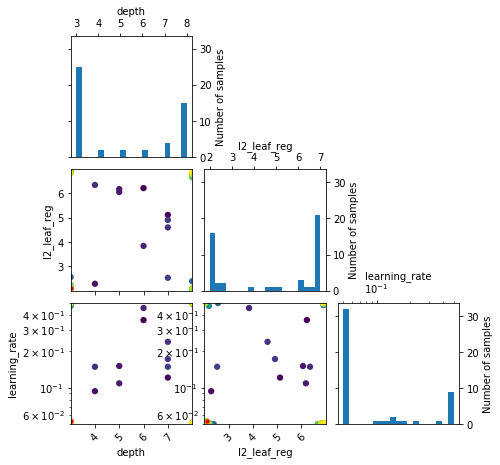

In [60]:
from skopt.plots import plot_evaluations

plot_evaluations(res_gp_hedge_mean, dimensions=['depth', 'l2_leaf_reg', 'learning_rate'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259EC9CFC18>,
      dtype=object)

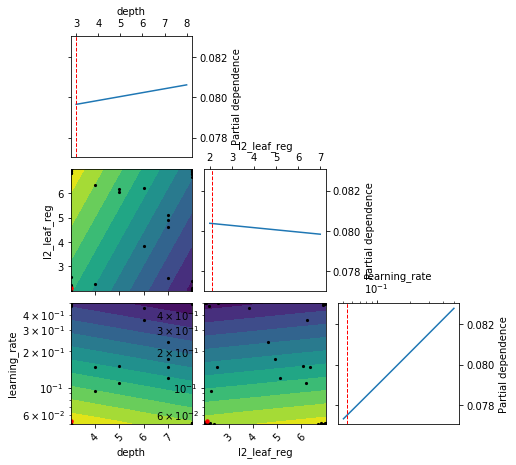

In [61]:
from skopt.plots import plot_objective 

plot_objective (res_gp_hedge_mean, dimensions=['depth', 'l2_leaf_reg', 'learning_rate'])

<HR>

In [16]:
space_auc  = [Integer(1, 7, name='depth'),
          Real(1, 4, name='l2_leaf_reg', prior='uniform'),
          Real(0.07, 0.3, "log-uniform", name='learning_rate'),
          Integer(20, 50, name='max_leaves'),
          Integer(1, 10, name='min_data_in_leaf')
         ]


@use_named_args(space_auc)
def objective_auc(**params):
    
    model1 = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.95, gpu_cat_features_storage='CpuPinnedMemory', iterations=300, eval_metric='AUC', grow_policy='Lossguide', border_count=255, use_best_model=True, random_strength=2)
    model1.set_params(**params)
    
    cv_data = cv(
        Pool(df_train_X, df_train_y),
        model1.get_params(),
        fold_count=5
    )
    best_auc = np.max(cv_data['test-AUC-mean'])
    
    return 1 - best_auc 

#### gbrt_minimize and objective: AUC-mean

In [ ]:

res_gprt_auc = gbrt_minimize(objective_auc, space_auc, n_calls=50, random_state=0)

"Best score=%.4f" % res_gprt_auc.fun

In [ ]:
print("""Best parameters: - depth=%d - l2_leaf_reg=%.6f - learning_rate=%.6f - max_leaves=%d - min_data_in_leaf=%d""" % (res_gprt_auc.x[0], res_gprt_auc.x[1], res_gprt_auc.x[2], res_gprt_auc.x[3], res_gprt_auc.x[4]))

In [ ]:
plot_convergence(res_gprt_auc)

In [ ]:
from skopt.plots import plot_evaluations
plot_evaluations(res_gprt_auc)

In [ ]:
from skopt.plots import plot_objective 
plot_objective (res_gprt_auc)

In [ ]:
model = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.95, gpu_cat_features_storage='CpuPinnedMemory', iterations=3000, eval_metric='AUC', grow_policy='Lossguide', learning_rate=0.145895 , l2_leaf_reg=3.742847, depth=7, max_leaves=25, min_data_in_leaf=5)
model.fit(train_pool, eval_set=valid_pool)
eval_metrics = model.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)

In [ ]:
y_pred = model.predict_proba(X_valid) # for classifier
print(y_pred[:5])

In [ ]:
roc_test = roc_auc_score(y_valid, y_pred[:, 1:])
print(roc_test)

#### gb_minimize and objective: AUC-mean

In [18]:
from skopt import gp_minimize 

res_gp_hedge_auc = gp_minimize(objective1, space1, n_calls=50, acq_func='gp_hedge', random_state=0)


0:	test: 0.6328469	best: 0.6328469 (0)
1:	test: 0.6726192	best: 0.6726192 (1)
2:	test: 0.6957910	best: 0.6957910 (2)
3:	test: 0.7130292	best: 0.7130292 (3)
4:	test: 0.7289553	best: 0.7289553 (4)
5:	test: 0.7410511	best: 0.7410511 (5)
6:	test: 0.7509643	best: 0.7509643 (6)
7:	test: 0.7564248	best: 0.7564248 (7)
8:	test: 0.7632575	best: 0.7632575 (8)
9:	test: 0.7694566	best: 0.7694566 (9)
10:	test: 0.7737384	best: 0.7737384 (10)
11:	test: 0.7777359	best: 0.7777359 (11)
12:	test: 0.7812365	best: 0.7812365 (12)
13:	test: 0.7848713	best: 0.7848713 (13)
14:	test: 0.7880144	best: 0.7880144 (14)
15:	test: 0.7918055	best: 0.7918055 (15)
16:	test: 0.7948906	best: 0.7948906 (16)
17:	test: 0.7977507	best: 0.7977507 (17)
18:	test: 0.8011593	best: 0.8011593 (18)
19:	test: 0.8041183	best: 0.8041183 (19)
20:	test: 0.8072609	best: 0.8072609 (20)
21:	test: 0.8095262	best: 0.8095262 (21)
22:	test: 0.8114841	best: 0.8114841 (22)
23:	test: 0.8137978	best: 0.8137978 (23)
24:	test: 0.8149208	best: 0.8149208 

0:	test: 0.6058315	best: 0.6058315 (0)
1:	test: 0.6289265	best: 0.6289265 (1)
2:	test: 0.6453956	best: 0.6453956 (2)
3:	test: 0.6633831	best: 0.6633831 (3)
4:	test: 0.6754434	best: 0.6754434 (4)
5:	test: 0.6803921	best: 0.6803921 (5)
6:	test: 0.6853834	best: 0.6853834 (6)
7:	test: 0.6910285	best: 0.6910285 (7)
8:	test: 0.6966882	best: 0.6966882 (8)
9:	test: 0.7029194	best: 0.7029194 (9)
10:	test: 0.7065153	best: 0.7065153 (10)
11:	test: 0.7085127	best: 0.7085127 (11)
12:	test: 0.7116426	best: 0.7116426 (12)
13:	test: 0.7155194	best: 0.7155194 (13)
14:	test: 0.7172192	best: 0.7172192 (14)
15:	test: 0.7224455	best: 0.7224455 (15)
16:	test: 0.7260662	best: 0.7260662 (16)
17:	test: 0.7303664	best: 0.7303664 (17)
18:	test: 0.7332201	best: 0.7332201 (18)
19:	test: 0.7364613	best: 0.7364613 (19)
20:	test: 0.7386472	best: 0.7386472 (20)
21:	test: 0.7422406	best: 0.7422406 (21)
22:	test: 0.7442993	best: 0.7442993 (22)
23:	test: 0.7462071	best: 0.7462071 (23)
24:	test: 0.7488540	best: 0.7488540 

0:	test: 0.6435889	best: 0.6435889 (0)
1:	test: 0.6785201	best: 0.6785201 (1)
2:	test: 0.7007197	best: 0.7007197 (2)
3:	test: 0.7145564	best: 0.7145564 (3)
4:	test: 0.7257764	best: 0.7257764 (4)
5:	test: 0.7317484	best: 0.7317484 (5)
6:	test: 0.7407599	best: 0.7407599 (6)
7:	test: 0.7468931	best: 0.7468931 (7)
8:	test: 0.7517886	best: 0.7517886 (8)
9:	test: 0.7567758	best: 0.7567758 (9)
10:	test: 0.7605586	best: 0.7605586 (10)
11:	test: 0.7653948	best: 0.7653948 (11)
12:	test: 0.7695173	best: 0.7695173 (12)
13:	test: 0.7728604	best: 0.7728604 (13)
14:	test: 0.7760381	best: 0.7760381 (14)
15:	test: 0.7799864	best: 0.7799864 (15)
16:	test: 0.7832445	best: 0.7832445 (16)
17:	test: 0.7864967	best: 0.7864967 (17)
18:	test: 0.7891390	best: 0.7891390 (18)
19:	test: 0.7920911	best: 0.7920911 (19)
20:	test: 0.7948859	best: 0.7948859 (20)
21:	test: 0.7971088	best: 0.7971088 (21)
22:	test: 0.7988505	best: 0.7988505 (22)
23:	test: 0.8013151	best: 0.8013151 (23)
24:	test: 0.8030648	best: 0.8030648 

208:	test: 0.8780918	best: 0.8785395 (207)
209:	test: 0.8781823	best: 0.8785395 (207)
210:	test: 0.8782758	best: 0.8785395 (207)
211:	test: 0.8784029	best: 0.8785395 (207)
212:	test: 0.8784858	best: 0.8785395 (207)
213:	test: 0.8785830	best: 0.8785830 (213)
214:	test: 0.8786610	best: 0.8786610 (214)
215:	test: 0.8787476	best: 0.8787476 (215)
216:	test: 0.8787876	best: 0.8787876 (216)
217:	test: 0.8788894	best: 0.8788894 (217)
218:	test: 0.8789714	best: 0.8789714 (218)
219:	test: 0.8790430	best: 0.8790430 (219)
220:	test: 0.8791012	best: 0.8791012 (220)
221:	test: 0.8791789	best: 0.8791789 (221)
222:	test: 0.8792676	best: 0.8792676 (222)
223:	test: 0.8793164	best: 0.8793164 (223)
224:	test: 0.8793813	best: 0.8793813 (224)
225:	test: 0.8793938	best: 0.8793938 (225)
226:	test: 0.8794170	best: 0.8794170 (226)
227:	test: 0.8795443	best: 0.8795443 (227)
228:	test: 0.8795732	best: 0.8795732 (228)
229:	test: 0.8796160	best: 0.8796160 (229)
230:	test: 0.8796574	best: 0.8796574 (230)
231:	test: 

296:	test: 0.8799405	best: 0.8799405 (296)
297:	test: 0.8799237	best: 0.8799405 (296)
298:	test: 0.8798433	best: 0.8799405 (296)
299:	test: 0.8798942	best: 0.8799405 (296)	total: 2m 23s	remaining: 0us
0:	test: 0.6194649	best: 0.6194649 (0)
1:	test: 0.6540901	best: 0.6540901 (1)
2:	test: 0.6806340	best: 0.6806340 (2)
3:	test: 0.6927557	best: 0.6927557 (3)
4:	test: 0.7042239	best: 0.7042239 (4)
5:	test: 0.7145648	best: 0.7145648 (5)
6:	test: 0.7217988	best: 0.7217988 (6)
7:	test: 0.7284755	best: 0.7284755 (7)
8:	test: 0.7371706	best: 0.7371706 (8)
9:	test: 0.7437960	best: 0.7437960 (9)
10:	test: 0.7499173	best: 0.7499173 (10)
11:	test: 0.7546795	best: 0.7546795 (11)
12:	test: 0.7595252	best: 0.7595252 (12)
13:	test: 0.7620304	best: 0.7620304 (13)
14:	test: 0.7653780	best: 0.7653780 (14)
15:	test: 0.7689919	best: 0.7689919 (15)
16:	test: 0.7715966	best: 0.7715966 (16)
17:	test: 0.7749076	best: 0.7749076 (17)
18:	test: 0.7781046	best: 0.7781046 (18)
19:	test: 0.7815389	best: 0.7815389 (19)

0:	test: 0.6194649	best: 0.6194649 (0)
1:	test: 0.6578712	best: 0.6578712 (1)
2:	test: 0.6786842	best: 0.6786842 (2)
3:	test: 0.6952302	best: 0.6952302 (3)
4:	test: 0.7087542	best: 0.7087542 (4)
5:	test: 0.7207301	best: 0.7207301 (5)
6:	test: 0.7312385	best: 0.7312385 (6)
7:	test: 0.7375055	best: 0.7375055 (7)
8:	test: 0.7472364	best: 0.7472364 (8)
9:	test: 0.7535532	best: 0.7535532 (9)
10:	test: 0.7598451	best: 0.7598451 (10)
11:	test: 0.7653765	best: 0.7653765 (11)
12:	test: 0.7708168	best: 0.7708168 (12)
13:	test: 0.7746708	best: 0.7746708 (13)
14:	test: 0.7783340	best: 0.7783340 (14)
15:	test: 0.7815920	best: 0.7815920 (15)
16:	test: 0.7853378	best: 0.7853378 (16)
17:	test: 0.7877285	best: 0.7877285 (17)
18:	test: 0.7917633	best: 0.7917633 (18)
19:	test: 0.7944267	best: 0.7944267 (19)
20:	test: 0.7960811	best: 0.7960811 (20)
21:	test: 0.7984384	best: 0.7984384 (21)
22:	test: 0.8008817	best: 0.8008817 (22)
23:	test: 0.8031184	best: 0.8031184 (23)
24:	test: 0.8051097	best: 0.8051097 

0:	test: 0.5877260	best: 0.5877260 (0)
1:	test: 0.6076109	best: 0.6076109 (1)
2:	test: 0.6283235	best: 0.6283235 (2)
3:	test: 0.6396980	best: 0.6396980 (3)
4:	test: 0.6488952	best: 0.6488952 (4)
5:	test: 0.6624159	best: 0.6624159 (5)
6:	test: 0.6695843	best: 0.6695843 (6)
7:	test: 0.6757621	best: 0.6757621 (7)
8:	test: 0.6827807	best: 0.6827807 (8)
9:	test: 0.6888744	best: 0.6888744 (9)
10:	test: 0.6911396	best: 0.6911396 (10)
11:	test: 0.6939914	best: 0.6939914 (11)
12:	test: 0.6970671	best: 0.6970671 (12)
13:	test: 0.6988649	best: 0.6988649 (13)
14:	test: 0.7008840	best: 0.7008840 (14)
15:	test: 0.7060240	best: 0.7060240 (15)
16:	test: 0.7093947	best: 0.7093947 (16)
17:	test: 0.7143820	best: 0.7143820 (17)
18:	test: 0.7183420	best: 0.7183420 (18)
19:	test: 0.7202018	best: 0.7202018 (19)
20:	test: 0.7232766	best: 0.7232766 (20)
21:	test: 0.7267910	best: 0.7267910 (21)
22:	test: 0.7292580	best: 0.7292580 (22)
23:	test: 0.7336015	best: 0.7336015 (23)
24:	test: 0.7362875	best: 0.7362875 

0:	test: 0.5877260	best: 0.5877260 (0)
1:	test: 0.6091113	best: 0.6091113 (1)
2:	test: 0.6322853	best: 0.6322853 (2)
3:	test: 0.6464108	best: 0.6464108 (3)
4:	test: 0.6589974	best: 0.6589974 (4)
5:	test: 0.6644442	best: 0.6644442 (5)
6:	test: 0.6757631	best: 0.6757631 (6)
7:	test: 0.6844108	best: 0.6844108 (7)
8:	test: 0.6861610	best: 0.6861610 (8)
9:	test: 0.6933021	best: 0.6933021 (9)
10:	test: 0.6973987	best: 0.6973987 (10)
11:	test: 0.7031325	best: 0.7031325 (11)
12:	test: 0.7065249	best: 0.7065249 (12)
13:	test: 0.7091080	best: 0.7091080 (13)
14:	test: 0.7112176	best: 0.7112176 (14)
15:	test: 0.7164259	best: 0.7164259 (15)
16:	test: 0.7207568	best: 0.7207568 (16)
17:	test: 0.7249103	best: 0.7249103 (17)
18:	test: 0.7302431	best: 0.7302431 (18)
19:	test: 0.7343230	best: 0.7343230 (19)
20:	test: 0.7393098	best: 0.7393098 (20)
21:	test: 0.7427242	best: 0.7427242 (21)
22:	test: 0.7451799	best: 0.7451799 (22)
23:	test: 0.7493139	best: 0.7493139 (23)
24:	test: 0.7512561	best: 0.7512561 

0:	test: 0.6328465	best: 0.6328465 (0)
1:	test: 0.6612237	best: 0.6612237 (1)
2:	test: 0.6797123	best: 0.6797123 (2)
3:	test: 0.6931753	best: 0.6931753 (3)
4:	test: 0.7009701	best: 0.7009701 (4)
5:	test: 0.7114284	best: 0.7114284 (5)
6:	test: 0.7195395	best: 0.7195395 (6)
7:	test: 0.7240695	best: 0.7240695 (7)
8:	test: 0.7280212	best: 0.7280212 (8)
9:	test: 0.7345092	best: 0.7345092 (9)
10:	test: 0.7360174	best: 0.7360174 (10)
11:	test: 0.7413924	best: 0.7413924 (11)
12:	test: 0.7453568	best: 0.7453568 (12)
13:	test: 0.7481047	best: 0.7481047 (13)
14:	test: 0.7496713	best: 0.7496713 (14)
15:	test: 0.7544824	best: 0.7544824 (15)
16:	test: 0.7577750	best: 0.7577750 (16)
17:	test: 0.7609379	best: 0.7609379 (17)
18:	test: 0.7632839	best: 0.7632839 (18)
19:	test: 0.7660121	best: 0.7660121 (19)
20:	test: 0.7685993	best: 0.7685993 (20)
21:	test: 0.7711877	best: 0.7711877 (21)
22:	test: 0.7737231	best: 0.7737231 (22)
23:	test: 0.7757496	best: 0.7757496 (23)
24:	test: 0.7779593	best: 0.7779593 

254:	test: 0.8730388	best: 0.8730388 (254)
255:	test: 0.8730831	best: 0.8730831 (255)
256:	test: 0.8732293	best: 0.8732293 (256)
257:	test: 0.8732821	best: 0.8732821 (257)
258:	test: 0.8734015	best: 0.8734015 (258)
259:	test: 0.8734813	best: 0.8734813 (259)
260:	test: 0.8735978	best: 0.8735978 (260)
261:	test: 0.8737323	best: 0.8737323 (261)
262:	test: 0.8738631	best: 0.8738631 (262)
263:	test: 0.8739933	best: 0.8739933 (263)
264:	test: 0.8740801	best: 0.8740801 (264)
265:	test: 0.8741454	best: 0.8741454 (265)
266:	test: 0.8742391	best: 0.8742391 (266)
267:	test: 0.8743036	best: 0.8743036 (267)
268:	test: 0.8744140	best: 0.8744140 (268)
269:	test: 0.8745244	best: 0.8745244 (269)
270:	test: 0.8746277	best: 0.8746277 (270)
271:	test: 0.8747239	best: 0.8747239 (271)
272:	test: 0.8747388	best: 0.8747388 (272)
273:	test: 0.8748349	best: 0.8748349 (273)
274:	test: 0.8749997	best: 0.8749997 (274)
275:	test: 0.8750607	best: 0.8750607 (275)
276:	test: 0.8751117	best: 0.8751117 (276)
277:	test: 

0:	test: 0.6537507	best: 0.6537507 (0)
1:	test: 0.6958249	best: 0.6958249 (1)
2:	test: 0.7199975	best: 0.7199975 (2)
3:	test: 0.7368414	best: 0.7368414 (3)
4:	test: 0.7483014	best: 0.7483014 (4)
5:	test: 0.7581503	best: 0.7581503 (5)
6:	test: 0.7678504	best: 0.7678504 (6)
7:	test: 0.7743971	best: 0.7743971 (7)
8:	test: 0.7814657	best: 0.7814657 (8)
9:	test: 0.7868046	best: 0.7868046 (9)
10:	test: 0.7922401	best: 0.7922401 (10)
11:	test: 0.7970716	best: 0.7970716 (11)
12:	test: 0.8008708	best: 0.8008708 (12)
13:	test: 0.8050473	best: 0.8050473 (13)
14:	test: 0.8083060	best: 0.8083060 (14)
15:	test: 0.8114448	best: 0.8114448 (15)
16:	test: 0.8141047	best: 0.8141047 (16)
17:	test: 0.8169478	best: 0.8169478 (17)
18:	test: 0.8192605	best: 0.8192605 (18)
19:	test: 0.8212961	best: 0.8212961 (19)
20:	test: 0.8237455	best: 0.8237455 (20)
21:	test: 0.8256802	best: 0.8256802 (21)
22:	test: 0.8275619	best: 0.8275619 (22)
23:	test: 0.8291668	best: 0.8291668 (23)
24:	test: 0.8307606	best: 0.8307606 

0:	test: 0.6535649	best: 0.6535649 (0)
1:	test: 0.6957938	best: 0.6957938 (1)
2:	test: 0.7185079	best: 0.7185079 (2)
3:	test: 0.7356097	best: 0.7356097 (3)
4:	test: 0.7506534	best: 0.7506534 (4)
5:	test: 0.7609484	best: 0.7609484 (5)
6:	test: 0.7700636	best: 0.7700636 (6)
7:	test: 0.7758601	best: 0.7758601 (7)
8:	test: 0.7820382	best: 0.7820382 (8)
9:	test: 0.7877470	best: 0.7877470 (9)
10:	test: 0.7930404	best: 0.7930404 (10)
11:	test: 0.7973400	best: 0.7973400 (11)
12:	test: 0.8011757	best: 0.8011757 (12)
13:	test: 0.8047396	best: 0.8047396 (13)
14:	test: 0.8079686	best: 0.8079686 (14)
15:	test: 0.8106792	best: 0.8106792 (15)
16:	test: 0.8137814	best: 0.8137814 (16)
17:	test: 0.8166437	best: 0.8166437 (17)
18:	test: 0.8192898	best: 0.8192898 (18)
19:	test: 0.8211609	best: 0.8211609 (19)
20:	test: 0.8234164	best: 0.8234164 (20)
21:	test: 0.8252230	best: 0.8252230 (21)
22:	test: 0.8273833	best: 0.8273833 (22)
23:	test: 0.8289896	best: 0.8289896 (23)
24:	test: 0.8304715	best: 0.8304715 

0:	test: 0.5490048	best: 0.5490048 (0)
1:	test: 0.5727348	best: 0.5727348 (1)
2:	test: 0.6081421	best: 0.6081421 (2)
3:	test: 0.6154763	best: 0.6154763 (3)
4:	test: 0.6241501	best: 0.6241501 (4)
5:	test: 0.6339531	best: 0.6339531 (5)
6:	test: 0.6454980	best: 0.6454980 (6)
7:	test: 0.6551998	best: 0.6551998 (7)
8:	test: 0.6644802	best: 0.6644802 (8)
9:	test: 0.6722522	best: 0.6722522 (9)
10:	test: 0.6804385	best: 0.6804385 (10)
11:	test: 0.6881250	best: 0.6881250 (11)
12:	test: 0.6907489	best: 0.6907489 (12)
13:	test: 0.6955349	best: 0.6955349 (13)
14:	test: 0.6983325	best: 0.6983325 (14)
15:	test: 0.7017882	best: 0.7017882 (15)
16:	test: 0.7071252	best: 0.7071252 (16)
17:	test: 0.7120750	best: 0.7120750 (17)
18:	test: 0.7150333	best: 0.7150333 (18)
19:	test: 0.7161006	best: 0.7161006 (19)
20:	test: 0.7187999	best: 0.7187999 (20)
21:	test: 0.7225142	best: 0.7225142 (21)
22:	test: 0.7262009	best: 0.7262009 (22)
23:	test: 0.7286365	best: 0.7286365 (23)
24:	test: 0.7325205	best: 0.7325205 

0:	test: 0.6519086	best: 0.6519086 (0)
1:	test: 0.6939363	best: 0.6939363 (1)
2:	test: 0.7181231	best: 0.7181231 (2)
3:	test: 0.7363335	best: 0.7363335 (3)
4:	test: 0.7496179	best: 0.7496179 (4)
5:	test: 0.7576820	best: 0.7576820 (5)
6:	test: 0.7665947	best: 0.7665947 (6)
7:	test: 0.7724068	best: 0.7724068 (7)
8:	test: 0.7789873	best: 0.7789873 (8)
9:	test: 0.7849698	best: 0.7849698 (9)
10:	test: 0.7908734	best: 0.7908734 (10)
11:	test: 0.7961910	best: 0.7961910 (11)
12:	test: 0.8002982	best: 0.8002982 (12)
13:	test: 0.8041649	best: 0.8041649 (13)
14:	test: 0.8076588	best: 0.8076588 (14)
15:	test: 0.8112378	best: 0.8112378 (15)
16:	test: 0.8142147	best: 0.8142147 (16)
17:	test: 0.8169381	best: 0.8169381 (17)
18:	test: 0.8197708	best: 0.8197708 (18)
19:	test: 0.8222089	best: 0.8222089 (19)
20:	test: 0.8245296	best: 0.8245296 (20)
21:	test: 0.8264139	best: 0.8264139 (21)
22:	test: 0.8283318	best: 0.8283318 (22)
23:	test: 0.8301063	best: 0.8301063 (23)
24:	test: 0.8322688	best: 0.8322688 

267:	test: 0.8781352	best: 0.8794634 (179)
268:	test: 0.8781231	best: 0.8794634 (179)
269:	test: 0.8780708	best: 0.8794634 (179)
270:	test: 0.8780411	best: 0.8794634 (179)
271:	test: 0.8780489	best: 0.8794634 (179)
272:	test: 0.8780325	best: 0.8794634 (179)
273:	test: 0.8779729	best: 0.8794634 (179)
274:	test: 0.8779428	best: 0.8794634 (179)
275:	test: 0.8779251	best: 0.8794634 (179)
276:	test: 0.8778610	best: 0.8794634 (179)
277:	test: 0.8778002	best: 0.8794634 (179)
278:	test: 0.8777757	best: 0.8794634 (179)
279:	test: 0.8778005	best: 0.8794634 (179)
280:	test: 0.8777905	best: 0.8794634 (179)
281:	test: 0.8777694	best: 0.8794634 (179)
282:	test: 0.8777528	best: 0.8794634 (179)
283:	test: 0.8777530	best: 0.8794634 (179)
284:	test: 0.8776766	best: 0.8794634 (179)
285:	test: 0.8776759	best: 0.8794634 (179)
286:	test: 0.8776832	best: 0.8794634 (179)
287:	test: 0.8776828	best: 0.8794634 (179)
288:	test: 0.8777255	best: 0.8794634 (179)
289:	test: 0.8777060	best: 0.8794634 (179)
290:	test: 

0:	test: 0.6507112	best: 0.6507112 (0)
1:	test: 0.6790848	best: 0.6790848 (1)
2:	test: 0.6968924	best: 0.6968924 (2)
3:	test: 0.7071914	best: 0.7071914 (3)
4:	test: 0.7181192	best: 0.7181192 (4)
5:	test: 0.7259509	best: 0.7259509 (5)
6:	test: 0.7335074	best: 0.7335074 (6)
7:	test: 0.7388768	best: 0.7388768 (7)
8:	test: 0.7427137	best: 0.7427137 (8)
9:	test: 0.7480421	best: 0.7480421 (9)
10:	test: 0.7513761	best: 0.7513761 (10)
11:	test: 0.7550211	best: 0.7550211 (11)
12:	test: 0.7581419	best: 0.7581419 (12)
13:	test: 0.7599574	best: 0.7599574 (13)
14:	test: 0.7626970	best: 0.7626970 (14)
15:	test: 0.7667778	best: 0.7667778 (15)
16:	test: 0.7699201	best: 0.7699201 (16)
17:	test: 0.7729286	best: 0.7729286 (17)
18:	test: 0.7757693	best: 0.7757693 (18)
19:	test: 0.7775027	best: 0.7775027 (19)
20:	test: 0.7801863	best: 0.7801863 (20)
21:	test: 0.7823970	best: 0.7823970 (21)
22:	test: 0.7845333	best: 0.7845333 (22)
23:	test: 0.7865814	best: 0.7865814 (23)
24:	test: 0.7888732	best: 0.7888732 

281:	test: 0.8823462	best: 0.8823462 (281)
282:	test: 0.8824226	best: 0.8824226 (282)
283:	test: 0.8825102	best: 0.8825102 (283)
284:	test: 0.8825725	best: 0.8825725 (284)
285:	test: 0.8826676	best: 0.8826676 (285)
286:	test: 0.8827338	best: 0.8827338 (286)
287:	test: 0.8827778	best: 0.8827778 (287)
288:	test: 0.8828588	best: 0.8828588 (288)
289:	test: 0.8829145	best: 0.8829145 (289)
290:	test: 0.8829447	best: 0.8829447 (290)
291:	test: 0.8830176	best: 0.8830176 (291)
292:	test: 0.8830623	best: 0.8830623 (292)
293:	test: 0.8831329	best: 0.8831329 (293)
294:	test: 0.8831928	best: 0.8831928 (294)
295:	test: 0.8832606	best: 0.8832606 (295)
296:	test: 0.8832804	best: 0.8832804 (296)
297:	test: 0.8833412	best: 0.8833412 (297)
298:	test: 0.8833867	best: 0.8833867 (298)
299:	test: 0.8834726	best: 0.8834726 (299)	total: 2m 21s	remaining: 0us
0:	test: 0.6537781	best: 0.6537781 (0)
1:	test: 0.6806721	best: 0.6806721 (1)
2:	test: 0.6980635	best: 0.6980635 (2)
3:	test: 0.7095811	best: 0.7095811 (3

178:	test: 0.8709349	best: 0.8714859 (177)
179:	test: 0.8711186	best: 0.8714859 (177)
180:	test: 0.8712573	best: 0.8714859 (177)
181:	test: 0.8713848	best: 0.8714859 (177)
182:	test: 0.8715151	best: 0.8715151 (182)
183:	test: 0.8717058	best: 0.8717058 (183)
184:	test: 0.8718586	best: 0.8718586 (184)
185:	test: 0.8719974	best: 0.8719974 (185)
186:	test: 0.8721854	best: 0.8721854 (186)
187:	test: 0.8723322	best: 0.8723322 (187)
188:	test: 0.8724158	best: 0.8724158 (188)
189:	test: 0.8725521	best: 0.8725521 (189)
190:	test: 0.8727243	best: 0.8727243 (190)
191:	test: 0.8728917	best: 0.8728917 (191)
192:	test: 0.8730210	best: 0.8730210 (192)
193:	test: 0.8731638	best: 0.8731638 (193)
194:	test: 0.8732478	best: 0.8732478 (194)
195:	test: 0.8733507	best: 0.8733507 (195)
196:	test: 0.8734898	best: 0.8734898 (196)
197:	test: 0.8736647	best: 0.8736647 (197)
198:	test: 0.8737722	best: 0.8737722 (198)
199:	test: 0.8738701	best: 0.8738701 (199)
200:	test: 0.8739869	best: 0.8739869 (200)
201:	test: 

289:	test: 0.8803061	best: 0.8808776 (177)
290:	test: 0.8803146	best: 0.8808776 (177)
291:	test: 0.8802685	best: 0.8808776 (177)
292:	test: 0.8802042	best: 0.8808776 (177)
293:	test: 0.8802072	best: 0.8808776 (177)
294:	test: 0.8801656	best: 0.8808776 (177)
295:	test: 0.8801024	best: 0.8808776 (177)
296:	test: 0.8800928	best: 0.8808776 (177)
297:	test: 0.8800378	best: 0.8808776 (177)
298:	test: 0.8799973	best: 0.8808776 (177)
299:	test: 0.8800063	best: 0.8808776 (177)	total: 2m 22s	remaining: 0us
0:	test: 0.6505403	best: 0.6505403 (0)
1:	test: 0.6805180	best: 0.6805180 (1)
2:	test: 0.6968736	best: 0.6968736 (2)
3:	test: 0.7092151	best: 0.7092151 (3)
4:	test: 0.7202055	best: 0.7202055 (4)
5:	test: 0.7272990	best: 0.7272990 (5)
6:	test: 0.7334039	best: 0.7334039 (6)
7:	test: 0.7382031	best: 0.7382031 (7)
8:	test: 0.7425597	best: 0.7425597 (8)
9:	test: 0.7497197	best: 0.7497197 (9)
10:	test: 0.7529891	best: 0.7529891 (10)
11:	test: 0.7572605	best: 0.7572605 (11)
12:	test: 0.7595926	best: 

280:	test: 0.8824792	best: 0.8824792 (280)
281:	test: 0.8825373	best: 0.8825373 (281)
282:	test: 0.8826073	best: 0.8826073 (282)
283:	test: 0.8826952	best: 0.8826952 (283)
284:	test: 0.8827809	best: 0.8827809 (284)
285:	test: 0.8828433	best: 0.8828433 (285)
286:	test: 0.8829318	best: 0.8829318 (286)
287:	test: 0.8829927	best: 0.8829927 (287)
288:	test: 0.8830661	best: 0.8830661 (288)
289:	test: 0.8831338	best: 0.8831338 (289)
290:	test: 0.8831962	best: 0.8831962 (290)
291:	test: 0.8832387	best: 0.8832387 (291)
292:	test: 0.8832990	best: 0.8832990 (292)
293:	test: 0.8833312	best: 0.8833312 (293)
294:	test: 0.8833997	best: 0.8833997 (294)
295:	test: 0.8834496	best: 0.8834496 (295)
296:	test: 0.8834617	best: 0.8834617 (296)
297:	test: 0.8835209	best: 0.8835209 (297)
298:	test: 0.8836139	best: 0.8836139 (298)
299:	test: 0.8837074	best: 0.8837074 (299)	total: 2m 23s	remaining: 0us
0:	test: 0.6505403	best: 0.6505403 (0)
1:	test: 0.6777764	best: 0.6777764 (1)
2:	test: 0.6935528	best: 0.693552

285:	test: 0.8801683	best: 0.8801683 (285)
286:	test: 0.8802504	best: 0.8802504 (286)
287:	test: 0.8803075	best: 0.8803075 (287)
288:	test: 0.8803708	best: 0.8803708 (288)
289:	test: 0.8804331	best: 0.8804331 (289)
290:	test: 0.8804987	best: 0.8804987 (290)
291:	test: 0.8805902	best: 0.8805902 (291)
292:	test: 0.8806752	best: 0.8806752 (292)
293:	test: 0.8807521	best: 0.8807521 (293)
294:	test: 0.8808479	best: 0.8808479 (294)
295:	test: 0.8809264	best: 0.8809264 (295)
296:	test: 0.8809808	best: 0.8809808 (296)
297:	test: 0.8810582	best: 0.8810582 (297)
298:	test: 0.8811601	best: 0.8811601 (298)
299:	test: 0.8812320	best: 0.8812320 (299)	total: 2m 23s	remaining: 0us
0:	test: 0.6505403	best: 0.6505403 (0)
1:	test: 0.6777764	best: 0.6777764 (1)
2:	test: 0.6935528	best: 0.6935528 (2)
3:	test: 0.7045718	best: 0.7045718 (3)
4:	test: 0.7145717	best: 0.7145717 (4)
5:	test: 0.7222625	best: 0.7222625 (5)
6:	test: 0.7292524	best: 0.7292524 (6)
7:	test: 0.7350950	best: 0.7350950 (7)
8:	test: 0.739

278:	test: 0.8797807	best: 0.8797807 (278)
279:	test: 0.8798512	best: 0.8798512 (279)
280:	test: 0.8799444	best: 0.8799444 (280)
281:	test: 0.8800467	best: 0.8800467 (281)
282:	test: 0.8801189	best: 0.8801189 (282)
283:	test: 0.8801997	best: 0.8801997 (283)
284:	test: 0.8802619	best: 0.8802619 (284)
285:	test: 0.8803099	best: 0.8803099 (285)
286:	test: 0.8803939	best: 0.8803939 (286)
287:	test: 0.8804519	best: 0.8804519 (287)
288:	test: 0.8805561	best: 0.8805561 (288)
289:	test: 0.8806498	best: 0.8806498 (289)
290:	test: 0.8807349	best: 0.8807349 (290)
291:	test: 0.8808225	best: 0.8808225 (291)
292:	test: 0.8808652	best: 0.8808652 (292)
293:	test: 0.8809322	best: 0.8809322 (293)
294:	test: 0.8809959	best: 0.8809959 (294)
295:	test: 0.8810518	best: 0.8810518 (295)
296:	test: 0.8811334	best: 0.8811334 (296)
297:	test: 0.8812174	best: 0.8812174 (297)
298:	test: 0.8812881	best: 0.8812881 (298)
299:	test: 0.8813676	best: 0.8813676 (299)	total: 2m 21s	remaining: 0us
0:	test: 0.6509599	best: 

284:	test: 0.8803636	best: 0.8816030 (195)
285:	test: 0.8803346	best: 0.8816030 (195)
286:	test: 0.8803522	best: 0.8816030 (195)
287:	test: 0.8803057	best: 0.8816030 (195)
288:	test: 0.8802897	best: 0.8816030 (195)
289:	test: 0.8802542	best: 0.8816030 (195)
290:	test: 0.8802849	best: 0.8816030 (195)
291:	test: 0.8802519	best: 0.8816030 (195)
292:	test: 0.8802223	best: 0.8816030 (195)
293:	test: 0.8802006	best: 0.8816030 (195)
294:	test: 0.8801886	best: 0.8816030 (195)
295:	test: 0.8802020	best: 0.8816030 (195)
296:	test: 0.8801557	best: 0.8816030 (195)
297:	test: 0.8800928	best: 0.8816030 (195)
298:	test: 0.8800607	best: 0.8816030 (195)
299:	test: 0.8800648	best: 0.8816030 (195)	total: 2m 23s	remaining: 0us


E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0:	test: 0.6505403	best: 0.6505403 (0)
1:	test: 0.6777764	best: 0.6777764 (1)
2:	test: 0.6935527	best: 0.6935527 (2)
3:	test: 0.7045709	best: 0.7045709 (3)
4:	test: 0.7145725	best: 0.7145725 (4)
5:	test: 0.7222629	best: 0.7222629 (5)
6:	test: 0.7292518	best: 0.7292518 (6)
7:	test: 0.7350951	best: 0.7350951 (7)
8:	test: 0.7390350	best: 0.7390350 (8)
9:	test: 0.7454253	best: 0.7454253 (9)
10:	test: 0.7486493	best: 0.7486493 (10)
11:	test: 0.7516025	best: 0.7516025 (11)
12:	test: 0.7552916	best: 0.7552916 (12)
13:	test: 0.7572810	best: 0.7572810 (13)
14:	test: 0.7594709	best: 0.7594709 (14)
15:	test: 0.7630847	best: 0.7630847 (15)
16:	test: 0.7664635	best: 0.7664635 (16)
17:	test: 0.7682207	best: 0.7682207 (17)
18:	test: 0.7709281	best: 0.7709281 (18)
19:	test: 0.7735782	best: 0.7735782 (19)
20:	test: 0.7757883	best: 0.7757883 (20)
21:	test: 0.7779380	best: 0.7779380 (21)
22:	test: 0.7798481	best: 0.7798481 (22)
23:	test: 0.7820624	best: 0.7820624 (23)
24:	test: 0.7840167	best: 0.7840167 

295:	test: 0.8807653	best: 0.8807653 (295)
296:	test: 0.8808350	best: 0.8808350 (296)
297:	test: 0.8809152	best: 0.8809152 (297)
298:	test: 0.8809720	best: 0.8809720 (298)
299:	test: 0.8810603	best: 0.8810603 (299)	total: 2m 25s	remaining: 0us
0:	test: 0.6535649	best: 0.6535649 (0)
1:	test: 0.6824455	best: 0.6824455 (1)
2:	test: 0.7009217	best: 0.7009217 (2)
3:	test: 0.7146607	best: 0.7146607 (3)
4:	test: 0.7245325	best: 0.7245325 (4)
5:	test: 0.7329610	best: 0.7329610 (5)
6:	test: 0.7395507	best: 0.7395507 (6)
7:	test: 0.7455130	best: 0.7455130 (7)
8:	test: 0.7506431	best: 0.7506431 (8)
9:	test: 0.7557219	best: 0.7557219 (9)
10:	test: 0.7595227	best: 0.7595227 (10)
11:	test: 0.7636349	best: 0.7636349 (11)
12:	test: 0.7664689	best: 0.7664689 (12)
13:	test: 0.7687807	best: 0.7687807 (13)
14:	test: 0.7708459	best: 0.7708459 (14)
15:	test: 0.7741898	best: 0.7741898 (15)
16:	test: 0.7770228	best: 0.7770228 (16)
17:	test: 0.7798269	best: 0.7798269 (17)
18:	test: 0.7826900	best: 0.7826900 (1

0:	test: 0.6505403	best: 0.6505403 (0)
1:	test: 0.6849044	best: 0.6849044 (1)
2:	test: 0.7122602	best: 0.7122602 (2)
3:	test: 0.7224670	best: 0.7224670 (3)
4:	test: 0.7350300	best: 0.7350300 (4)
5:	test: 0.7431441	best: 0.7431441 (5)
6:	test: 0.7509793	best: 0.7509793 (6)
7:	test: 0.7575453	best: 0.7575453 (7)
8:	test: 0.7640705	best: 0.7640705 (8)
9:	test: 0.7697106	best: 0.7697106 (9)
10:	test: 0.7741811	best: 0.7741811 (10)
11:	test: 0.7785708	best: 0.7785708 (11)
12:	test: 0.7826731	best: 0.7826731 (12)
13:	test: 0.7858539	best: 0.7858539 (13)
14:	test: 0.7888403	best: 0.7888403 (14)
15:	test: 0.7929778	best: 0.7929778 (15)
16:	test: 0.7961022	best: 0.7961022 (16)
17:	test: 0.7988821	best: 0.7988821 (17)
18:	test: 0.8012903	best: 0.8012903 (18)
19:	test: 0.8042849	best: 0.8042849 (19)
20:	test: 0.8070657	best: 0.8070657 (20)
21:	test: 0.8092866	best: 0.8092866 (21)
22:	test: 0.8119953	best: 0.8119953 (22)
23:	test: 0.8142351	best: 0.8142351 (23)
24:	test: 0.8161210	best: 0.8161210 

285:	test: 0.8872192	best: 0.8872192 (285)
286:	test: 0.8872191	best: 0.8872192 (285)
287:	test: 0.8872249	best: 0.8872249 (287)
288:	test: 0.8872344	best: 0.8872344 (288)
289:	test: 0.8872207	best: 0.8872344 (288)
290:	test: 0.8872572	best: 0.8872572 (290)
291:	test: 0.8872760	best: 0.8872760 (291)
292:	test: 0.8872797	best: 0.8872797 (292)
293:	test: 0.8873094	best: 0.8873094 (293)
294:	test: 0.8873775	best: 0.8873775 (294)
295:	test: 0.8873900	best: 0.8873900 (295)
296:	test: 0.8873898	best: 0.8873900 (295)
297:	test: 0.8873851	best: 0.8873900 (295)
298:	test: 0.8873986	best: 0.8873986 (298)
299:	test: 0.8874082	best: 0.8874082 (299)	total: 2m 22s	remaining: 0us
0:	test: 0.6535801	best: 0.6535801 (0)
1:	test: 0.6954485	best: 0.6954485 (1)
2:	test: 0.7186206	best: 0.7186206 (2)
3:	test: 0.7364691	best: 0.7364691 (3)
4:	test: 0.7512530	best: 0.7512530 (4)
5:	test: 0.7614347	best: 0.7614347 (5)
6:	test: 0.7701896	best: 0.7701896 (6)
7:	test: 0.7769250	best: 0.7769250 (7)
8:	test: 0.782

186:	test: 0.8740932	best: 0.8743690 (170)
187:	test: 0.8741243	best: 0.8743690 (170)
188:	test: 0.8741071	best: 0.8743690 (170)
189:	test: 0.8740508	best: 0.8743690 (170)
190:	test: 0.8741052	best: 0.8743690 (170)
191:	test: 0.8740642	best: 0.8743690 (170)
192:	test: 0.8741312	best: 0.8743690 (170)
193:	test: 0.8741306	best: 0.8743690 (170)
194:	test: 0.8741243	best: 0.8743690 (170)
195:	test: 0.8741976	best: 0.8743690 (170)
196:	test: 0.8741891	best: 0.8743690 (170)
197:	test: 0.8741726	best: 0.8743690 (170)
198:	test: 0.8741964	best: 0.8743690 (170)
199:	test: 0.8741681	best: 0.8743690 (170)
200:	test: 0.8742256	best: 0.8743690 (170)
201:	test: 0.8741314	best: 0.8743690 (170)
202:	test: 0.8741016	best: 0.8743690 (170)
203:	test: 0.8741257	best: 0.8743690 (170)
204:	test: 0.8741177	best: 0.8743690 (170)
205:	test: 0.8741286	best: 0.8743690 (170)
206:	test: 0.8741372	best: 0.8743690 (170)
207:	test: 0.8740749	best: 0.8743690 (170)
208:	test: 0.8739664	best: 0.8743690 (170)
209:	test: 

0:	test: 0.6058315	best: 0.6058315 (0)
1:	test: 0.6422103	best: 0.6422103 (1)
2:	test: 0.6697109	best: 0.6697109 (2)
3:	test: 0.6834780	best: 0.6834780 (3)
4:	test: 0.6997636	best: 0.6997636 (4)
5:	test: 0.7137128	best: 0.7137128 (5)
6:	test: 0.7254812	best: 0.7254812 (6)
7:	test: 0.7345695	best: 0.7345695 (7)
8:	test: 0.7432597	best: 0.7432597 (8)
9:	test: 0.7517343	best: 0.7517343 (9)
10:	test: 0.7580737	best: 0.7580737 (10)
11:	test: 0.7651785	best: 0.7651785 (11)
12:	test: 0.7695603	best: 0.7695603 (12)
13:	test: 0.7726567	best: 0.7726567 (13)
14:	test: 0.7765115	best: 0.7765115 (14)
15:	test: 0.7802488	best: 0.7802488 (15)
16:	test: 0.7830071	best: 0.7830071 (16)
17:	test: 0.7852251	best: 0.7852251 (17)
18:	test: 0.7892084	best: 0.7892084 (18)
19:	test: 0.7920766	best: 0.7920766 (19)
20:	test: 0.7950135	best: 0.7950135 (20)
21:	test: 0.7970603	best: 0.7970603 (21)
22:	test: 0.7999416	best: 0.7999416 (22)
23:	test: 0.8020589	best: 0.8020589 (23)
24:	test: 0.8046413	best: 0.8046413 

0:	test: 0.5877260	best: 0.5877260 (0)
1:	test: 0.6193454	best: 0.6193454 (1)
2:	test: 0.6421892	best: 0.6421892 (2)
3:	test: 0.6587670	best: 0.6587670 (3)
4:	test: 0.6717021	best: 0.6717021 (4)
5:	test: 0.6868153	best: 0.6868153 (5)
6:	test: 0.6974300	best: 0.6974300 (6)
7:	test: 0.7048264	best: 0.7048264 (7)
8:	test: 0.7138711	best: 0.7138711 (8)
9:	test: 0.7227728	best: 0.7227728 (9)
10:	test: 0.7302069	best: 0.7302069 (10)
11:	test: 0.7365082	best: 0.7365082 (11)
12:	test: 0.7439055	best: 0.7439055 (12)
13:	test: 0.7499475	best: 0.7499475 (13)
14:	test: 0.7542490	best: 0.7542490 (14)
15:	test: 0.7586961	best: 0.7586961 (15)
16:	test: 0.7630309	best: 0.7630309 (16)
17:	test: 0.7665598	best: 0.7665598 (17)
18:	test: 0.7703038	best: 0.7703038 (18)
19:	test: 0.7736524	best: 0.7736524 (19)
20:	test: 0.7758009	best: 0.7758009 (20)
21:	test: 0.7784345	best: 0.7784345 (21)
22:	test: 0.7807070	best: 0.7807070 (22)
23:	test: 0.7818692	best: 0.7818692 (23)
24:	test: 0.7848588	best: 0.7848588 

0:	test: 0.6058315	best: 0.6058315 (0)
1:	test: 0.6393130	best: 0.6393130 (1)
2:	test: 0.6581166	best: 0.6581166 (2)
3:	test: 0.6807381	best: 0.6807381 (3)
4:	test: 0.6919371	best: 0.6919371 (4)
5:	test: 0.7039147	best: 0.7039147 (5)
6:	test: 0.7130141	best: 0.7130141 (6)
7:	test: 0.7192249	best: 0.7192249 (7)
8:	test: 0.7281771	best: 0.7281771 (8)
9:	test: 0.7352270	best: 0.7352270 (9)
10:	test: 0.7431938	best: 0.7431938 (10)
11:	test: 0.7488896	best: 0.7488896 (11)
12:	test: 0.7541518	best: 0.7541518 (12)
13:	test: 0.7566342	best: 0.7566342 (13)
14:	test: 0.7609967	best: 0.7609967 (14)
15:	test: 0.7652726	best: 0.7652726 (15)
16:	test: 0.7691489	best: 0.7691489 (16)
17:	test: 0.7717723	best: 0.7717723 (17)
18:	test: 0.7750714	best: 0.7750714 (18)
19:	test: 0.7783361	best: 0.7783361 (19)
20:	test: 0.7815379	best: 0.7815379 (20)
21:	test: 0.7834679	best: 0.7834679 (21)
22:	test: 0.7862082	best: 0.7862082 (22)
23:	test: 0.7887251	best: 0.7887251 (23)
24:	test: 0.7913037	best: 0.7913037 

0:	test: 0.6058315	best: 0.6058315 (0)
1:	test: 0.6422103	best: 0.6422103 (1)
2:	test: 0.6697109	best: 0.6697109 (2)
3:	test: 0.6834765	best: 0.6834765 (3)
4:	test: 0.6997590	best: 0.6997590 (4)
5:	test: 0.7136916	best: 0.7136916 (5)
6:	test: 0.7254749	best: 0.7254749 (6)
7:	test: 0.7345718	best: 0.7345718 (7)
8:	test: 0.7432754	best: 0.7432754 (8)
9:	test: 0.7517426	best: 0.7517426 (9)
10:	test: 0.7579691	best: 0.7579691 (10)
11:	test: 0.7649605	best: 0.7649605 (11)
12:	test: 0.7686632	best: 0.7686632 (12)
13:	test: 0.7720942	best: 0.7720942 (13)
14:	test: 0.7758502	best: 0.7758502 (14)
15:	test: 0.7797878	best: 0.7797878 (15)
16:	test: 0.7829922	best: 0.7829922 (16)
17:	test: 0.7857526	best: 0.7857526 (17)
18:	test: 0.7889017	best: 0.7889017 (18)
19:	test: 0.7923289	best: 0.7923289 (19)
20:	test: 0.7956829	best: 0.7956829 (20)
21:	test: 0.7979744	best: 0.7979744 (21)
22:	test: 0.8004869	best: 0.8004869 (22)
23:	test: 0.8031636	best: 0.8031636 (23)
24:	test: 0.8045645	best: 0.8045645 

0:	test: 0.6507112	best: 0.6507112 (0)
1:	test: 0.6841856	best: 0.6841856 (1)
2:	test: 0.7107247	best: 0.7107247 (2)
3:	test: 0.7221417	best: 0.7221417 (3)
4:	test: 0.7331569	best: 0.7331569 (4)
5:	test: 0.7417867	best: 0.7417867 (5)
6:	test: 0.7501070	best: 0.7501070 (6)
7:	test: 0.7548501	best: 0.7548501 (7)
8:	test: 0.7606110	best: 0.7606110 (8)
9:	test: 0.7670643	best: 0.7670643 (9)
10:	test: 0.7709404	best: 0.7709404 (10)
11:	test: 0.7757472	best: 0.7757472 (11)
12:	test: 0.7808577	best: 0.7808577 (12)
13:	test: 0.7836515	best: 0.7836515 (13)
14:	test: 0.7867468	best: 0.7867468 (14)
15:	test: 0.7902006	best: 0.7902006 (15)
16:	test: 0.7931817	best: 0.7931817 (16)
17:	test: 0.7955924	best: 0.7955924 (17)
18:	test: 0.7984685	best: 0.7984685 (18)
19:	test: 0.8011960	best: 0.8011960 (19)
20:	test: 0.8040772	best: 0.8040772 (20)
21:	test: 0.8062359	best: 0.8062359 (21)
22:	test: 0.8078115	best: 0.8078115 (22)
23:	test: 0.8099463	best: 0.8099463 (23)
24:	test: 0.8120944	best: 0.8120944 

0:	test: 0.5877260	best: 0.5877260 (0)
1:	test: 0.6193454	best: 0.6193454 (1)
2:	test: 0.6421892	best: 0.6421892 (2)
3:	test: 0.6587687	best: 0.6587687 (3)
4:	test: 0.6717038	best: 0.6717038 (4)
5:	test: 0.6868163	best: 0.6868163 (5)
6:	test: 0.6976759	best: 0.6976759 (6)
7:	test: 0.7050611	best: 0.7050611 (7)
8:	test: 0.7138209	best: 0.7138209 (8)
9:	test: 0.7227295	best: 0.7227295 (9)
10:	test: 0.7300863	best: 0.7300863 (10)
11:	test: 0.7362879	best: 0.7362879 (11)
12:	test: 0.7430051	best: 0.7430051 (12)
13:	test: 0.7492123	best: 0.7492123 (13)
14:	test: 0.7536923	best: 0.7536923 (14)
15:	test: 0.7581128	best: 0.7581128 (15)
16:	test: 0.7627023	best: 0.7627023 (16)
17:	test: 0.7666768	best: 0.7666768 (17)
18:	test: 0.7698427	best: 0.7698427 (18)
19:	test: 0.7728461	best: 0.7728461 (19)
20:	test: 0.7752265	best: 0.7752265 (20)
21:	test: 0.7777660	best: 0.7777660 (21)
22:	test: 0.7802988	best: 0.7802988 (22)
23:	test: 0.7824772	best: 0.7824772 (23)
24:	test: 0.7852748	best: 0.7852748 

0:	test: 0.6425048	best: 0.6425048 (0)
1:	test: 0.6767060	best: 0.6767060 (1)
2:	test: 0.7001298	best: 0.7001298 (2)
3:	test: 0.7125547	best: 0.7125547 (3)
4:	test: 0.7219039	best: 0.7219039 (4)
5:	test: 0.7304247	best: 0.7304247 (5)
6:	test: 0.7409593	best: 0.7409593 (6)
7:	test: 0.7453577	best: 0.7453577 (7)
8:	test: 0.7495961	best: 0.7495961 (8)
9:	test: 0.7552394	best: 0.7552394 (9)
10:	test: 0.7586853	best: 0.7586853 (10)
11:	test: 0.7626421	best: 0.7626421 (11)
12:	test: 0.7663943	best: 0.7663943 (12)
13:	test: 0.7701173	best: 0.7701173 (13)
14:	test: 0.7739267	best: 0.7739267 (14)
15:	test: 0.7786207	best: 0.7786207 (15)
16:	test: 0.7808263	best: 0.7808263 (16)
17:	test: 0.7840251	best: 0.7840251 (17)
18:	test: 0.7864816	best: 0.7864816 (18)
19:	test: 0.7894036	best: 0.7894036 (19)
20:	test: 0.7919437	best: 0.7919437 (20)
21:	test: 0.7941950	best: 0.7941950 (21)
22:	test: 0.7963684	best: 0.7963684 (22)
23:	test: 0.7985073	best: 0.7985073 (23)
24:	test: 0.8005153	best: 0.8005153 

289:	test: 0.8864673	best: 0.8865519 (288)
290:	test: 0.8865273	best: 0.8865519 (288)
291:	test: 0.8865545	best: 0.8865545 (291)
292:	test: 0.8865803	best: 0.8865803 (292)
293:	test: 0.8866565	best: 0.8866565 (293)
294:	test: 0.8867153	best: 0.8867153 (294)
295:	test: 0.8867831	best: 0.8867831 (295)
296:	test: 0.8868462	best: 0.8868462 (296)
297:	test: 0.8868801	best: 0.8868801 (297)
298:	test: 0.8869128	best: 0.8869128 (298)
299:	test: 0.8869501	best: 0.8869501 (299)	total: 2m 20s	remaining: 0us
0:	test: 0.6058315	best: 0.6058315 (0)
1:	test: 0.6422103	best: 0.6422103 (1)
2:	test: 0.6697110	best: 0.6697110 (2)
3:	test: 0.6831900	best: 0.6831900 (3)
4:	test: 0.6995558	best: 0.6995558 (4)
5:	test: 0.7135612	best: 0.7135612 (5)
6:	test: 0.7250778	best: 0.7250778 (6)
7:	test: 0.7341481	best: 0.7341481 (7)
8:	test: 0.7437948	best: 0.7437948 (8)
9:	test: 0.7524024	best: 0.7524024 (9)
10:	test: 0.7573729	best: 0.7573729 (10)
11:	test: 0.7634921	best: 0.7634921 (11)
12:	test: 0.7684360	best: 

0:	test: 0.5490048	best: 0.5490048 (0)
1:	test: 0.5727348	best: 0.5727348 (1)
2:	test: 0.6081421	best: 0.6081421 (2)
3:	test: 0.6212781	best: 0.6212781 (3)
4:	test: 0.6298402	best: 0.6298402 (4)
5:	test: 0.6406911	best: 0.6406911 (5)
6:	test: 0.6479867	best: 0.6479867 (6)
7:	test: 0.6576016	best: 0.6576016 (7)
8:	test: 0.6652963	best: 0.6652963 (8)
9:	test: 0.6729386	best: 0.6729386 (9)
10:	test: 0.6810916	best: 0.6810916 (10)
11:	test: 0.6887656	best: 0.6887656 (11)
12:	test: 0.6937240	best: 0.6937240 (12)
13:	test: 0.6991525	best: 0.6991525 (13)
14:	test: 0.7042486	best: 0.7042486 (14)
15:	test: 0.7085775	best: 0.7085775 (15)
16:	test: 0.7139965	best: 0.7139965 (16)
17:	test: 0.7173628	best: 0.7173628 (17)
18:	test: 0.7212982	best: 0.7212982 (18)
19:	test: 0.7248354	best: 0.7248354 (19)
20:	test: 0.7287935	best: 0.7287935 (20)
21:	test: 0.7330844	best: 0.7330844 (21)
22:	test: 0.7367462	best: 0.7367462 (22)
23:	test: 0.7401112	best: 0.7401112 (23)
24:	test: 0.7438483	best: 0.7438483 

0:	test: 0.6327071	best: 0.6327071 (0)
1:	test: 0.6662370	best: 0.6662370 (1)
2:	test: 0.6899707	best: 0.6899707 (2)
3:	test: 0.7006296	best: 0.7006296 (3)
4:	test: 0.7108752	best: 0.7108752 (4)
5:	test: 0.7199710	best: 0.7199710 (5)
6:	test: 0.7286132	best: 0.7286132 (6)
7:	test: 0.7343638	best: 0.7343638 (7)
8:	test: 0.7407129	best: 0.7407129 (8)
9:	test: 0.7469627	best: 0.7469627 (9)
10:	test: 0.7508595	best: 0.7508595 (10)
11:	test: 0.7543835	best: 0.7543835 (11)
12:	test: 0.7592884	best: 0.7592884 (12)
13:	test: 0.7630960	best: 0.7630960 (13)
14:	test: 0.7660500	best: 0.7660500 (14)
15:	test: 0.7693750	best: 0.7693750 (15)
16:	test: 0.7729841	best: 0.7729841 (16)
17:	test: 0.7761807	best: 0.7761807 (17)
18:	test: 0.7787634	best: 0.7787634 (18)
19:	test: 0.7818611	best: 0.7818611 (19)
20:	test: 0.7842825	best: 0.7842825 (20)
21:	test: 0.7865912	best: 0.7865912 (21)
22:	test: 0.7888196	best: 0.7888196 (22)
23:	test: 0.7912027	best: 0.7912027 (23)
24:	test: 0.7931527	best: 0.7931527 

296:	test: 0.8842752	best: 0.8842752 (296)
297:	test: 0.8843501	best: 0.8843501 (297)
298:	test: 0.8844088	best: 0.8844088 (298)
299:	test: 0.8844782	best: 0.8844782 (299)	total: 2m 14s	remaining: 0us
0:	test: 0.6507112	best: 0.6507112 (0)
1:	test: 0.6832427	best: 0.6832427 (1)
2:	test: 0.7075169	best: 0.7075169 (2)
3:	test: 0.7215349	best: 0.7215349 (3)
4:	test: 0.7316695	best: 0.7316695 (4)
5:	test: 0.7403780	best: 0.7403780 (5)
6:	test: 0.7484450	best: 0.7484450 (6)
7:	test: 0.7533208	best: 0.7533208 (7)
8:	test: 0.7599993	best: 0.7599993 (8)
9:	test: 0.7644570	best: 0.7644570 (9)
10:	test: 0.7670452	best: 0.7670452 (10)
11:	test: 0.7715359	best: 0.7715359 (11)
12:	test: 0.7754571	best: 0.7754571 (12)
13:	test: 0.7797979	best: 0.7797979 (13)
14:	test: 0.7827972	best: 0.7827972 (14)
15:	test: 0.7865685	best: 0.7865685 (15)
16:	test: 0.7897557	best: 0.7897557 (16)
17:	test: 0.7925687	best: 0.7925687 (17)
18:	test: 0.7953500	best: 0.7953500 (18)
19:	test: 0.7980507	best: 0.7980507 (19)

284:	test: 0.8871896	best: 0.8878325 (283)
285:	test: 0.8872109	best: 0.8878325 (283)
286:	test: 0.8872511	best: 0.8878325 (283)
287:	test: 0.8872543	best: 0.8878325 (283)
288:	test: 0.8872853	best: 0.8878325 (283)
289:	test: 0.8873342	best: 0.8878325 (283)
290:	test: 0.8873873	best: 0.8878325 (283)
291:	test: 0.8874025	best: 0.8878325 (283)
292:	test: 0.8874319	best: 0.8878325 (283)
293:	test: 0.8874832	best: 0.8878325 (283)
294:	test: 0.8875136	best: 0.8878325 (283)
295:	test: 0.8875205	best: 0.8878325 (283)
296:	test: 0.8875470	best: 0.8878325 (283)
297:	test: 0.8875961	best: 0.8878325 (283)
298:	test: 0.8876276	best: 0.8878325 (283)
299:	test: 0.8876505	best: 0.8878325 (283)	total: 2m 21s	remaining: 0us
0:	test: 0.6427975	best: 0.6427975 (0)
1:	test: 0.6706375	best: 0.6706375 (1)
2:	test: 0.6888631	best: 0.6888631 (2)
3:	test: 0.6986526	best: 0.6986526 (3)
4:	test: 0.7085119	best: 0.7085119 (4)
5:	test: 0.7163719	best: 0.7163719 (5)
6:	test: 0.7235775	best: 0.7235775 (6)
7:	test: 0

270:	test: 0.8780087	best: 0.8781583 (269)
271:	test: 0.8780833	best: 0.8781583 (269)
272:	test: 0.8781267	best: 0.8781583 (269)
273:	test: 0.8782034	best: 0.8782034 (273)
274:	test: 0.8782876	best: 0.8782876 (274)
275:	test: 0.8783605	best: 0.8783605 (275)
276:	test: 0.8784354	best: 0.8784354 (276)
277:	test: 0.8785373	best: 0.8785373 (277)
278:	test: 0.8786312	best: 0.8786312 (278)
279:	test: 0.8787169	best: 0.8787169 (279)
280:	test: 0.8787910	best: 0.8787910 (280)
281:	test: 0.8788712	best: 0.8788712 (281)
282:	test: 0.8789736	best: 0.8789736 (282)
283:	test: 0.8790600	best: 0.8790600 (283)
284:	test: 0.8791339	best: 0.8791339 (284)
285:	test: 0.8792443	best: 0.8792443 (285)
286:	test: 0.8793222	best: 0.8793222 (286)
287:	test: 0.8793831	best: 0.8793831 (287)
288:	test: 0.8794800	best: 0.8794800 (288)
289:	test: 0.8795440	best: 0.8795440 (289)
290:	test: 0.8796566	best: 0.8796566 (290)
291:	test: 0.8797364	best: 0.8797364 (291)
292:	test: 0.8797718	best: 0.8797718 (292)
293:	test: 

0:	test: 0.6505403	best: 0.6505403 (0)
1:	test: 0.6831564	best: 0.6831564 (1)
2:	test: 0.7058419	best: 0.7058419 (2)
3:	test: 0.7203176	best: 0.7203176 (3)
4:	test: 0.7318665	best: 0.7318665 (4)
5:	test: 0.7376585	best: 0.7376585 (5)
6:	test: 0.7463580	best: 0.7463580 (6)
7:	test: 0.7520603	best: 0.7520603 (7)
8:	test: 0.7576434	best: 0.7576434 (8)
9:	test: 0.7644183	best: 0.7644183 (9)
10:	test: 0.7674728	best: 0.7674728 (10)
11:	test: 0.7718716	best: 0.7718716 (11)
12:	test: 0.7749676	best: 0.7749676 (12)
13:	test: 0.7776523	best: 0.7776523 (13)
14:	test: 0.7809453	best: 0.7809453 (14)
15:	test: 0.7853383	best: 0.7853383 (15)
16:	test: 0.7884753	best: 0.7884753 (16)
17:	test: 0.7914381	best: 0.7914381 (17)
18:	test: 0.7939482	best: 0.7939482 (18)
19:	test: 0.7969948	best: 0.7969948 (19)
20:	test: 0.7994380	best: 0.7994380 (20)
21:	test: 0.8013607	best: 0.8013607 (21)
22:	test: 0.8037381	best: 0.8037381 (22)
23:	test: 0.8059433	best: 0.8059433 (23)
24:	test: 0.8080063	best: 0.8080063 

262:	test: 0.8854893	best: 0.8859326 (261)
263:	test: 0.8855419	best: 0.8859326 (261)
264:	test: 0.8855936	best: 0.8859326 (261)
265:	test: 0.8856633	best: 0.8859326 (261)
266:	test: 0.8856875	best: 0.8859326 (261)
267:	test: 0.8857333	best: 0.8859326 (261)
268:	test: 0.8857927	best: 0.8859326 (261)
269:	test: 0.8858499	best: 0.8859326 (261)
270:	test: 0.8858979	best: 0.8859326 (261)
271:	test: 0.8859472	best: 0.8859472 (271)
272:	test: 0.8859918	best: 0.8859918 (272)
273:	test: 0.8860567	best: 0.8860567 (273)
274:	test: 0.8861017	best: 0.8861017 (274)
275:	test: 0.8861268	best: 0.8861268 (275)
276:	test: 0.8861817	best: 0.8861817 (276)
277:	test: 0.8862099	best: 0.8862099 (277)
278:	test: 0.8862558	best: 0.8862558 (278)
279:	test: 0.8863178	best: 0.8863178 (279)
280:	test: 0.8863810	best: 0.8863810 (280)
281:	test: 0.8863978	best: 0.8863978 (281)
282:	test: 0.8864190	best: 0.8864190 (282)
283:	test: 0.8864597	best: 0.8864597 (283)
284:	test: 0.8865212	best: 0.8865212 (284)
285:	test: 

285:	test: 0.8874584	best: 0.8877844 (284)
286:	test: 0.8874850	best: 0.8877844 (284)
287:	test: 0.8875190	best: 0.8877844 (284)
288:	test: 0.8875465	best: 0.8877844 (284)
289:	test: 0.8875871	best: 0.8877844 (284)
290:	test: 0.8876444	best: 0.8877844 (284)
291:	test: 0.8876788	best: 0.8877844 (284)
292:	test: 0.8877185	best: 0.8877844 (284)
293:	test: 0.8877299	best: 0.8877844 (284)
294:	test: 0.8877291	best: 0.8877844 (284)
295:	test: 0.8877553	best: 0.8877844 (284)
296:	test: 0.8877477	best: 0.8877844 (284)
297:	test: 0.8878060	best: 0.8878060 (297)
298:	test: 0.8878474	best: 0.8878474 (298)
299:	test: 0.8878965	best: 0.8878965 (299)	total: 2m 21s	remaining: 0us
0:	test: 0.6058315	best: 0.6058315 (0)
1:	test: 0.6422103	best: 0.6422103 (1)
2:	test: 0.6697109	best: 0.6697109 (2)
3:	test: 0.6834780	best: 0.6834780 (3)
4:	test: 0.6997632	best: 0.6997632 (4)
5:	test: 0.7137129	best: 0.7137129 (5)
6:	test: 0.7254811	best: 0.7254811 (6)
7:	test: 0.7345689	best: 0.7345689 (7)
8:	test: 0.743

0:	test: 0.6194650	best: 0.6194650 (0)
1:	test: 0.6523923	best: 0.6523923 (1)
2:	test: 0.6789581	best: 0.6789581 (2)
3:	test: 0.6879405	best: 0.6879405 (3)
4:	test: 0.6986944	best: 0.6986944 (4)
5:	test: 0.7086922	best: 0.7086922 (5)
6:	test: 0.7152835	best: 0.7152835 (6)
7:	test: 0.7211453	best: 0.7211453 (7)
8:	test: 0.7291689	best: 0.7291689 (8)
9:	test: 0.7373175	best: 0.7373175 (9)
10:	test: 0.7405489	best: 0.7405489 (10)
11:	test: 0.7458374	best: 0.7458374 (11)
12:	test: 0.7507801	best: 0.7507801 (12)
13:	test: 0.7524305	best: 0.7524305 (13)
14:	test: 0.7557937	best: 0.7557937 (14)
15:	test: 0.7603883	best: 0.7603883 (15)
16:	test: 0.7641126	best: 0.7641126 (16)
17:	test: 0.7679401	best: 0.7679401 (17)
18:	test: 0.7713364	best: 0.7713364 (18)
19:	test: 0.7736193	best: 0.7736193 (19)
20:	test: 0.7756028	best: 0.7756028 (20)
21:	test: 0.7788194	best: 0.7788194 (21)
22:	test: 0.7816404	best: 0.7816404 (22)
23:	test: 0.7830477	best: 0.7830477 (23)
24:	test: 0.7849043	best: 0.7849043 

0:	test: 0.6507112	best: 0.6507112 (0)
1:	test: 0.6829926	best: 0.6829926 (1)
2:	test: 0.7074434	best: 0.7074434 (2)
3:	test: 0.7220282	best: 0.7220282 (3)
4:	test: 0.7310596	best: 0.7310596 (4)
5:	test: 0.7386938	best: 0.7386938 (5)
6:	test: 0.7477824	best: 0.7477824 (6)
7:	test: 0.7526997	best: 0.7526997 (7)
8:	test: 0.7576526	best: 0.7576526 (8)
9:	test: 0.7636680	best: 0.7636680 (9)
10:	test: 0.7687962	best: 0.7687962 (10)
11:	test: 0.7735340	best: 0.7735340 (11)
12:	test: 0.7774655	best: 0.7774655 (12)
13:	test: 0.7814889	best: 0.7814889 (13)
14:	test: 0.7836007	best: 0.7836007 (14)
15:	test: 0.7874852	best: 0.7874852 (15)
16:	test: 0.7896485	best: 0.7896485 (16)
17:	test: 0.7922460	best: 0.7922460 (17)
18:	test: 0.7954572	best: 0.7954572 (18)
19:	test: 0.7981276	best: 0.7981276 (19)
20:	test: 0.8002859	best: 0.8002859 (20)
21:	test: 0.8025169	best: 0.8025169 (21)
22:	test: 0.8054884	best: 0.8054884 (22)
23:	test: 0.8076522	best: 0.8076522 (23)
24:	test: 0.8097139	best: 0.8097139 

287:	test: 0.8878243	best: 0.8878243 (287)
288:	test: 0.8878898	best: 0.8878898 (288)
289:	test: 0.8879292	best: 0.8879292 (289)
290:	test: 0.8879792	best: 0.8879792 (290)
291:	test: 0.8880279	best: 0.8880279 (291)
292:	test: 0.8880481	best: 0.8880481 (292)
293:	test: 0.8880757	best: 0.8880757 (293)
294:	test: 0.8881011	best: 0.8881011 (294)
295:	test: 0.8881247	best: 0.8881247 (295)
296:	test: 0.8881707	best: 0.8881707 (296)
297:	test: 0.8881826	best: 0.8881826 (297)
298:	test: 0.8882091	best: 0.8882091 (298)
299:	test: 0.8882397	best: 0.8882397 (299)	total: 2m 24s	remaining: 0us
0:	test: 0.6425048	best: 0.6425048 (0)
1:	test: 0.6784096	best: 0.6784096 (1)
2:	test: 0.7038909	best: 0.7038909 (2)
3:	test: 0.7172939	best: 0.7172939 (3)
4:	test: 0.7303519	best: 0.7303519 (4)
5:	test: 0.7398757	best: 0.7398757 (5)
6:	test: 0.7466835	best: 0.7466835 (6)
7:	test: 0.7533069	best: 0.7533069 (7)
8:	test: 0.7598522	best: 0.7598522 (8)
9:	test: 0.7654329	best: 0.7654329 (9)
10:	test: 0.7704126	be

288:	test: 0.8869204	best: 0.8869204 (288)
289:	test: 0.8869794	best: 0.8869794 (289)
290:	test: 0.8869624	best: 0.8869794 (289)
291:	test: 0.8870042	best: 0.8870042 (291)
292:	test: 0.8870250	best: 0.8870250 (292)
293:	test: 0.8870668	best: 0.8870668 (293)
294:	test: 0.8870785	best: 0.8870785 (294)
295:	test: 0.8871280	best: 0.8871280 (295)
296:	test: 0.8871440	best: 0.8871440 (296)
297:	test: 0.8871565	best: 0.8871565 (297)
298:	test: 0.8871981	best: 0.8871981 (298)
299:	test: 0.8871925	best: 0.8871981 (298)	total: 2m 20s	remaining: 0us
0:	test: 0.6058315	best: 0.6058315 (0)
1:	test: 0.6422103	best: 0.6422103 (1)
2:	test: 0.6697110	best: 0.6697110 (2)
3:	test: 0.6834634	best: 0.6834634 (3)
4:	test: 0.6993993	best: 0.6993993 (4)
5:	test: 0.7130208	best: 0.7130208 (5)
6:	test: 0.7248391	best: 0.7248391 (6)
7:	test: 0.7334177	best: 0.7334177 (7)
8:	test: 0.7423015	best: 0.7423015 (8)
9:	test: 0.7507725	best: 0.7507725 (9)
10:	test: 0.7559822	best: 0.7559822 (10)
11:	test: 0.7621859	best

0:	test: 0.6507112	best: 0.6507112 (0)
1:	test: 0.6834835	best: 0.6834835 (1)
2:	test: 0.7094187	best: 0.7094187 (2)
3:	test: 0.7212514	best: 0.7212514 (3)
4:	test: 0.7318830	best: 0.7318830 (4)
5:	test: 0.7402481	best: 0.7402481 (5)
6:	test: 0.7483496	best: 0.7483496 (6)
7:	test: 0.7531314	best: 0.7531314 (7)
8:	test: 0.7586228	best: 0.7586228 (8)
9:	test: 0.7636393	best: 0.7636393 (9)
10:	test: 0.7684403	best: 0.7684403 (10)
11:	test: 0.7733685	best: 0.7733685 (11)
12:	test: 0.7761010	best: 0.7761010 (12)
13:	test: 0.7802450	best: 0.7802450 (13)
14:	test: 0.7839589	best: 0.7839589 (14)
15:	test: 0.7873052	best: 0.7873052 (15)
16:	test: 0.7900301	best: 0.7900301 (16)
17:	test: 0.7930939	best: 0.7930939 (17)
18:	test: 0.7962887	best: 0.7962887 (18)
19:	test: 0.7991555	best: 0.7991555 (19)
20:	test: 0.8013216	best: 0.8013216 (20)
21:	test: 0.8036017	best: 0.8036017 (21)
22:	test: 0.8061088	best: 0.8061088 (22)
23:	test: 0.8084440	best: 0.8084440 (23)
24:	test: 0.8105596	best: 0.8105596 

272:	test: 0.8867070	best: 0.8867070 (272)
273:	test: 0.8867339	best: 0.8867339 (273)
274:	test: 0.8867772	best: 0.8867772 (274)
275:	test: 0.8868182	best: 0.8868182 (275)
276:	test: 0.8868144	best: 0.8868182 (275)
277:	test: 0.8868647	best: 0.8868647 (277)
278:	test: 0.8869153	best: 0.8869153 (278)
279:	test: 0.8869598	best: 0.8869598 (279)
280:	test: 0.8870116	best: 0.8870116 (280)
281:	test: 0.8870507	best: 0.8870507 (281)
282:	test: 0.8870975	best: 0.8870975 (282)
283:	test: 0.8871258	best: 0.8871258 (283)
284:	test: 0.8871546	best: 0.8871546 (284)
285:	test: 0.8872130	best: 0.8872130 (285)
286:	test: 0.8872395	best: 0.8872395 (286)
287:	test: 0.8872898	best: 0.8872898 (287)
288:	test: 0.8872767	best: 0.8872898 (287)
289:	test: 0.8873071	best: 0.8873071 (289)
290:	test: 0.8873228	best: 0.8873228 (290)
291:	test: 0.8873448	best: 0.8873448 (291)
292:	test: 0.8873926	best: 0.8873926 (292)
293:	test: 0.8873904	best: 0.8873926 (292)
294:	test: 0.8874591	best: 0.8874591 (294)
295:	test: 

177:	test: 0.8793145	best: 0.8793145 (177)
178:	test: 0.8794136	best: 0.8794136 (178)
179:	test: 0.8794887	best: 0.8794887 (179)
180:	test: 0.8796051	best: 0.8796051 (180)
181:	test: 0.8796313	best: 0.8796313 (181)
182:	test: 0.8797472	best: 0.8797472 (182)
183:	test: 0.8798560	best: 0.8798560 (183)
184:	test: 0.8799565	best: 0.8799565 (184)
185:	test: 0.8800939	best: 0.8800939 (185)
186:	test: 0.8801808	best: 0.8801808 (186)
187:	test: 0.8802902	best: 0.8802902 (187)
188:	test: 0.8803137	best: 0.8803137 (188)
189:	test: 0.8804083	best: 0.8804083 (189)
190:	test: 0.8805031	best: 0.8805031 (190)
191:	test: 0.8805345	best: 0.8805345 (191)
192:	test: 0.8806129	best: 0.8806129 (192)
193:	test: 0.8806763	best: 0.8806763 (193)
194:	test: 0.8807604	best: 0.8807604 (194)
195:	test: 0.8808244	best: 0.8808244 (195)
196:	test: 0.8809153	best: 0.8809153 (196)
197:	test: 0.8810441	best: 0.8810441 (197)
198:	test: 0.8811421	best: 0.8811421 (198)
199:	test: 0.8811936	best: 0.8811936 (199)
200:	test: 

271:	test: 0.8865308	best: 0.8865308 (271)
272:	test: 0.8865383	best: 0.8865383 (272)
273:	test: 0.8865833	best: 0.8865833 (273)
274:	test: 0.8866333	best: 0.8866333 (274)
275:	test: 0.8866551	best: 0.8866551 (275)
276:	test: 0.8866666	best: 0.8866666 (276)
277:	test: 0.8866924	best: 0.8866924 (277)
278:	test: 0.8867091	best: 0.8867091 (278)
279:	test: 0.8867556	best: 0.8867556 (279)
280:	test: 0.8867813	best: 0.8867813 (280)
281:	test: 0.8868388	best: 0.8868388 (281)
282:	test: 0.8868441	best: 0.8868441 (282)
283:	test: 0.8868949	best: 0.8868949 (283)
284:	test: 0.8869193	best: 0.8869193 (284)
285:	test: 0.8869513	best: 0.8869513 (285)
286:	test: 0.8869892	best: 0.8869892 (286)
287:	test: 0.8870418	best: 0.8870418 (287)
288:	test: 0.8871025	best: 0.8871025 (288)
289:	test: 0.8871266	best: 0.8871266 (289)
290:	test: 0.8871625	best: 0.8871625 (290)
291:	test: 0.8871964	best: 0.8871964 (291)
292:	test: 0.8871998	best: 0.8871998 (292)
293:	test: 0.8872357	best: 0.8872357 (293)
294:	test: 

In [19]:
print("""Best parameters: - depth=%d - l2_leaf_reg=%.6f - learning_rate=%.6f - max_leaves=%d - min_data_in_leaf=%d""" % (res_gp_hedge_auc.x[0], res_gp_hedge_auc.x[1], res_gp_hedge_auc.x[2], res_gp_hedge_auc.x[3], res_gp_hedge_auc.x[4]))

Best parameters: - depth=7 - l2_leaf_reg=3.892030 - learning_rate=0.147315 - max_leaves=20 - min_data_in_leaf=9


In [24]:
"Best score=%.4f" % res_gp_hedge_auc.fun

'Best score=0.1116'

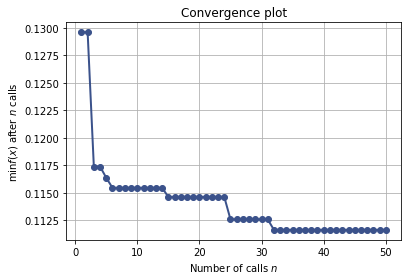

In [21]:
from skopt.plots import plot_convergence

plot_convergence(res_gp_hedge_auc)

In [27]:
model_gp_hedge_auc = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.95, gpu_cat_features_storage='CpuPinnedMemory', iterations=6000, eval_metric='AUC', grow_policy='Lossguide', border_count=255, use_best_model=True, random_strength=2, learning_rate=0.147315, l2_leaf_reg=3.892030, depth=7, max_leaves=20, min_data_in_leaf=9)
model_gp_hedge_auc.fit(train_pool, eval_set=valid_pool)
eval_metrics = model_gp_hedge_auc.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)

0:	learn: 0.6576693	test: 0.6485187	best: 0.6485187 (0)	total: 47.9ms	remaining: 4m 47s
1:	learn: 0.6992999	test: 0.6915737	best: 0.6915737 (1)	total: 92.6ms	remaining: 4m 37s
2:	learn: 0.7230991	test: 0.7139603	best: 0.7139603 (2)	total: 137ms	remaining: 4m 34s
3:	learn: 0.7380890	test: 0.7265239	best: 0.7265239 (3)	total: 182ms	remaining: 4m 32s
4:	learn: 0.7471123	test: 0.7352383	best: 0.7352383 (4)	total: 226ms	remaining: 4m 31s
5:	learn: 0.7599167	test: 0.7495615	best: 0.7495615 (5)	total: 277ms	remaining: 4m 36s
6:	learn: 0.7669556	test: 0.7558096	best: 0.7558096 (6)	total: 322ms	remaining: 4m 35s
7:	learn: 0.7747201	test: 0.7617179	best: 0.7617179 (7)	total: 370ms	remaining: 4m 36s
8:	learn: 0.7818008	test: 0.7683707	best: 0.7683707 (8)	total: 415ms	remaining: 4m 36s
9:	learn: 0.7905710	test: 0.7767668	best: 0.7767668 (9)	total: 462ms	remaining: 4m 36s
10:	learn: 0.7936147	test: 0.7794318	best: 0.7794318 (10)	total: 507ms	remaining: 4m 36s
11:	learn: 0.7983674	test: 0.7826607	be

96:	learn: 0.9130194	test: 0.8697666	best: 0.8697666 (96)	total: 4.56s	remaining: 4m 37s
97:	learn: 0.9133461	test: 0.8700282	best: 0.8700282 (97)	total: 4.6s	remaining: 4m 37s
98:	learn: 0.9136811	test: 0.8701758	best: 0.8701758 (98)	total: 4.65s	remaining: 4m 37s
99:	learn: 0.9141716	test: 0.8706486	best: 0.8706486 (99)	total: 4.69s	remaining: 4m 36s
100:	learn: 0.9147244	test: 0.8710936	best: 0.8710936 (100)	total: 4.74s	remaining: 4m 36s
101:	learn: 0.9151366	test: 0.8713093	best: 0.8713093 (101)	total: 4.79s	remaining: 4m 36s
102:	learn: 0.9156221	test: 0.8716435	best: 0.8716435 (102)	total: 4.83s	remaining: 4m 36s
103:	learn: 0.9160867	test: 0.8717998	best: 0.8717998 (103)	total: 4.88s	remaining: 4m 36s
104:	learn: 0.9164503	test: 0.8720075	best: 0.8720075 (104)	total: 4.93s	remaining: 4m 36s
105:	learn: 0.9167796	test: 0.8721265	best: 0.8721265 (105)	total: 4.97s	remaining: 4m 36s
106:	learn: 0.9171554	test: 0.8724626	best: 0.8724626 (106)	total: 5.02s	remaining: 4m 36s
107:	lea

190:	learn: 0.9395825	test: 0.8846761	best: 0.8846761 (190)	total: 8.98s	remaining: 4m 33s
191:	learn: 0.9397526	test: 0.8847230	best: 0.8847230 (191)	total: 9.03s	remaining: 4m 33s
192:	learn: 0.9399650	test: 0.8847515	best: 0.8847515 (192)	total: 9.08s	remaining: 4m 33s
193:	learn: 0.9401491	test: 0.8847513	best: 0.8847515 (192)	total: 9.13s	remaining: 4m 33s
194:	learn: 0.9403415	test: 0.8847868	best: 0.8847868 (194)	total: 9.18s	remaining: 4m 33s
195:	learn: 0.9404993	test: 0.8848799	best: 0.8848799 (195)	total: 9.22s	remaining: 4m 33s
196:	learn: 0.9407568	test: 0.8849222	best: 0.8849222 (196)	total: 9.27s	remaining: 4m 32s
197:	learn: 0.9409049	test: 0.8849312	best: 0.8849312 (197)	total: 9.32s	remaining: 4m 33s
198:	learn: 0.9410651	test: 0.8850636	best: 0.8850636 (198)	total: 9.36s	remaining: 4m 32s
199:	learn: 0.9412224	test: 0.8852302	best: 0.8852302 (199)	total: 9.41s	remaining: 4m 32s
200:	learn: 0.9413976	test: 0.8853204	best: 0.8853204 (200)	total: 9.45s	remaining: 4m 32s

285:	learn: 0.9533014	test: 0.8890247	best: 0.8890247 (285)	total: 13.4s	remaining: 4m 27s
286:	learn: 0.9533967	test: 0.8890614	best: 0.8890614 (286)	total: 13.4s	remaining: 4m 27s
287:	learn: 0.9535130	test: 0.8890654	best: 0.8890654 (287)	total: 13.5s	remaining: 4m 27s
288:	learn: 0.9536002	test: 0.8890795	best: 0.8890795 (288)	total: 13.5s	remaining: 4m 27s
289:	learn: 0.9537080	test: 0.8890710	best: 0.8890795 (288)	total: 13.6s	remaining: 4m 27s
290:	learn: 0.9538457	test: 0.8891155	best: 0.8891155 (290)	total: 13.6s	remaining: 4m 26s
291:	learn: 0.9539991	test: 0.8891699	best: 0.8891699 (291)	total: 13.7s	remaining: 4m 26s
292:	learn: 0.9540823	test: 0.8892098	best: 0.8892098 (292)	total: 13.7s	remaining: 4m 26s
293:	learn: 0.9541970	test: 0.8892927	best: 0.8892927 (293)	total: 13.7s	remaining: 4m 26s
294:	learn: 0.9543021	test: 0.8892643	best: 0.8892927 (293)	total: 13.8s	remaining: 4m 26s
295:	learn: 0.9544229	test: 0.8892784	best: 0.8892927 (293)	total: 13.8s	remaining: 4m 26s

376:	learn: 0.9632531	test: 0.8905742	best: 0.8905742 (376)	total: 17.6s	remaining: 4m 21s
377:	learn: 0.9633546	test: 0.8905541	best: 0.8905742 (376)	total: 17.6s	remaining: 4m 21s
378:	learn: 0.9634825	test: 0.8905315	best: 0.8905742 (376)	total: 17.6s	remaining: 4m 21s
379:	learn: 0.9635534	test: 0.8905115	best: 0.8905742 (376)	total: 17.7s	remaining: 4m 21s
380:	learn: 0.9636779	test: 0.8905159	best: 0.8905742 (376)	total: 17.7s	remaining: 4m 21s
381:	learn: 0.9637892	test: 0.8905934	best: 0.8905934 (381)	total: 17.8s	remaining: 4m 21s
382:	learn: 0.9638708	test: 0.8905949	best: 0.8905949 (382)	total: 17.8s	remaining: 4m 21s
383:	learn: 0.9639650	test: 0.8906008	best: 0.8906008 (383)	total: 17.9s	remaining: 4m 21s
384:	learn: 0.9640487	test: 0.8905677	best: 0.8906008 (383)	total: 17.9s	remaining: 4m 21s
385:	learn: 0.9641522	test: 0.8905113	best: 0.8906008 (383)	total: 18s	remaining: 4m 21s
386:	learn: 0.9642754	test: 0.8904417	best: 0.8906008 (383)	total: 18s	remaining: 4m 21s
387

470:	learn: 0.9725155	test: 0.8906050	best: 0.8906944 (463)	total: 21.8s	remaining: 4m 16s
471:	learn: 0.9725928	test: 0.8905831	best: 0.8906944 (463)	total: 21.9s	remaining: 4m 16s
472:	learn: 0.9726715	test: 0.8905918	best: 0.8906944 (463)	total: 21.9s	remaining: 4m 16s
473:	learn: 0.9727818	test: 0.8905482	best: 0.8906944 (463)	total: 22s	remaining: 4m 16s
474:	learn: 0.9728633	test: 0.8905177	best: 0.8906944 (463)	total: 22s	remaining: 4m 16s
475:	learn: 0.9729683	test: 0.8904762	best: 0.8906944 (463)	total: 22.1s	remaining: 4m 15s
476:	learn: 0.9730362	test: 0.8904722	best: 0.8906944 (463)	total: 22.1s	remaining: 4m 15s
477:	learn: 0.9731129	test: 0.8904918	best: 0.8906944 (463)	total: 22.1s	remaining: 4m 15s
478:	learn: 0.9731680	test: 0.8905370	best: 0.8906944 (463)	total: 22.2s	remaining: 4m 15s
479:	learn: 0.9732549	test: 0.8905125	best: 0.8906944 (463)	total: 22.2s	remaining: 4m 15s
480:	learn: 0.9733252	test: 0.8905146	best: 0.8906944 (463)	total: 22.3s	remaining: 4m 15s
481

564:	learn: 0.9797097	test: 0.8902822	best: 0.8906944 (463)	total: 26.1s	remaining: 4m 11s
565:	learn: 0.9797673	test: 0.8903068	best: 0.8906944 (463)	total: 26.2s	remaining: 4m 11s
566:	learn: 0.9798468	test: 0.8903220	best: 0.8906944 (463)	total: 26.2s	remaining: 4m 11s
567:	learn: 0.9799159	test: 0.8903380	best: 0.8906944 (463)	total: 26.3s	remaining: 4m 11s
568:	learn: 0.9799978	test: 0.8903236	best: 0.8906944 (463)	total: 26.3s	remaining: 4m 11s
569:	learn: 0.9800533	test: 0.8903303	best: 0.8906944 (463)	total: 26.4s	remaining: 4m 11s
570:	learn: 0.9800984	test: 0.8902944	best: 0.8906944 (463)	total: 26.4s	remaining: 4m 11s
571:	learn: 0.9801636	test: 0.8903328	best: 0.8906944 (463)	total: 26.4s	remaining: 4m 11s
572:	learn: 0.9802531	test: 0.8903303	best: 0.8906944 (463)	total: 26.5s	remaining: 4m 10s
573:	learn: 0.9803202	test: 0.8903764	best: 0.8906944 (463)	total: 26.5s	remaining: 4m 10s
574:	learn: 0.9803692	test: 0.8903788	best: 0.8906944 (463)	total: 26.6s	remaining: 4m 10s

657:	learn: 0.9852737	test: 0.8898343	best: 0.8906944 (463)	total: 30.4s	remaining: 4m 6s
658:	learn: 0.9853163	test: 0.8898277	best: 0.8906944 (463)	total: 30.4s	remaining: 4m 6s
659:	learn: 0.9853786	test: 0.8897658	best: 0.8906944 (463)	total: 30.5s	remaining: 4m 6s
660:	learn: 0.9854279	test: 0.8897457	best: 0.8906944 (463)	total: 30.5s	remaining: 4m 6s
661:	learn: 0.9854775	test: 0.8897169	best: 0.8906944 (463)	total: 30.5s	remaining: 4m 6s
662:	learn: 0.9855109	test: 0.8897195	best: 0.8906944 (463)	total: 30.6s	remaining: 4m 6s
663:	learn: 0.9855615	test: 0.8897094	best: 0.8906944 (463)	total: 30.6s	remaining: 4m 6s
664:	learn: 0.9856199	test: 0.8896900	best: 0.8906944 (463)	total: 30.7s	remaining: 4m 6s
665:	learn: 0.9856598	test: 0.8896236	best: 0.8906944 (463)	total: 30.7s	remaining: 4m 6s
666:	learn: 0.9857132	test: 0.8895945	best: 0.8906944 (463)	total: 30.8s	remaining: 4m 6s
667:	learn: 0.9857427	test: 0.8896164	best: 0.8906944 (463)	total: 30.8s	remaining: 4m 6s
668:	learn

750:	learn: 0.9893506	test: 0.8887010	best: 0.8906944 (463)	total: 34.6s	remaining: 4m 1s
751:	learn: 0.9893942	test: 0.8886973	best: 0.8906944 (463)	total: 34.6s	remaining: 4m 1s
752:	learn: 0.9894212	test: 0.8886778	best: 0.8906944 (463)	total: 34.7s	remaining: 4m 1s
753:	learn: 0.9894705	test: 0.8886673	best: 0.8906944 (463)	total: 34.7s	remaining: 4m 1s
754:	learn: 0.9895072	test: 0.8886723	best: 0.8906944 (463)	total: 34.8s	remaining: 4m 1s
755:	learn: 0.9895518	test: 0.8885353	best: 0.8906944 (463)	total: 34.8s	remaining: 4m 1s
756:	learn: 0.9895826	test: 0.8885441	best: 0.8906944 (463)	total: 34.9s	remaining: 4m 1s
757:	learn: 0.9896150	test: 0.8885229	best: 0.8906944 (463)	total: 34.9s	remaining: 4m 1s
758:	learn: 0.9896524	test: 0.8885531	best: 0.8906944 (463)	total: 35s	remaining: 4m 1s
759:	learn: 0.9896795	test: 0.8885270	best: 0.8906944 (463)	total: 35s	remaining: 4m 1s
760:	learn: 0.9897464	test: 0.8885155	best: 0.8906944 (463)	total: 35.1s	remaining: 4m 1s
761:	learn: 0.

843:	learn: 0.9926144	test: 0.8881574	best: 0.8906944 (463)	total: 38.8s	remaining: 3m 57s
844:	learn: 0.9926432	test: 0.8881667	best: 0.8906944 (463)	total: 38.9s	remaining: 3m 57s
845:	learn: 0.9926839	test: 0.8881488	best: 0.8906944 (463)	total: 38.9s	remaining: 3m 57s
846:	learn: 0.9927201	test: 0.8881002	best: 0.8906944 (463)	total: 39s	remaining: 3m 57s
847:	learn: 0.9927438	test: 0.8880776	best: 0.8906944 (463)	total: 39s	remaining: 3m 56s
848:	learn: 0.9927717	test: 0.8880645	best: 0.8906944 (463)	total: 39s	remaining: 3m 56s
849:	learn: 0.9927908	test: 0.8880606	best: 0.8906944 (463)	total: 39.1s	remaining: 3m 56s
850:	learn: 0.9928055	test: 0.8880467	best: 0.8906944 (463)	total: 39.1s	remaining: 3m 56s
851:	learn: 0.9928270	test: 0.8880283	best: 0.8906944 (463)	total: 39.2s	remaining: 3m 56s
852:	learn: 0.9928520	test: 0.8880098	best: 0.8906944 (463)	total: 39.2s	remaining: 3m 56s
853:	learn: 0.9928871	test: 0.8880027	best: 0.8906944 (463)	total: 39.3s	remaining: 3m 56s
854:	

938:	learn: 0.9950750	test: 0.8876392	best: 0.8906944 (463)	total: 43.1s	remaining: 3m 52s
939:	learn: 0.9950922	test: 0.8876407	best: 0.8906944 (463)	total: 43.1s	remaining: 3m 52s
940:	learn: 0.9951275	test: 0.8876218	best: 0.8906944 (463)	total: 43.2s	remaining: 3m 52s
941:	learn: 0.9951469	test: 0.8876098	best: 0.8906944 (463)	total: 43.2s	remaining: 3m 52s
942:	learn: 0.9951679	test: 0.8876003	best: 0.8906944 (463)	total: 43.3s	remaining: 3m 52s
943:	learn: 0.9951846	test: 0.8875855	best: 0.8906944 (463)	total: 43.3s	remaining: 3m 52s
944:	learn: 0.9952049	test: 0.8875846	best: 0.8906944 (463)	total: 43.4s	remaining: 3m 52s
945:	learn: 0.9952313	test: 0.8876161	best: 0.8906944 (463)	total: 43.4s	remaining: 3m 51s
946:	learn: 0.9952540	test: 0.8876008	best: 0.8906944 (463)	total: 43.5s	remaining: 3m 51s
947:	learn: 0.9952847	test: 0.8875946	best: 0.8906944 (463)	total: 43.5s	remaining: 3m 51s
948:	learn: 0.9953068	test: 0.8875808	best: 0.8906944 (463)	total: 43.5s	remaining: 3m 51s

1032:	learn: 0.9966754	test: 0.8873847	best: 0.8906944 (463)	total: 47.3s	remaining: 3m 47s
1033:	learn: 0.9966945	test: 0.8873655	best: 0.8906944 (463)	total: 47.4s	remaining: 3m 47s
1034:	learn: 0.9967182	test: 0.8873764	best: 0.8906944 (463)	total: 47.4s	remaining: 3m 47s
1035:	learn: 0.9967273	test: 0.8873423	best: 0.8906944 (463)	total: 47.5s	remaining: 3m 47s
1036:	learn: 0.9967389	test: 0.8873761	best: 0.8906944 (463)	total: 47.5s	remaining: 3m 47s
1037:	learn: 0.9967566	test: 0.8873846	best: 0.8906944 (463)	total: 47.5s	remaining: 3m 47s
1038:	learn: 0.9967678	test: 0.8873902	best: 0.8906944 (463)	total: 47.6s	remaining: 3m 47s
1039:	learn: 0.9967794	test: 0.8873964	best: 0.8906944 (463)	total: 47.6s	remaining: 3m 47s
1040:	learn: 0.9967953	test: 0.8874093	best: 0.8906944 (463)	total: 47.7s	remaining: 3m 47s
1041:	learn: 0.9968040	test: 0.8873803	best: 0.8906944 (463)	total: 47.7s	remaining: 3m 47s
1042:	learn: 0.9968184	test: 0.8873352	best: 0.8906944 (463)	total: 47.8s	remain

1123:	learn: 0.9977333	test: 0.8870016	best: 0.8906944 (463)	total: 51.5s	remaining: 3m 43s
1124:	learn: 0.9977413	test: 0.8870170	best: 0.8906944 (463)	total: 51.5s	remaining: 3m 43s
1125:	learn: 0.9977507	test: 0.8870091	best: 0.8906944 (463)	total: 51.6s	remaining: 3m 43s
1126:	learn: 0.9977597	test: 0.8869770	best: 0.8906944 (463)	total: 51.6s	remaining: 3m 43s
1127:	learn: 0.9977679	test: 0.8869859	best: 0.8906944 (463)	total: 51.7s	remaining: 3m 43s
1128:	learn: 0.9977785	test: 0.8870619	best: 0.8906944 (463)	total: 51.7s	remaining: 3m 43s
1129:	learn: 0.9977932	test: 0.8870638	best: 0.8906944 (463)	total: 51.8s	remaining: 3m 43s
1130:	learn: 0.9978077	test: 0.8870853	best: 0.8906944 (463)	total: 51.8s	remaining: 3m 43s
1131:	learn: 0.9978210	test: 0.8871317	best: 0.8906944 (463)	total: 51.8s	remaining: 3m 42s
1132:	learn: 0.9978261	test: 0.8871301	best: 0.8906944 (463)	total: 51.9s	remaining: 3m 42s
1133:	learn: 0.9978345	test: 0.8871119	best: 0.8906944 (463)	total: 51.9s	remain

1217:	learn: 0.9985393	test: 0.8863452	best: 0.8906944 (463)	total: 55.7s	remaining: 3m 38s
1218:	learn: 0.9985428	test: 0.8863448	best: 0.8906944 (463)	total: 55.7s	remaining: 3m 38s
1219:	learn: 0.9985512	test: 0.8863728	best: 0.8906944 (463)	total: 55.8s	remaining: 3m 38s
1220:	learn: 0.9985654	test: 0.8863658	best: 0.8906944 (463)	total: 55.8s	remaining: 3m 38s
1221:	learn: 0.9985690	test: 0.8863800	best: 0.8906944 (463)	total: 55.9s	remaining: 3m 38s
1222:	learn: 0.9985743	test: 0.8863432	best: 0.8906944 (463)	total: 55.9s	remaining: 3m 38s
1223:	learn: 0.9985797	test: 0.8863160	best: 0.8906944 (463)	total: 56s	remaining: 3m 38s
1224:	learn: 0.9985833	test: 0.8862929	best: 0.8906944 (463)	total: 56s	remaining: 3m 38s
1225:	learn: 0.9985915	test: 0.8862727	best: 0.8906944 (463)	total: 56.1s	remaining: 3m 38s
1226:	learn: 0.9985968	test: 0.8863129	best: 0.8906944 (463)	total: 56.1s	remaining: 3m 38s
1227:	learn: 0.9986005	test: 0.8863175	best: 0.8906944 (463)	total: 56.1s	remaining:

1307:	learn: 0.9990303	test: 0.8860939	best: 0.8906944 (463)	total: 59.7s	remaining: 3m 34s
1308:	learn: 0.9990326	test: 0.8860752	best: 0.8906944 (463)	total: 59.8s	remaining: 3m 34s
1309:	learn: 0.9990371	test: 0.8860805	best: 0.8906944 (463)	total: 59.8s	remaining: 3m 34s
1310:	learn: 0.9990402	test: 0.8860590	best: 0.8906944 (463)	total: 59.9s	remaining: 3m 34s
1311:	learn: 0.9990468	test: 0.8860585	best: 0.8906944 (463)	total: 59.9s	remaining: 3m 34s
1312:	learn: 0.9990537	test: 0.8860293	best: 0.8906944 (463)	total: 60s	remaining: 3m 34s
1313:	learn: 0.9990585	test: 0.8860381	best: 0.8906944 (463)	total: 1m	remaining: 3m 34s
1314:	learn: 0.9990603	test: 0.8860403	best: 0.8906944 (463)	total: 1m	remaining: 3m 33s
1315:	learn: 0.9990620	test: 0.8860575	best: 0.8906944 (463)	total: 1m	remaining: 3m 33s
1316:	learn: 0.9990686	test: 0.8860639	best: 0.8906944 (463)	total: 1m	remaining: 3m 33s
1317:	learn: 0.9990699	test: 0.8860197	best: 0.8906944 (463)	total: 1m	remaining: 3m 33s
1318:

1397:	learn: 0.9993607	test: 0.8857121	best: 0.8906944 (463)	total: 1m 3s	remaining: 3m 30s
1398:	learn: 0.9993654	test: 0.8856806	best: 0.8906944 (463)	total: 1m 3s	remaining: 3m 30s
1399:	learn: 0.9993683	test: 0.8856965	best: 0.8906944 (463)	total: 1m 3s	remaining: 3m 30s
1400:	learn: 0.9993703	test: 0.8857208	best: 0.8906944 (463)	total: 1m 3s	remaining: 3m 30s
1401:	learn: 0.9993727	test: 0.8857092	best: 0.8906944 (463)	total: 1m 4s	remaining: 3m 30s
1402:	learn: 0.9993754	test: 0.8856955	best: 0.8906944 (463)	total: 1m 4s	remaining: 3m 29s
1403:	learn: 0.9993775	test: 0.8856809	best: 0.8906944 (463)	total: 1m 4s	remaining: 3m 29s
1404:	learn: 0.9993804	test: 0.8856716	best: 0.8906944 (463)	total: 1m 4s	remaining: 3m 29s
1405:	learn: 0.9993846	test: 0.8856583	best: 0.8906944 (463)	total: 1m 4s	remaining: 3m 29s
1406:	learn: 0.9993877	test: 0.8856562	best: 0.8906944 (463)	total: 1m 4s	remaining: 3m 29s
1407:	learn: 0.9993916	test: 0.8856700	best: 0.8906944 (463)	total: 1m 4s	remain

1491:	learn: 0.9995664	test: 0.8856886	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1492:	learn: 0.9995689	test: 0.8856672	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1493:	learn: 0.9995712	test: 0.8856987	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1494:	learn: 0.9995717	test: 0.8856936	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1495:	learn: 0.9995733	test: 0.8856726	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1496:	learn: 0.9995766	test: 0.8856574	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1497:	learn: 0.9995771	test: 0.8856435	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1498:	learn: 0.9995790	test: 0.8856549	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1499:	learn: 0.9995795	test: 0.8856490	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1500:	learn: 0.9995816	test: 0.8856881	best: 0.8906944 (463)	total: 1m 8s	remaining: 3m 25s
1501:	learn: 0.9995823	test: 0.8856764	best: 0.8906944 (463)	total: 1m 8s	remain

1582:	learn: 0.9997132	test: 0.8855511	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1583:	learn: 0.9997146	test: 0.8855404	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1584:	learn: 0.9997163	test: 0.8855237	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1585:	learn: 0.9997187	test: 0.8855293	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1586:	learn: 0.9997203	test: 0.8855173	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1587:	learn: 0.9997236	test: 0.8855304	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1588:	learn: 0.9997243	test: 0.8855155	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1589:	learn: 0.9997258	test: 0.8855434	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1590:	learn: 0.9997266	test: 0.8855422	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1591:	learn: 0.9997272	test: 0.8855503	best: 0.8906944 (463)	total: 1m 12s	remaining: 3m 21s
1592:	learn: 0.9997283	test: 0.8855432	best: 0.8906944 (463)	total: 1m

1671:	learn: 0.9998302	test: 0.8855667	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 18s
1672:	learn: 0.9998313	test: 0.8855526	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 18s
1673:	learn: 0.9998317	test: 0.8855403	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1674:	learn: 0.9998316	test: 0.8855424	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1675:	learn: 0.9998347	test: 0.8855506	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1676:	learn: 0.9998353	test: 0.8855461	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1677:	learn: 0.9998357	test: 0.8855742	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1678:	learn: 0.9998366	test: 0.8855725	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1679:	learn: 0.9998381	test: 0.8855605	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1680:	learn: 0.9998382	test: 0.8855495	best: 0.8906944 (463)	total: 1m 16s	remaining: 3m 17s
1681:	learn: 0.9998391	test: 0.8855702	best: 0.8906944 (463)	total: 1m

1763:	learn: 0.9998892	test: 0.8852513	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1764:	learn: 0.9998891	test: 0.8852427	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1765:	learn: 0.9998909	test: 0.8852262	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1766:	learn: 0.9998911	test: 0.8852234	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1767:	learn: 0.9998915	test: 0.8852372	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1768:	learn: 0.9998915	test: 0.8852388	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1769:	learn: 0.9998927	test: 0.8852283	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1770:	learn: 0.9998935	test: 0.8852404	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1771:	learn: 0.9998940	test: 0.8852364	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1772:	learn: 0.9998944	test: 0.8852566	best: 0.8906944 (463)	total: 1m 21s	remaining: 3m 15s
1773:	learn: 0.9998968	test: 0.8852804	best: 0.8906944 (463)	total: 1m

1853:	learn: 0.9999322	test: 0.8853471	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1854:	learn: 0.9999323	test: 0.8853176	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1855:	learn: 0.9999323	test: 0.8853268	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1856:	learn: 0.9999334	test: 0.8853346	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1857:	learn: 0.9999334	test: 0.8853422	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1858:	learn: 0.9999335	test: 0.8853123	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1859:	learn: 0.9999344	test: 0.8852978	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1860:	learn: 0.9999346	test: 0.8853067	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1861:	learn: 0.9999399	test: 0.8853027	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1862:	learn: 0.9999408	test: 0.8853032	best: 0.8906944 (463)	total: 1m 26s	remaining: 3m 12s
1863:	learn: 0.9999408	test: 0.8852691	best: 0.8906944 (463)	total: 1m

1944:	learn: 0.9999589	test: 0.8853154	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1945:	learn: 0.9999588	test: 0.8852994	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1946:	learn: 0.9999592	test: 0.8852853	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1947:	learn: 0.9999592	test: 0.8852776	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1948:	learn: 0.9999598	test: 0.8852885	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1949:	learn: 0.9999601	test: 0.8853057	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1950:	learn: 0.9999602	test: 0.8852880	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1951:	learn: 0.9999610	test: 0.8852826	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1952:	learn: 0.9999624	test: 0.8852655	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1953:	learn: 0.9999623	test: 0.8852871	best: 0.8906944 (463)	total: 1m 30s	remaining: 3m 8s
1954:	learn: 0.9999638	test: 0.8852848	best: 0.8906944 (463)	total: 1m 30s	remai

2035:	learn: 0.9999823	test: 0.8851635	best: 0.8906944 (463)	total: 1m 34s	remaining: 3m 4s
2036:	learn: 0.9999828	test: 0.8851577	best: 0.8906944 (463)	total: 1m 34s	remaining: 3m 4s
2037:	learn: 0.9999828	test: 0.8851520	best: 0.8906944 (463)	total: 1m 34s	remaining: 3m 4s
2038:	learn: 0.9999828	test: 0.8851604	best: 0.8906944 (463)	total: 1m 34s	remaining: 3m 4s
2039:	learn: 0.9999828	test: 0.8851956	best: 0.8906944 (463)	total: 1m 34s	remaining: 3m 4s
2040:	learn: 0.9999828	test: 0.8851988	best: 0.8906944 (463)	total: 1m 34s	remaining: 3m 4s
2041:	learn: 0.9999830	test: 0.8852008	best: 0.8906944 (463)	total: 1m 35s	remaining: 3m 4s
2042:	learn: 0.9999829	test: 0.8852008	best: 0.8906944 (463)	total: 1m 35s	remaining: 3m 4s
2043:	learn: 0.9999828	test: 0.8852176	best: 0.8906944 (463)	total: 1m 35s	remaining: 3m 4s
2044:	learn: 0.9999829	test: 0.8851822	best: 0.8906944 (463)	total: 1m 35s	remaining: 3m 3s
2045:	learn: 0.9999838	test: 0.8851796	best: 0.8906944 (463)	total: 1m 35s	remai

2125:	learn: 0.9999945	test: 0.8849051	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2126:	learn: 0.9999948	test: 0.8849007	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2127:	learn: 0.9999948	test: 0.8848841	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2128:	learn: 0.9999948	test: 0.8848891	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2129:	learn: 0.9999948	test: 0.8848761	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2130:	learn: 0.9999948	test: 0.8848883	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2131:	learn: 0.9999948	test: 0.8848975	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2132:	learn: 0.9999949	test: 0.8848981	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2133:	learn: 0.9999949	test: 0.8848719	best: 0.8906944 (463)	total: 1m 39s	remaining: 3m
2134:	learn: 0.9999949	test: 0.8848893	best: 0.8906944 (463)	total: 1m 39s	remaining: 2m 59s
2135:	learn: 0.9999949	test: 0.8848912	best: 0.8906944 (463)	total: 1m 39s	remaining: 2m 59s
2136:	learn: 

2216:	learn: 0.9999991	test: 0.8850222	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 56s
2217:	learn: 0.9999991	test: 0.8850377	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 56s
2218:	learn: 0.9999992	test: 0.8850450	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2219:	learn: 0.9999992	test: 0.8850492	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2220:	learn: 0.9999992	test: 0.8850603	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2221:	learn: 0.9999992	test: 0.8850281	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2222:	learn: 0.9999992	test: 0.8850439	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2223:	learn: 0.9999992	test: 0.8850158	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2224:	learn: 0.9999993	test: 0.8850210	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2225:	learn: 0.9999993	test: 0.8850382	best: 0.8906944 (463)	total: 1m 43s	remaining: 2m 55s
2226:	learn: 0.9999993	test: 0.8850359	best: 0.8906944 (463)	total: 1m

2307:	learn: 0.9999998	test: 0.8849908	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 52s
2308:	learn: 0.9999998	test: 0.8849871	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2309:	learn: 0.9999998	test: 0.8849694	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2310:	learn: 0.9999998	test: 0.8849536	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2311:	learn: 0.9999998	test: 0.8849234	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2312:	learn: 0.9999998	test: 0.8849236	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2313:	learn: 0.9999998	test: 0.8849228	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2314:	learn: 0.9999998	test: 0.8849353	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2315:	learn: 0.9999998	test: 0.8849254	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2316:	learn: 0.9999998	test: 0.8849246	best: 0.8906944 (463)	total: 1m 47s	remaining: 2m 51s
2317:	learn: 0.9999999	test: 0.8849555	best: 0.8906944 (463)	total: 1m

2396:	learn: 1.0000000	test: 0.8848701	best: 0.8906944 (463)	total: 1m 51s	remaining: 2m 48s
2397:	learn: 1.0000000	test: 0.8848750	best: 0.8906944 (463)	total: 1m 51s	remaining: 2m 47s
2398:	learn: 1.0000000	test: 0.8848591	best: 0.8906944 (463)	total: 1m 51s	remaining: 2m 47s
2399:	learn: 1.0000000	test: 0.8848768	best: 0.8906944 (463)	total: 1m 51s	remaining: 2m 47s
2400:	learn: 1.0000000	test: 0.8848923	best: 0.8906944 (463)	total: 1m 51s	remaining: 2m 47s
2401:	learn: 1.0000000	test: 0.8848914	best: 0.8906944 (463)	total: 1m 52s	remaining: 2m 47s
2402:	learn: 1.0000000	test: 0.8849128	best: 0.8906944 (463)	total: 1m 52s	remaining: 2m 47s
2403:	learn: 1.0000000	test: 0.8849169	best: 0.8906944 (463)	total: 1m 52s	remaining: 2m 47s
2404:	learn: 1.0000000	test: 0.8849242	best: 0.8906944 (463)	total: 1m 52s	remaining: 2m 47s
2405:	learn: 1.0000000	test: 0.8849491	best: 0.8906944 (463)	total: 1m 52s	remaining: 2m 47s
2406:	learn: 1.0000000	test: 0.8849802	best: 0.8906944 (463)	total: 1m

2485:	learn: 1.0000000	test: 0.8852137	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 44s
2486:	learn: 1.0000000	test: 0.8852450	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 44s
2487:	learn: 1.0000000	test: 0.8852530	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2488:	learn: 1.0000000	test: 0.8852557	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2489:	learn: 1.0000000	test: 0.8852484	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2490:	learn: 1.0000000	test: 0.8852510	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2491:	learn: 1.0000000	test: 0.8852363	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2492:	learn: 1.0000000	test: 0.8852491	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2493:	learn: 1.0000000	test: 0.8852760	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2494:	learn: 1.0000000	test: 0.8852833	best: 0.8906944 (463)	total: 1m 56s	remaining: 2m 43s
2495:	learn: 1.0000000	test: 0.8852898	best: 0.8906944 (463)	total: 1m

2577:	learn: 1.0000000	test: 0.8852651	best: 0.8906944 (463)	total: 2m	remaining: 2m 40s
2578:	learn: 1.0000000	test: 0.8852729	best: 0.8906944 (463)	total: 2m	remaining: 2m 40s
2579:	learn: 1.0000000	test: 0.8852763	best: 0.8906944 (463)	total: 2m	remaining: 2m 39s
2580:	learn: 1.0000000	test: 0.8852477	best: 0.8906944 (463)	total: 2m	remaining: 2m 39s
2581:	learn: 1.0000000	test: 0.8852531	best: 0.8906944 (463)	total: 2m	remaining: 2m 39s
2582:	learn: 1.0000000	test: 0.8852577	best: 0.8906944 (463)	total: 2m	remaining: 2m 39s
2583:	learn: 1.0000000	test: 0.8852571	best: 0.8906944 (463)	total: 2m	remaining: 2m 39s
2584:	learn: 1.0000000	test: 0.8852307	best: 0.8906944 (463)	total: 2m	remaining: 2m 39s
2585:	learn: 1.0000000	test: 0.8852330	best: 0.8906944 (463)	total: 2m	remaining: 2m 39s
2586:	learn: 1.0000000	test: 0.8852197	best: 0.8906944 (463)	total: 2m 1s	remaining: 2m 39s
2587:	learn: 1.0000000	test: 0.8852472	best: 0.8906944 (463)	total: 2m 1s	remaining: 2m 39s
2588:	learn: 1.

2668:	learn: 1.0000000	test: 0.8853073	best: 0.8906944 (463)	total: 2m 4s	remaining: 2m 35s
2669:	learn: 1.0000000	test: 0.8852913	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2670:	learn: 1.0000000	test: 0.8852875	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2671:	learn: 1.0000000	test: 0.8852878	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2672:	learn: 1.0000000	test: 0.8852763	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2673:	learn: 1.0000000	test: 0.8852652	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2674:	learn: 1.0000000	test: 0.8852680	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2675:	learn: 1.0000000	test: 0.8852550	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2676:	learn: 1.0000000	test: 0.8852408	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2677:	learn: 1.0000000	test: 0.8852671	best: 0.8906944 (463)	total: 2m 5s	remaining: 2m 35s
2678:	learn: 1.0000000	test: 0.8852796	best: 0.8906944 (463)	total: 2m 5s	remain

2759:	learn: 1.0000000	test: 0.8852096	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2760:	learn: 1.0000000	test: 0.8852103	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2761:	learn: 1.0000000	test: 0.8852188	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2762:	learn: 1.0000000	test: 0.8852072	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2763:	learn: 1.0000000	test: 0.8852052	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2764:	learn: 1.0000000	test: 0.8851998	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2765:	learn: 1.0000000	test: 0.8851888	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2766:	learn: 1.0000000	test: 0.8851991	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2767:	learn: 1.0000000	test: 0.8851895	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2768:	learn: 1.0000000	test: 0.8851997	best: 0.8906944 (463)	total: 2m 9s	remaining: 2m 31s
2769:	learn: 1.0000000	test: 0.8852240	best: 0.8906944 (463)	total: 2m 9s	remain

2848:	learn: 1.0000000	test: 0.8851441	best: 0.8906944 (463)	total: 2m 13s	remaining: 2m 27s
2849:	learn: 1.0000000	test: 0.8851720	best: 0.8906944 (463)	total: 2m 13s	remaining: 2m 27s
2850:	learn: 1.0000000	test: 0.8851539	best: 0.8906944 (463)	total: 2m 13s	remaining: 2m 27s
2851:	learn: 1.0000000	test: 0.8851592	best: 0.8906944 (463)	total: 2m 13s	remaining: 2m 27s
2852:	learn: 1.0000000	test: 0.8851485	best: 0.8906944 (463)	total: 2m 13s	remaining: 2m 27s
2853:	learn: 1.0000000	test: 0.8851640	best: 0.8906944 (463)	total: 2m 13s	remaining: 2m 27s
2854:	learn: 1.0000000	test: 0.8851716	best: 0.8906944 (463)	total: 2m 14s	remaining: 2m 27s
2855:	learn: 1.0000000	test: 0.8851585	best: 0.8906944 (463)	total: 2m 14s	remaining: 2m 27s
2856:	learn: 1.0000000	test: 0.8851668	best: 0.8906944 (463)	total: 2m 14s	remaining: 2m 27s
2857:	learn: 1.0000000	test: 0.8851547	best: 0.8906944 (463)	total: 2m 14s	remaining: 2m 27s
2858:	learn: 1.0000000	test: 0.8851491	best: 0.8906944 (463)	total: 2m

2937:	learn: 1.0000000	test: 0.8849741	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2938:	learn: 1.0000000	test: 0.8849887	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2939:	learn: 1.0000000	test: 0.8850056	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2940:	learn: 1.0000000	test: 0.8849919	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2941:	learn: 1.0000000	test: 0.8849941	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2942:	learn: 1.0000000	test: 0.8849679	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2943:	learn: 1.0000000	test: 0.8849475	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2944:	learn: 1.0000000	test: 0.8849281	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2945:	learn: 1.0000000	test: 0.8849596	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2946:	learn: 1.0000000	test: 0.8849741	best: 0.8906944 (463)	total: 2m 18s	remaining: 2m 23s
2947:	learn: 1.0000000	test: 0.8849631	best: 0.8906944 (463)	total: 2m

3027:	learn: 1.0000000	test: 0.8850421	best: 0.8906944 (463)	total: 2m 22s	remaining: 2m 20s
3028:	learn: 1.0000000	test: 0.8850561	best: 0.8906944 (463)	total: 2m 22s	remaining: 2m 20s
3029:	learn: 1.0000000	test: 0.8850380	best: 0.8906944 (463)	total: 2m 22s	remaining: 2m 19s
3030:	learn: 1.0000000	test: 0.8850456	best: 0.8906944 (463)	total: 2m 22s	remaining: 2m 19s
3031:	learn: 1.0000000	test: 0.8850291	best: 0.8906944 (463)	total: 2m 22s	remaining: 2m 19s
3032:	learn: 1.0000000	test: 0.8850303	best: 0.8906944 (463)	total: 2m 22s	remaining: 2m 19s
3033:	learn: 1.0000000	test: 0.8850404	best: 0.8906944 (463)	total: 2m 23s	remaining: 2m 19s
3034:	learn: 1.0000000	test: 0.8850340	best: 0.8906944 (463)	total: 2m 23s	remaining: 2m 19s
3035:	learn: 1.0000000	test: 0.8850418	best: 0.8906944 (463)	total: 2m 23s	remaining: 2m 19s
3036:	learn: 1.0000000	test: 0.8850408	best: 0.8906944 (463)	total: 2m 23s	remaining: 2m 19s
3037:	learn: 1.0000000	test: 0.8850455	best: 0.8906944 (463)	total: 2m

3117:	learn: 1.0000000	test: 0.8851150	best: 0.8906944 (463)	total: 2m 26s	remaining: 2m 15s
3118:	learn: 1.0000000	test: 0.8851101	best: 0.8906944 (463)	total: 2m 26s	remaining: 2m 15s
3119:	learn: 1.0000000	test: 0.8850937	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3120:	learn: 1.0000000	test: 0.8851013	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3121:	learn: 1.0000000	test: 0.8851043	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3122:	learn: 1.0000000	test: 0.8850878	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3123:	learn: 1.0000000	test: 0.8850994	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3124:	learn: 1.0000000	test: 0.8851268	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3125:	learn: 1.0000000	test: 0.8851170	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3126:	learn: 1.0000000	test: 0.8851015	best: 0.8906944 (463)	total: 2m 27s	remaining: 2m 15s
3127:	learn: 1.0000000	test: 0.8850852	best: 0.8906944 (463)	total: 2m

3208:	learn: 1.0000000	test: 0.8850825	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3209:	learn: 1.0000000	test: 0.8850832	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3210:	learn: 1.0000000	test: 0.8851066	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3211:	learn: 1.0000000	test: 0.8851062	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3212:	learn: 1.0000000	test: 0.8851143	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3213:	learn: 1.0000000	test: 0.8851195	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3214:	learn: 1.0000000	test: 0.8851189	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3215:	learn: 1.0000000	test: 0.8851120	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3216:	learn: 1.0000000	test: 0.8851134	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3217:	learn: 1.0000000	test: 0.8851142	best: 0.8906944 (463)	total: 2m 31s	remaining: 2m 11s
3218:	learn: 1.0000000	test: 0.8851166	best: 0.8906944 (463)	total: 2m

3301:	learn: 1.0000000	test: 0.8851885	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 7s
3302:	learn: 1.0000000	test: 0.8852004	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 7s
3303:	learn: 1.0000000	test: 0.8852201	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3304:	learn: 1.0000000	test: 0.8852249	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3305:	learn: 1.0000000	test: 0.8852476	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3306:	learn: 1.0000000	test: 0.8852572	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3307:	learn: 1.0000000	test: 0.8852419	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3308:	learn: 1.0000000	test: 0.8852336	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3309:	learn: 1.0000000	test: 0.8852323	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3310:	learn: 1.0000000	test: 0.8852221	best: 0.8906944 (463)	total: 2m 35s	remaining: 2m 6s
3311:	learn: 1.0000000	test: 0.8852260	best: 0.8906944 (463)	total: 2m 35s	remai

3394:	learn: 1.0000000	test: 0.8853617	best: 0.8906944 (463)	total: 2m 39s	remaining: 2m 2s
3395:	learn: 1.0000000	test: 0.8853752	best: 0.8906944 (463)	total: 2m 39s	remaining: 2m 2s
3396:	learn: 1.0000000	test: 0.8853781	best: 0.8906944 (463)	total: 2m 39s	remaining: 2m 2s
3397:	learn: 1.0000000	test: 0.8853705	best: 0.8906944 (463)	total: 2m 40s	remaining: 2m 2s
3398:	learn: 1.0000000	test: 0.8853610	best: 0.8906944 (463)	total: 2m 40s	remaining: 2m 2s
3399:	learn: 1.0000000	test: 0.8853502	best: 0.8906944 (463)	total: 2m 40s	remaining: 2m 2s
3400:	learn: 1.0000000	test: 0.8853495	best: 0.8906944 (463)	total: 2m 40s	remaining: 2m 2s
3401:	learn: 1.0000000	test: 0.8853430	best: 0.8906944 (463)	total: 2m 40s	remaining: 2m 2s
3402:	learn: 1.0000000	test: 0.8853626	best: 0.8906944 (463)	total: 2m 40s	remaining: 2m 2s
3403:	learn: 1.0000000	test: 0.8853689	best: 0.8906944 (463)	total: 2m 40s	remaining: 2m 2s
3404:	learn: 1.0000000	test: 0.8853634	best: 0.8906944 (463)	total: 2m 40s	remai

3485:	learn: 1.0000000	test: 0.8855194	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3486:	learn: 1.0000000	test: 0.8855110	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3487:	learn: 1.0000000	test: 0.8854945	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3488:	learn: 1.0000000	test: 0.8855008	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3489:	learn: 1.0000000	test: 0.8855090	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3490:	learn: 1.0000000	test: 0.8854966	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3491:	learn: 1.0000000	test: 0.8854948	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3492:	learn: 1.0000000	test: 0.8855094	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3493:	learn: 1.0000000	test: 0.8855153	best: 0.8906944 (463)	total: 2m 44s	remaining: 1m 58s
3494:	learn: 1.0000000	test: 0.8855087	best: 0.8906944 (463)	total: 2m 45s	remaining: 1m 58s
3495:	learn: 1.0000000	test: 0.8855343	best: 0.8906944 (463)	total: 2m

3575:	learn: 1.0000000	test: 0.8854839	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3576:	learn: 1.0000000	test: 0.8854725	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3577:	learn: 1.0000000	test: 0.8854756	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3578:	learn: 1.0000000	test: 0.8854878	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3579:	learn: 1.0000000	test: 0.8854842	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3580:	learn: 1.0000000	test: 0.8854828	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3581:	learn: 1.0000000	test: 0.8854961	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3582:	learn: 1.0000000	test: 0.8855154	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3583:	learn: 1.0000000	test: 0.8854992	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3584:	learn: 1.0000000	test: 0.8855068	best: 0.8906944 (463)	total: 2m 49s	remaining: 1m 54s
3585:	learn: 1.0000000	test: 0.8855127	best: 0.8906944 (463)	total: 2m

3666:	learn: 1.0000000	test: 0.8856409	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3667:	learn: 1.0000000	test: 0.8856449	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3668:	learn: 1.0000000	test: 0.8856595	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3669:	learn: 1.0000000	test: 0.8856591	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3670:	learn: 1.0000000	test: 0.8856574	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3671:	learn: 1.0000000	test: 0.8856682	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3672:	learn: 1.0000000	test: 0.8856685	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3673:	learn: 1.0000000	test: 0.8856704	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3674:	learn: 1.0000000	test: 0.8856779	best: 0.8906944 (463)	total: 2m 53s	remaining: 1m 50s
3675:	learn: 1.0000000	test: 0.8857048	best: 0.8906944 (463)	total: 2m 54s	remaining: 1m 50s
3676:	learn: 1.0000000	test: 0.8856855	best: 0.8906944 (463)	total: 2m

3758:	learn: 1.0000000	test: 0.8855091	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 46s
3759:	learn: 1.0000000	test: 0.8854879	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 46s
3760:	learn: 1.0000000	test: 0.8854544	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 46s
3761:	learn: 1.0000000	test: 0.8854604	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 46s
3762:	learn: 1.0000000	test: 0.8854470	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 45s
3763:	learn: 1.0000000	test: 0.8854383	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 45s
3764:	learn: 1.0000000	test: 0.8854263	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 45s
3765:	learn: 1.0000000	test: 0.8854343	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 45s
3766:	learn: 1.0000000	test: 0.8854170	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 45s
3767:	learn: 1.0000000	test: 0.8854043	best: 0.8906944 (463)	total: 2m 58s	remaining: 1m 45s
3768:	learn: 1.0000000	test: 0.8854120	best: 0.8906944 (463)	total: 2m

3850:	learn: 1.0000000	test: 0.8853980	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3851:	learn: 1.0000000	test: 0.8853992	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3852:	learn: 1.0000000	test: 0.8854021	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3853:	learn: 1.0000000	test: 0.8854015	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3854:	learn: 1.0000000	test: 0.8854303	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3855:	learn: 1.0000000	test: 0.8854335	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3856:	learn: 1.0000000	test: 0.8854331	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3857:	learn: 1.0000000	test: 0.8854277	best: 0.8906944 (463)	total: 3m 2s	remaining: 1m 41s
3858:	learn: 1.0000000	test: 0.8854339	best: 0.8906944 (463)	total: 3m 3s	remaining: 1m 41s
3859:	learn: 1.0000000	test: 0.8854351	best: 0.8906944 (463)	total: 3m 3s	remaining: 1m 41s
3860:	learn: 1.0000000	test: 0.8854468	best: 0.8906944 (463)	total: 3m 3s	remain

3943:	learn: 1.0000000	test: 0.8854635	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3944:	learn: 1.0000000	test: 0.8854652	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3945:	learn: 1.0000000	test: 0.8854417	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3946:	learn: 1.0000000	test: 0.8854623	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3947:	learn: 1.0000000	test: 0.8854749	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3948:	learn: 1.0000000	test: 0.8854701	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3949:	learn: 1.0000000	test: 0.8854713	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3950:	learn: 1.0000000	test: 0.8854602	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3951:	learn: 1.0000000	test: 0.8854676	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3952:	learn: 1.0000000	test: 0.8854601	best: 0.8906944 (463)	total: 3m 7s	remaining: 1m 37s
3953:	learn: 1.0000000	test: 0.8854380	best: 0.8906944 (463)	total: 3m 7s	remain

4032:	learn: 1.0000000	test: 0.8853485	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 33s
4033:	learn: 1.0000000	test: 0.8853398	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 33s
4034:	learn: 1.0000000	test: 0.8853516	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 33s
4035:	learn: 1.0000000	test: 0.8853543	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 33s
4036:	learn: 1.0000000	test: 0.8853490	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 33s
4037:	learn: 1.0000000	test: 0.8853340	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 33s
4038:	learn: 1.0000000	test: 0.8853252	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 33s
4039:	learn: 1.0000000	test: 0.8853341	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 32s
4040:	learn: 1.0000000	test: 0.8853366	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 32s
4041:	learn: 1.0000000	test: 0.8853234	best: 0.8906944 (463)	total: 3m 11s	remaining: 1m 32s
4042:	learn: 1.0000000	test: 0.8853201	best: 0.8906944 (463)	total: 3m

4121:	learn: 1.0000000	test: 0.8852690	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 29s
4122:	learn: 1.0000000	test: 0.8852550	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 29s
4123:	learn: 1.0000000	test: 0.8852574	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 29s
4124:	learn: 1.0000000	test: 0.8852689	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 28s
4125:	learn: 1.0000000	test: 0.8852847	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 28s
4126:	learn: 1.0000000	test: 0.8853009	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 28s
4127:	learn: 1.0000000	test: 0.8852952	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 28s
4128:	learn: 1.0000000	test: 0.8852848	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 28s
4129:	learn: 1.0000000	test: 0.8852966	best: 0.8906944 (463)	total: 3m 15s	remaining: 1m 28s
4130:	learn: 1.0000000	test: 0.8852906	best: 0.8906944 (463)	total: 3m 16s	remaining: 1m 28s
4131:	learn: 1.0000000	test: 0.8852917	best: 0.8906944 (463)	total: 3m

4210:	learn: 1.0000000	test: 0.8851599	best: 0.8906944 (463)	total: 3m 19s	remaining: 1m 24s
4211:	learn: 1.0000000	test: 0.8851641	best: 0.8906944 (463)	total: 3m 19s	remaining: 1m 24s
4212:	learn: 1.0000000	test: 0.8851866	best: 0.8906944 (463)	total: 3m 19s	remaining: 1m 24s
4213:	learn: 1.0000000	test: 0.8851749	best: 0.8906944 (463)	total: 3m 19s	remaining: 1m 24s
4214:	learn: 1.0000000	test: 0.8851815	best: 0.8906944 (463)	total: 3m 19s	remaining: 1m 24s
4215:	learn: 1.0000000	test: 0.8851694	best: 0.8906944 (463)	total: 3m 20s	remaining: 1m 24s
4216:	learn: 1.0000000	test: 0.8851736	best: 0.8906944 (463)	total: 3m 20s	remaining: 1m 24s
4217:	learn: 1.0000000	test: 0.8851708	best: 0.8906944 (463)	total: 3m 20s	remaining: 1m 24s
4218:	learn: 1.0000000	test: 0.8851867	best: 0.8906944 (463)	total: 3m 20s	remaining: 1m 24s
4219:	learn: 1.0000000	test: 0.8852049	best: 0.8906944 (463)	total: 3m 20s	remaining: 1m 24s
4220:	learn: 1.0000000	test: 0.8852065	best: 0.8906944 (463)	total: 3m

4299:	learn: 1.0000000	test: 0.8851629	best: 0.8906944 (463)	total: 3m 23s	remaining: 1m 20s
4300:	learn: 1.0000000	test: 0.8851573	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4301:	learn: 1.0000000	test: 0.8851407	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4302:	learn: 1.0000000	test: 0.8851467	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4303:	learn: 1.0000000	test: 0.8851755	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4304:	learn: 1.0000000	test: 0.8851826	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4305:	learn: 1.0000000	test: 0.8851528	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4306:	learn: 1.0000000	test: 0.8851593	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4307:	learn: 1.0000000	test: 0.8851404	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4308:	learn: 1.0000000	test: 0.8851468	best: 0.8906944 (463)	total: 3m 24s	remaining: 1m 20s
4309:	learn: 1.0000000	test: 0.8851732	best: 0.8906944 (463)	total: 3m

4391:	learn: 1.0000000	test: 0.8851016	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 16s
4392:	learn: 1.0000000	test: 0.8850978	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 16s
4393:	learn: 1.0000000	test: 0.8850877	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 16s
4394:	learn: 1.0000000	test: 0.8850802	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 16s
4395:	learn: 1.0000000	test: 0.8850666	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 16s
4396:	learn: 1.0000000	test: 0.8850595	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 16s
4397:	learn: 1.0000000	test: 0.8850453	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 16s
4398:	learn: 1.0000000	test: 0.8850375	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 15s
4399:	learn: 1.0000000	test: 0.8850332	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 15s
4400:	learn: 1.0000000	test: 0.8850281	best: 0.8906944 (463)	total: 3m 28s	remaining: 1m 15s
4401:	learn: 1.0000000	test: 0.8850355	best: 0.8906944 (463)	total: 3m

4481:	learn: 1.0000000	test: 0.8849667	best: 0.8906944 (463)	total: 3m 32s	remaining: 1m 12s
4482:	learn: 1.0000000	test: 0.8849689	best: 0.8906944 (463)	total: 3m 32s	remaining: 1m 12s
4483:	learn: 1.0000000	test: 0.8849649	best: 0.8906944 (463)	total: 3m 32s	remaining: 1m 11s
4484:	learn: 1.0000000	test: 0.8849621	best: 0.8906944 (463)	total: 3m 32s	remaining: 1m 11s
4485:	learn: 1.0000000	test: 0.8849533	best: 0.8906944 (463)	total: 3m 32s	remaining: 1m 11s
4486:	learn: 1.0000000	test: 0.8849393	best: 0.8906944 (463)	total: 3m 32s	remaining: 1m 11s
4487:	learn: 1.0000000	test: 0.8849522	best: 0.8906944 (463)	total: 3m 33s	remaining: 1m 11s
4488:	learn: 1.0000000	test: 0.8849645	best: 0.8906944 (463)	total: 3m 33s	remaining: 1m 11s
4489:	learn: 1.0000000	test: 0.8849627	best: 0.8906944 (463)	total: 3m 33s	remaining: 1m 11s
4490:	learn: 1.0000000	test: 0.8849633	best: 0.8906944 (463)	total: 3m 33s	remaining: 1m 11s
4491:	learn: 1.0000000	test: 0.8849615	best: 0.8906944 (463)	total: 3m

4572:	learn: 1.0000000	test: 0.8851509	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4573:	learn: 1.0000000	test: 0.8851520	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4574:	learn: 1.0000000	test: 0.8851637	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4575:	learn: 1.0000000	test: 0.8851632	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4576:	learn: 1.0000000	test: 0.8851591	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4577:	learn: 1.0000000	test: 0.8851646	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4578:	learn: 1.0000000	test: 0.8851660	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4579:	learn: 1.0000000	test: 0.8851741	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4580:	learn: 1.0000000	test: 0.8851684	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4581:	learn: 1.0000000	test: 0.8851696	best: 0.8906944 (463)	total: 3m 37s	remaining: 1m 7s
4582:	learn: 1.0000000	test: 0.8851774	best: 0.8906944 (463)	total: 3m 37s	remai

4665:	learn: 1.0000000	test: 0.8853425	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 3s
4666:	learn: 1.0000000	test: 0.8853466	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 3s
4667:	learn: 1.0000000	test: 0.8853261	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 3s
4668:	learn: 1.0000000	test: 0.8853220	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 3s
4669:	learn: 1.0000000	test: 0.8853346	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 3s
4670:	learn: 1.0000000	test: 0.8853224	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 3s
4671:	learn: 1.0000000	test: 0.8853135	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 3s
4672:	learn: 1.0000000	test: 0.8853188	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 2s
4673:	learn: 1.0000000	test: 0.8853167	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 2s
4674:	learn: 1.0000000	test: 0.8853092	best: 0.8906944 (463)	total: 3m 41s	remaining: 1m 2s
4675:	learn: 1.0000000	test: 0.8853277	best: 0.8906944 (463)	total: 3m 41s	remai

4757:	learn: 1.0000000	test: 0.8853382	best: 0.8906944 (463)	total: 3m 45s	remaining: 59s
4758:	learn: 1.0000000	test: 0.8853468	best: 0.8906944 (463)	total: 3m 45s	remaining: 58.9s
4759:	learn: 1.0000000	test: 0.8853453	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.9s
4760:	learn: 1.0000000	test: 0.8853406	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.8s
4761:	learn: 1.0000000	test: 0.8853306	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.8s
4762:	learn: 1.0000000	test: 0.8853478	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.7s
4763:	learn: 1.0000000	test: 0.8853420	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.7s
4764:	learn: 1.0000000	test: 0.8853493	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.6s
4765:	learn: 1.0000000	test: 0.8853513	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.6s
4766:	learn: 1.0000000	test: 0.8853554	best: 0.8906944 (463)	total: 3m 46s	remaining: 58.5s
4767:	learn: 1.0000000	test: 0.8853610	best: 0.8906944 (463)	total: 3m 46s	remaini

4851:	learn: 1.0000000	test: 0.8853344	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.5s
4852:	learn: 1.0000000	test: 0.8853325	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.5s
4853:	learn: 1.0000000	test: 0.8853285	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.4s
4854:	learn: 1.0000000	test: 0.8853359	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.4s
4855:	learn: 1.0000000	test: 0.8853337	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.3s
4856:	learn: 1.0000000	test: 0.8853231	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.3s
4857:	learn: 1.0000000	test: 0.8853272	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.2s
4858:	learn: 1.0000000	test: 0.8853275	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.2s
4859:	learn: 1.0000000	test: 0.8853077	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.1s
4860:	learn: 1.0000000	test: 0.8853136	best: 0.8906944 (463)	total: 3m 50s	remaining: 54.1s
4861:	learn: 1.0000000	test: 0.8853181	best: 0.8906944 (463)	total: 3m 50s	remai

4942:	learn: 1.0000000	test: 0.8852990	best: 0.8906944 (463)	total: 3m 54s	remaining: 50.2s
4943:	learn: 1.0000000	test: 0.8852927	best: 0.8906944 (463)	total: 3m 54s	remaining: 50.2s
4944:	learn: 1.0000000	test: 0.8852788	best: 0.8906944 (463)	total: 3m 54s	remaining: 50.1s
4945:	learn: 1.0000000	test: 0.8852782	best: 0.8906944 (463)	total: 3m 54s	remaining: 50.1s
4946:	learn: 1.0000000	test: 0.8852691	best: 0.8906944 (463)	total: 3m 54s	remaining: 50s
4947:	learn: 1.0000000	test: 0.8852643	best: 0.8906944 (463)	total: 3m 55s	remaining: 50s
4948:	learn: 1.0000000	test: 0.8852628	best: 0.8906944 (463)	total: 3m 55s	remaining: 49.9s
4949:	learn: 1.0000000	test: 0.8852542	best: 0.8906944 (463)	total: 3m 55s	remaining: 49.9s
4950:	learn: 1.0000000	test: 0.8852559	best: 0.8906944 (463)	total: 3m 55s	remaining: 49.8s
4951:	learn: 1.0000000	test: 0.8852427	best: 0.8906944 (463)	total: 3m 55s	remaining: 49.8s
4952:	learn: 1.0000000	test: 0.8852386	best: 0.8906944 (463)	total: 3m 55s	remaining

5034:	learn: 1.0000000	test: 0.8852147	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.8s
5035:	learn: 1.0000000	test: 0.8852140	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.8s
5036:	learn: 1.0000000	test: 0.8852177	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.7s
5037:	learn: 1.0000000	test: 0.8852140	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.7s
5038:	learn: 1.0000000	test: 0.8852230	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.7s
5039:	learn: 1.0000000	test: 0.8852104	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.6s
5040:	learn: 1.0000000	test: 0.8852043	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.6s
5041:	learn: 1.0000000	test: 0.8851966	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.5s
5042:	learn: 1.0000000	test: 0.8852008	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.5s
5043:	learn: 1.0000000	test: 0.8851982	best: 0.8906944 (463)	total: 3m 59s	remaining: 45.4s
5044:	learn: 1.0000000	test: 0.8852020	best: 0.8906944 (463)	total: 3m 59s	remai

5126:	learn: 1.0000000	test: 0.8853566	best: 0.8906944 (463)	total: 4m 3s	remaining: 41.5s
5127:	learn: 1.0000000	test: 0.8853469	best: 0.8906944 (463)	total: 4m 3s	remaining: 41.4s
5128:	learn: 1.0000000	test: 0.8853416	best: 0.8906944 (463)	total: 4m 3s	remaining: 41.4s
5129:	learn: 1.0000000	test: 0.8853469	best: 0.8906944 (463)	total: 4m 3s	remaining: 41.4s
5130:	learn: 1.0000000	test: 0.8853596	best: 0.8906944 (463)	total: 4m 3s	remaining: 41.3s
5131:	learn: 1.0000000	test: 0.8853722	best: 0.8906944 (463)	total: 4m 3s	remaining: 41.3s
5132:	learn: 1.0000000	test: 0.8853753	best: 0.8906944 (463)	total: 4m 3s	remaining: 41.2s
5133:	learn: 1.0000000	test: 0.8853793	best: 0.8906944 (463)	total: 4m 4s	remaining: 41.2s
5134:	learn: 1.0000000	test: 0.8853647	best: 0.8906944 (463)	total: 4m 4s	remaining: 41.1s
5135:	learn: 1.0000000	test: 0.8853838	best: 0.8906944 (463)	total: 4m 4s	remaining: 41.1s
5136:	learn: 1.0000000	test: 0.8853966	best: 0.8906944 (463)	total: 4m 4s	remaining: 41s
5

5219:	learn: 1.0000000	test: 0.8854821	best: 0.8906944 (463)	total: 4m 8s	remaining: 37.1s
5220:	learn: 1.0000000	test: 0.8854808	best: 0.8906944 (463)	total: 4m 8s	remaining: 37s
5221:	learn: 1.0000000	test: 0.8854899	best: 0.8906944 (463)	total: 4m 8s	remaining: 37s
5222:	learn: 1.0000000	test: 0.8854917	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.9s
5223:	learn: 1.0000000	test: 0.8854793	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.9s
5224:	learn: 1.0000000	test: 0.8854834	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.8s
5225:	learn: 1.0000000	test: 0.8854753	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.8s
5226:	learn: 1.0000000	test: 0.8854752	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.7s
5227:	learn: 1.0000000	test: 0.8854956	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.7s
5228:	learn: 1.0000000	test: 0.8854821	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.6s
5229:	learn: 1.0000000	test: 0.8854884	best: 0.8906944 (463)	total: 4m 8s	remaining: 36.6s
523

5311:	learn: 1.0000000	test: 0.8855370	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.7s
5312:	learn: 1.0000000	test: 0.8855419	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.6s
5313:	learn: 1.0000000	test: 0.8855419	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.6s
5314:	learn: 1.0000000	test: 0.8855290	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.6s
5315:	learn: 1.0000000	test: 0.8855422	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.5s
5316:	learn: 1.0000000	test: 0.8855693	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.5s
5317:	learn: 1.0000000	test: 0.8855705	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.4s
5318:	learn: 1.0000000	test: 0.8855776	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.4s
5319:	learn: 1.0000000	test: 0.8855691	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.3s
5320:	learn: 1.0000000	test: 0.8855664	best: 0.8906944 (463)	total: 4m 12s	remaining: 32.3s
5321:	learn: 1.0000000	test: 0.8855526	best: 0.8906944 (463)	total: 4m 12s	remai

5403:	learn: 1.0000000	test: 0.8856227	best: 0.8906944 (463)	total: 4m 16s	remaining: 28.3s
5404:	learn: 1.0000000	test: 0.8856279	best: 0.8906944 (463)	total: 4m 16s	remaining: 28.3s
5405:	learn: 1.0000000	test: 0.8856159	best: 0.8906944 (463)	total: 4m 17s	remaining: 28.2s
5406:	learn: 1.0000000	test: 0.8856199	best: 0.8906944 (463)	total: 4m 17s	remaining: 28.2s
5407:	learn: 1.0000000	test: 0.8856083	best: 0.8906944 (463)	total: 4m 17s	remaining: 28.1s
5408:	learn: 1.0000000	test: 0.8856077	best: 0.8906944 (463)	total: 4m 17s	remaining: 28.1s
5409:	learn: 1.0000000	test: 0.8856170	best: 0.8906944 (463)	total: 4m 17s	remaining: 28.1s
5410:	learn: 1.0000000	test: 0.8856159	best: 0.8906944 (463)	total: 4m 17s	remaining: 28s
5411:	learn: 1.0000000	test: 0.8856232	best: 0.8906944 (463)	total: 4m 17s	remaining: 28s
5412:	learn: 1.0000000	test: 0.8856243	best: 0.8906944 (463)	total: 4m 17s	remaining: 27.9s
5413:	learn: 1.0000000	test: 0.8856250	best: 0.8906944 (463)	total: 4m 17s	remaining

5494:	learn: 1.0000000	test: 0.8857711	best: 0.8906944 (463)	total: 4m 21s	remaining: 24s
5495:	learn: 1.0000000	test: 0.8857673	best: 0.8906944 (463)	total: 4m 21s	remaining: 24s
5496:	learn: 1.0000000	test: 0.8857835	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.9s
5497:	learn: 1.0000000	test: 0.8857849	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.9s
5498:	learn: 1.0000000	test: 0.8857786	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.8s
5499:	learn: 1.0000000	test: 0.8857833	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.8s
5500:	learn: 1.0000000	test: 0.8857823	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.7s
5501:	learn: 1.0000000	test: 0.8857905	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.7s
5502:	learn: 1.0000000	test: 0.8857854	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.6s
5503:	learn: 1.0000000	test: 0.8857810	best: 0.8906944 (463)	total: 4m 21s	remaining: 23.6s
5504:	learn: 1.0000000	test: 0.8857973	best: 0.8906944 (463)	total: 4m 21s	remaining

5587:	learn: 1.0000000	test: 0.8858746	best: 0.8906944 (463)	total: 4m 25s	remaining: 19.6s
5588:	learn: 1.0000000	test: 0.8858757	best: 0.8906944 (463)	total: 4m 25s	remaining: 19.5s
5589:	learn: 1.0000000	test: 0.8858847	best: 0.8906944 (463)	total: 4m 25s	remaining: 19.5s
5590:	learn: 1.0000000	test: 0.8858986	best: 0.8906944 (463)	total: 4m 25s	remaining: 19.4s
5591:	learn: 1.0000000	test: 0.8858964	best: 0.8906944 (463)	total: 4m 25s	remaining: 19.4s
5592:	learn: 1.0000000	test: 0.8858900	best: 0.8906944 (463)	total: 4m 25s	remaining: 19.4s
5593:	learn: 1.0000000	test: 0.8859122	best: 0.8906944 (463)	total: 4m 25s	remaining: 19.3s
5594:	learn: 1.0000000	test: 0.8859186	best: 0.8906944 (463)	total: 4m 26s	remaining: 19.3s
5595:	learn: 1.0000000	test: 0.8859092	best: 0.8906944 (463)	total: 4m 26s	remaining: 19.2s
5596:	learn: 1.0000000	test: 0.8859302	best: 0.8906944 (463)	total: 4m 26s	remaining: 19.2s
5597:	learn: 1.0000000	test: 0.8859462	best: 0.8906944 (463)	total: 4m 26s	remai

5679:	learn: 1.0000000	test: 0.8859131	best: 0.8906944 (463)	total: 4m 30s	remaining: 15.2s
5680:	learn: 1.0000000	test: 0.8859212	best: 0.8906944 (463)	total: 4m 30s	remaining: 15.2s
5681:	learn: 1.0000000	test: 0.8859153	best: 0.8906944 (463)	total: 4m 30s	remaining: 15.1s
5682:	learn: 1.0000000	test: 0.8859264	best: 0.8906944 (463)	total: 4m 30s	remaining: 15.1s
5683:	learn: 1.0000000	test: 0.8859265	best: 0.8906944 (463)	total: 4m 30s	remaining: 15s
5684:	learn: 1.0000000	test: 0.8859135	best: 0.8906944 (463)	total: 4m 30s	remaining: 15s
5685:	learn: 1.0000000	test: 0.8859064	best: 0.8906944 (463)	total: 4m 30s	remaining: 14.9s
5686:	learn: 1.0000000	test: 0.8858902	best: 0.8906944 (463)	total: 4m 30s	remaining: 14.9s
5687:	learn: 1.0000000	test: 0.8858918	best: 0.8906944 (463)	total: 4m 30s	remaining: 14.8s
5688:	learn: 1.0000000	test: 0.8858864	best: 0.8906944 (463)	total: 4m 30s	remaining: 14.8s
5689:	learn: 1.0000000	test: 0.8858961	best: 0.8906944 (463)	total: 4m 30s	remaining

5771:	learn: 1.0000000	test: 0.8859262	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.8s
5772:	learn: 1.0000000	test: 0.8859258	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.8s
5773:	learn: 1.0000000	test: 0.8859139	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.8s
5774:	learn: 1.0000000	test: 0.8859144	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.7s
5775:	learn: 1.0000000	test: 0.8859113	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.7s
5776:	learn: 1.0000000	test: 0.8859168	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.6s
5777:	learn: 1.0000000	test: 0.8859209	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.6s
5778:	learn: 1.0000000	test: 0.8859363	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.5s
5779:	learn: 1.0000000	test: 0.8859551	best: 0.8906944 (463)	total: 4m 34s	remaining: 10.5s
5780:	learn: 1.0000000	test: 0.8859499	best: 0.8906944 (463)	total: 4m 35s	remaining: 10.4s
5781:	learn: 1.0000000	test: 0.8859630	best: 0.8906944 (463)	total: 4m 35s	remai

5861:	learn: 1.0000000	test: 0.8860505	best: 0.8906944 (463)	total: 4m 38s	remaining: 6.56s
5862:	learn: 1.0000000	test: 0.8860543	best: 0.8906944 (463)	total: 4m 38s	remaining: 6.52s
5863:	learn: 1.0000000	test: 0.8860434	best: 0.8906944 (463)	total: 4m 38s	remaining: 6.47s
5864:	learn: 1.0000000	test: 0.8860462	best: 0.8906944 (463)	total: 4m 39s	remaining: 6.42s
5865:	learn: 1.0000000	test: 0.8860621	best: 0.8906944 (463)	total: 4m 39s	remaining: 6.37s
5866:	learn: 1.0000000	test: 0.8860749	best: 0.8906944 (463)	total: 4m 39s	remaining: 6.33s
5867:	learn: 1.0000000	test: 0.8860785	best: 0.8906944 (463)	total: 4m 39s	remaining: 6.28s
5868:	learn: 1.0000000	test: 0.8860759	best: 0.8906944 (463)	total: 4m 39s	remaining: 6.23s
5869:	learn: 1.0000000	test: 0.8860742	best: 0.8906944 (463)	total: 4m 39s	remaining: 6.18s
5870:	learn: 1.0000000	test: 0.8860759	best: 0.8906944 (463)	total: 4m 39s	remaining: 6.14s
5871:	learn: 1.0000000	test: 0.8860914	best: 0.8906944 (463)	total: 4m 39s	remai

5954:	learn: 1.0000000	test: 0.8862028	best: 0.8906944 (463)	total: 4m 43s	remaining: 2.14s
5955:	learn: 1.0000000	test: 0.8862018	best: 0.8906944 (463)	total: 4m 43s	remaining: 2.09s
5956:	learn: 1.0000000	test: 0.8862037	best: 0.8906944 (463)	total: 4m 43s	remaining: 2.04s
5957:	learn: 1.0000000	test: 0.8861958	best: 0.8906944 (463)	total: 4m 43s	remaining: 2s
5958:	learn: 1.0000000	test: 0.8861960	best: 0.8906944 (463)	total: 4m 43s	remaining: 1.95s
5959:	learn: 1.0000000	test: 0.8861877	best: 0.8906944 (463)	total: 4m 43s	remaining: 1.9s
5960:	learn: 1.0000000	test: 0.8861822	best: 0.8906944 (463)	total: 4m 43s	remaining: 1.85s
5961:	learn: 1.0000000	test: 0.8861774	best: 0.8906944 (463)	total: 4m 43s	remaining: 1.81s
5962:	learn: 1.0000000	test: 0.8861822	best: 0.8906944 (463)	total: 4m 43s	remaining: 1.76s
5963:	learn: 1.0000000	test: 0.8861910	best: 0.8906944 (463)	total: 4m 43s	remaining: 1.71s
5964:	learn: 1.0000000	test: 0.8862021	best: 0.8906944 (463)	total: 4m 43s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259EFE5B2B0>,
      dtype=object)

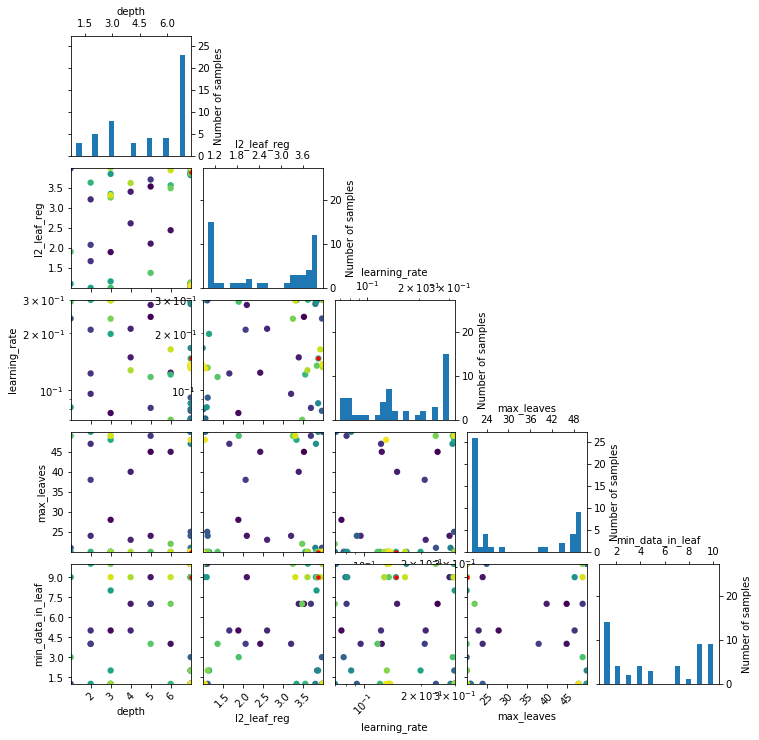

In [34]:
from skopt.plots import plot_evaluations

plot_evaluations(res_gp_hedge_auc, dimensions=['depth', 'l2_leaf_reg', 'learning_rate', 'max_leaves', 'min_data_in_leaf'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259F1507F60>,
      dtype=object)

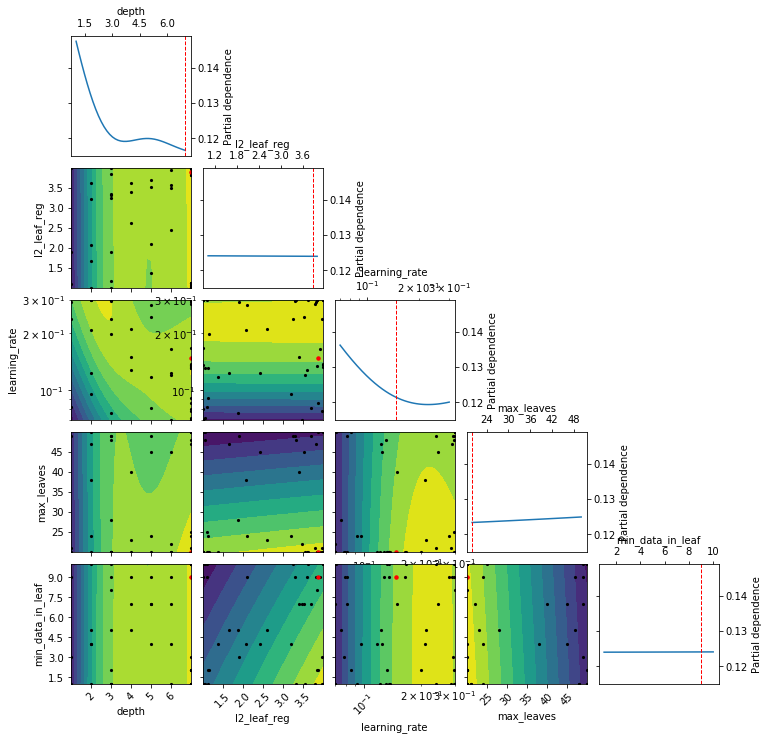

In [35]:
from skopt.plots import plot_objective 

plot_objective (res_gp_hedge_auc, dimensions=['depth', 'l2_leaf_reg', 'learning_rate', 'max_leaves', 'min_data_in_leaf'])

### Let's submit it!

In [65]:
y_final_pred = model.predict_proba(df_test_X)

prediction_CAT = [x[0] for x in y_final_pred[:, 1:]]
submission = pd.read_csv('./input/sample_submission.csv')
submission['target'] = prediction_CAT
submission.to_csv('CAT_scopt.csv', index=False)